<h3>Normal, Student's Distributions</h3>

In [1]:
from scipy.stats import norm, t
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# create frozen RVs for standard normal and Student's with 30, 100 degrees of freedom
rv_t30, rv_t100, rv_norm = t(30), t(100), norm()

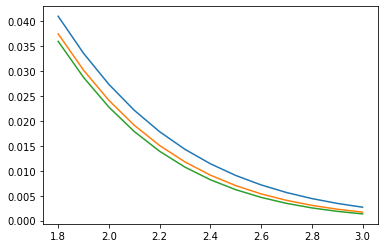

In [29]:
# calculate tail probabilities Pr(|Z|>z) at some points
Z = np.linspace(1.8, 3, 13)
tail_probs = {rv_t30: [], rv_t100: [], rv_norm: []}
for z in Z:
    for rv in tail_probs:
        tail_probs[rv].append(1 - rv.cdf(z))
# FIGURE 3.3. explains that normal distribution is good for testing significance
for rv in tail_probs:
    plt.plot(Z, tail_probs[rv])

In [32]:
for rv in tail_probs:
    print(rv)

<h3>F-distribution</h3>

In [33]:
from scipy.stats import f
rv_f4_58 = f(4, 58)
# 3.16 F statistics calculation
F = ((32.81-29.43)/(9-5)) / (29.43/(67-9))
# tail probability
1 - rv_f4_58.cdf(F)

0.1703876176583532

<h3>Mean, Variance, Standard Deviation</h3>

In [34]:
values = np.array([-14.82381293, -0.29423447, -13.56067979, -1.6288903, -0.31632439,
                   0.53459687, -1.34069996, -1.61042692, -4.03220519, -0.24332097])

In [35]:
print('mean:              ', np.mean(values))
print('variance:          ', np.var(values))
print('standard deviation:', np.std(values))
print('---- unbiased estimates ----')
# ddof means Delta Degrees of Freedom
print('variance:          ', np.var(values, ddof=1))
print('standard deviation:', np.std(values, ddof=1))

mean:               -3.7315998049999997
variance:           28.822364260579157
standard deviation: 5.36864640860051
---- unbiased estimates ----
variance:           32.024849178421285
standard deviation: 5.659050201086865


<h3>Variance-Covariance, Correlation Matrix</h3>

In [36]:
import pandas as pd

In [41]:
data = pd.read_csv("../../data/Prostate Cancer.txt") 
names = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
X = data[names].values
len(X)

97

In [42]:
# correlation matrix using pandas
data[names].corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


In [43]:
# correlation matrix using numpy
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(X, rowvar=False)

array([[ 1.  ,  0.28,  0.22,  0.03,  0.54,  0.68,  0.43,  0.43],
       [ 0.28,  1.  ,  0.35,  0.44,  0.16,  0.16,  0.06,  0.11],
       [ 0.22,  0.35,  1.  ,  0.35,  0.12,  0.13,  0.27,  0.28],
       [ 0.03,  0.44,  0.35,  1.  , -0.09, -0.01,  0.08,  0.08],
       [ 0.54,  0.16,  0.12, -0.09,  1.  ,  0.67,  0.32,  0.46],
       [ 0.68,  0.16,  0.13, -0.01,  0.67,  1.  ,  0.51,  0.63],
       [ 0.43,  0.06,  0.27,  0.08,  0.32,  0.51,  1.  ,  0.75],
       [ 0.43,  0.11,  0.28,  0.08,  0.46,  0.63,  0.75,  1.  ]])

In [44]:
# variance-covariance
np.cov(X, rowvar=False)

array([[  1.39,   0.14,   1.97,   0.05,   0.26,   1.11,   0.37,  14.42],
       [  0.14,   0.18,   1.11,   0.27,   0.03,   0.1 ,   0.02,   1.3 ],
       [  1.97,   1.11,  55.43,   3.78,   0.36,   1.33,   1.45,  57.98],
       [  0.05,   0.27,   3.78,   2.1 ,  -0.05,  -0.01,   0.08,   3.21],
       [  0.26,   0.03,   0.36,  -0.05,   0.17,   0.39,   0.1 ,   5.34],
       [  1.11,   0.1 ,   1.33,  -0.01,   0.39,   1.96,   0.52,  24.91],
       [  0.37,   0.02,   1.45,   0.08,   0.1 ,   0.52,   0.52,  15.31],
       [ 14.42,   1.3 ,  57.98,   3.21,   5.34,  24.91,  15.31, 795.47]])

In [50]:
# Use StandardScaler() function to standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples 
# or one if with_std=False.

# Use fit(X[, y, sample_weight]) to compute the mean and std to be used for later scaling.
# transform(X[, copy]) Perform standardization by centering and scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
# transformed variance-covariance matrix (nearly equals to correlation matrix)
np.cov(X_transformed, rowvar=False)

array([[ 1.01,  0.28,  0.23,  0.03,  0.54,  0.68,  0.44,  0.44],
       [ 0.28,  1.01,  0.35,  0.45,  0.16,  0.17,  0.06,  0.11],
       [ 0.23,  0.35,  1.01,  0.35,  0.12,  0.13,  0.27,  0.28],
       [ 0.03,  0.45,  0.35,  1.01, -0.09, -0.01,  0.08,  0.08],
       [ 0.54,  0.16,  0.12, -0.09,  1.01,  0.68,  0.32,  0.46],
       [ 0.68,  0.17,  0.13, -0.01,  0.68,  1.01,  0.52,  0.64],
       [ 0.44,  0.06,  0.27,  0.08,  0.32,  0.52,  1.01,  0.76],
       [ 0.44,  0.11,  0.28,  0.08,  0.46,  0.64,  0.76,  1.01]])

In [51]:
# We can also use StandardScaler().fit_transform()
X_transformed = StandardScaler().fit_transform(X)
# transformed variance-covariance matrix (nearly equals to correlation matrix)
np.cov(X_transformed, rowvar=False)

array([[ 1.01,  0.28,  0.23,  0.03,  0.54,  0.68,  0.44,  0.44],
       [ 0.28,  1.01,  0.35,  0.45,  0.16,  0.17,  0.06,  0.11],
       [ 0.23,  0.35,  1.01,  0.35,  0.12,  0.13,  0.27,  0.28],
       [ 0.03,  0.45,  0.35,  1.01, -0.09, -0.01,  0.08,  0.08],
       [ 0.54,  0.16,  0.12, -0.09,  1.01,  0.68,  0.32,  0.46],
       [ 0.68,  0.17,  0.13, -0.01,  0.68,  1.01,  0.52,  0.64],
       [ 0.44,  0.06,  0.27,  0.08,  0.32,  0.52,  1.01,  0.76],
       [ 0.44,  0.11,  0.28,  0.08,  0.46,  0.64,  0.76,  1.01]])

<h3>QR Factorization</h3>

In [52]:
# np.random.randn() Return a sample (or samples) from the “standard normal” distribution.
a = np.random.randn(9, 6)
# a = q@r; where q^T @ q == I, r is upper triangular
# np.linalg.qr() Compute the qr factorization of a matrix.
# Factor the matrix a as qr, where q is orthonormal and r is upper-triangular.
q, r = np.linalg.qr(a)
print(a, '\n\n', q, '\n\n', r)

[[ 0.58 -0.31  0.74  1.01  1.53 -0.71]
 [ 0.68  1.46  0.83 -0.44 -1.04 -0.46]
 [-0.87  0.15 -1.26 -0.36 -0.73 -0.18]
 [-0.12  0.67 -0.85 -0.95  0.42 -0.72]
 [-1.26  0.43 -0.29  0.47  0.33 -0.45]
 [ 0.84 -0.02 -0.17 -1.4   0.31  1.66]
 [-0.51 -0.09 -0.58 -0.97 -0.56  0.14]
 [-1.72  1.39  1.41  0.22 -0.33  0.38]
 [-0.65 -0.77  0.92  0.77  0.56 -0.35]] 

 [[-0.21  0.08  0.32  0.35 -0.55  0.12]
 [-0.25 -0.73  0.17  0.04  0.3   0.33]
 [ 0.32  0.03 -0.5   0.12  0.2  -0.06]
 [ 0.04 -0.29 -0.4  -0.07 -0.58  0.49]
 [ 0.46 -0.06 -0.15  0.3  -0.29 -0.15]
 [-0.31 -0.08 -0.07 -0.64 -0.36 -0.45]
 [ 0.19  0.1  -0.21 -0.5   0.11  0.4 ]
 [ 0.63 -0.44  0.42 -0.22 -0.11 -0.23]
 [ 0.24  0.42  0.45 -0.23 -0.03  0.45]] 

 [[-2.74  0.65  0.12  0.53 -0.4  -0.35]
 [ 0.   -2.23 -0.59  0.87  1.01  0.08]
 [ 0.    0.    2.55  1.49  0.67 -0.  ]
 [ 0.    0.    0.    1.66  0.5  -1.51]
 [ 0.    0.    0.    0.   -1.79  0.15]
 [ 0.    0.    0.    0.    0.   -1.44]]


# Chapter 3. Linear Methods for Regression
# $\S$ 3.1. Introduction

A linear regression model assumes that the regression function $\text{E}(Y|X)$ is linear in the inputs $X_1,\cdots,X_p$. Linear models were largely developed in the precomputer age of statistics, but even in today's computer era there are still good reasons to study and use them. They are simple and often provide an adequate and interpretable description of how the inputs affect the output.

For prediction purposes they can sometimes outperform fancier nonlinear models, especially in situations with small numbers of training cases, low signal-to-noise ratio or sparse data.

Finally, linear methods can be applied to transformations of the inputs and this considerably expands their scope. These generalization are sometimes called basis-function methods (Chapter 5).

In this chapter we describe linear methods for regression, while in the next chapter we discuss linear methods for classification.

> On some topics we go into considerable detail, as it is out firm belief that an understanding of linear methods is essential for understanding nonlinear ones.

In fact, many nonlinear techniques are direct generalizations of the linear methods discussed here.

# $\S$ 3.2. Linear Regression Models and Least Squares

### The linear model

We have

* an input vector $X^T = (X_1, X_2, \cdots, X_p)$ and
* a real-valued output $Y$ to predict.

The linear regression model has the form with unknown parameters $\beta_j$'s,

\begin{equation}
f(X) = \beta_0 + \sum_{j=1}^p X_j\beta_j.
\end{equation}

The linear model either assumes that the regression function $\text{E}(Y|X)$ is linear, or that the linear model is a reasonable approximation.

The variable $X_j$ can come from different sources:

* Quantitative inputs, and its transformations, e.g., log, squared-root, square,
* basis expansions, e.g., $X_2=X_1^2, X_3=X_1^3$, leading to a polynomial representation,
* numeric or "dummy" coding of the levels of qualitative inputs.  
  For example, if $G$ is a five-level factor input, we might create $X_j=I(G=j),$ for $j = 1,\cdots,5$.
* Interactions between variables, e.g., $X_3=X_1\cdot X_2$.

No matter the source of the $X_j$, the model is linear in the parameters.

### Least squares fit

Typically we have a set of training data

* $(x_1, y_1), \cdots, (x_N, y_N)$ from which to estimate the parameters $\beta$.
* Each $x_i = (x_{i1}, x_{i2}, \cdots, x_{ip})^T$ is a vector of feature measurements for the $i$th case.

The most popular estimation method is _least squares_, in which we pick coefficients $\beta=(\beta_0,\beta_1,\cdots,\beta_p)^T$ to minimize the residual sum of squares

\begin{align}
\text{RSS}(\beta) &= \sum_{i=1}^N\left(y_i - f(x_i)\right)^2 \\
&= \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_j\right)^2.
\end{align}

From a statistical point of view, this criterion is reasonable if the training observations $(x_i,y_i)$ represent independent random draws from their population. Even if the $x_i$’s were not drawn randomly, the criterion is still valid if the $y_i$’s are conditionally independent given the inputs $x_i$.

See FIGURE 3.1 in the textbook for illustration of the geometry of least-squares fitting in $\mathbb{R}^{p+1}$ space occupied by the pairs $(X,Y)$.

> Note that RSS makes no assumptions about the validity of the linear model; it simply finds the best linear fit to the data. Least squares fitting is intuitively satisfying no matter how the data arise; the criterion measures the average lack of fit.

### Solution of least squares

How do we minimize RSS?

Denote

* $\mathbf{X}$ the $N\times(p+1)$ matrix with each row an input vector (with a 1 in the first position),
* $\mathbf{y}$ the $N$-vector of outputs in the training set.

Then we can write RSS as

\begin{equation}
\text{RSS}(\beta) = \left(\mathbf{y}-\mathbf{X}\beta\right)^T\left(\mathbf{y}-\mathbf{X}\beta\right) = \|\mathbf{y}-\mathbf{X}\beta\|^2.
\end{equation}

This is a quadratic function in the $p+1$ parameters. Differentiating w.r.t. $\beta$ we obtain

\begin{align}
\frac{\partial\text{RSS}}{\partial\beta} &= -2\mathbf{X}^T\left(\mathbf{y}-\mathbf{X}\beta\right) \\
\frac{\partial^2\text{RSS}}{\partial\beta\partial\beta^T} &= 2\mathbf{X}^T\mathbf{X}
\end{align}

Assuming (for the moment) that $\mathbf{X}$ has full column rank, and hence $\mathbf{X}^T\mathbf{X}$ is positive definite (therefore it is guaranteed to the unique minimum exists), we set the first derivative to zero

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0
\end{equation}

to obtain the unique solution

\begin{equation}
\hat\beta = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.
\end{equation}

The predicted values at an input vector $x_0$ are given by

\begin{equation}
\hat{f}(x_0) = (1:x_0)^T\hat\beta,
\end{equation}

and fitted values at the training samples are

\begin{equation}
\hat{y} = \mathbf{X}\hat\beta = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y} = \mathbf{H}\mathbf{y},
\end{equation}

where $\hat{y_i}=\hat{f}(x_i)$. The matrix

\begin{equation}
\mathbf{H} = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T
\end{equation}

is sometimes called the "hat" matrix or projection metrix because it puts the hat on $\mathbf{y}$ and project $\mathbf{y}$ to $\hat{\mathbf{y}}$ in $col(\mathbf{X})$.

### Geometrical representation of the least squares estimate

FIGURE 3.2 shows a different geometrical representation of the least squares estimate, this time in $\mathbb{R}^N$.

We denote the column vector of $\mathbf{X}$ by $\mathbf{x}_0$, $\mathbf{x}_1$, $\cdots$, $\mathbf{x}_p$, with $\mathbf{x}_0 \equiv 1$. For much of what follows, this first column is treated like any other.

These vectors span a subspace of $\mathbb{R}^N$, also referred to as the column space of $\mathbf{X}$ denoted by $\text{col}(\mathbf{X})$. We minimize RSS by choosing $\hat\beta$ so that the residual vector $\mathbf{y}-\hat{\mathbf{y}}$ is orthogonal to this subspace. This orthogonality is expressed in

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0,
\end{equation}

and the resulting estimate $\hat{\mathbf{y}}$ is hence the _orthogonal projection_ of $\mathbf{y}$ onto this subspace. The hat matrix $\mathbf{H}$ computes the orthogonal projection, and hence it is also known as a projection matrix.

#### Rank deficiency
It might happen that the columns of $\mathbf{X}$ are not linearly independent, so that $\mathbf{X}$ is not of full rank. This would occur, for example, if two of the inputs were perfectly correlated, e.g., $\mathbf{x}_2=3\mathbf{x}_1$.

Then $\mathbf{X}^T\mathbf{X}$ is singular and the least squares coefficients $\hat\beta$ are not uniquely defined. However, the fitted values $\hat{\mathbf{y}}=\mathbf{X}\hat\beta$ are still the projection of $\mathbf{y}$ onto the $\text{col}(\mathbf{X})$; there are just more than one way to express that projection in terms of the column vectors of $\mathbf{X}$.

The non-full-rank case occurs most often when one or more qualitative inputs are coded in a redundant fashion.

There is usually a natural way to resolve the non-unique representation, by recording and/or dropping redundant columns in $\mathbf{X}$. Most regression software packages detect these redundancies and automatically implement some strategy for removing them.

Rank deficientcies can also occur in signal and image analysis, where the number of inputs $p$ can exceed the number of training cases $N$. In this case, the features are typically reduced by filtering or else the fitting is controlled by regularization ($\S$ 5.2.3 and Chapter 18).

### Sampling properties of $\hat{\beta}$

Up to now we have made minimal assumptions about the true distribution of the data. In order to pin down the sampling properties of $\hat\beta$, we now assume that

* the observations $y_i$ are uncorrelated and
* $y_i$ have constant variance $\sigma^2$,
* the $x_i$ are fixed (nonrandom).


\begin{align}
\text{E}(\hat{\beta})&=\text{E}\Bigl(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\Bigr)\\
&=\Bigl(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\Bigr)\text{E}(\mathbf{y})\\
&=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\beta=\beta
\end{align}

\begin{align}
\hat{\beta}-\text{E}(\hat{\beta})&=\Bigl(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\Bigr)-\Bigl(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{X}\beta\Bigr)\\
&=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)\\
&=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\epsilon
\end{align}
where $\epsilon$ is a random column vector of dimension $N$.

The variance-covariance matrix of the least squares estmiates is

\begin{align}
\text{Var}(\hat{\beta}) &= \text{Var}\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\right) \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\text{Var}\left(\mathbf{y}\right)\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2.
\end{align}

Typically one estimates the variance $\sigma^2$ by

\begin{equation}
\hat\sigma^2 = \frac{1}{N-p-1}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2\\
=\frac{1}{N-p-1}\sum_{i=1}^N\left(y_i-x_i^T\hat{\beta}\right)^2,
\end{equation}

where the denominator $N-p-1$ rather than $N$ makes $\hat\sigma^2$ an unbiased estimate of $\sigma^2$:

\begin{equation}
\text{E}(\hat\sigma^2) = \sigma^2.
\end{equation}

If $x$ is the standard variable in $N(0, \sigma^2)$, then $E(x^2) = \sigma^2$. It follows that the distance squared from origin in $V$, $\sum_{i=1}^k v_i^2$, has expectation $k\sigma^2$. We now use the fact that in ordinary least squares $\mathbf{\hat{y}}$ is the orthogonal projection of $\mathbf{y}$ onto the column space of $\mathbf{X}$ as a subspace of $\mathbb R^N$. Under our assumption of the independence of the columns of $\mathbf{X}$ this space has dimension $p+1$. In the notation above $\hat{\mathbf{y}}\in V$ with $V$ the column space of $\mathbf{X}$ and $\mathbf{y}−\hat{\mathbf{y}} \in W$, where $W$ is the orthogonal complement of the column space of $\mathbf{X}$. Because $\mathbf{y} \in \mathbb R^N$ and $V$ is of dimension $p + 1$, we know that $W$ has dimension $N − p − 1$ and  $\mathbf{y}−\hat{\mathbf{y}}$ is a random vector in $W$ with distribution $N(0, \sigma^2\mathbf{I}_{N−p−1})$. The sum of squares of the $N$ components of $\mathbf{y}−\hat{\mathbf{y}}$ is the square of the distance in $W$ to the origin. Therefore $\sum_{i=1}^{N}(\mathbf{y}_i−\hat{\mathbf{y}}_i)^2$ has expectation $(N − p − 1)\sigma^2$.

### Inference and hypothesis testing
To draw inferences about the parameters and the model, additional assumptions are needed. We now assume that

* the linear model $f(X) = \beta_0 + \sum_{j=1}^p X_j\beta_j $ is the correct model for the mean.
  i.e., the conditional expectation of $Y$ is linear in $X$;
* the deviations of $Y$ around its expectation are additive and Gaussian.

Hence

\begin{align}
Y &= \text{E}\left(Y|X_1,\cdots,X_p\right)+\epsilon \\
&= \beta_0 + \sum_{j=1}^p X_j\beta_j + \epsilon,
\end{align}

where $\epsilon\sim N(0,\sigma^2)$. Then it is easy to show that

\begin{align}
\hat\beta\sim N\left(\beta, \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2\right), \\
(N-p-1)\hat\sigma^2\sim\sigma^2\chi^2_{N-p-1}.
\end{align}

In addition $\hat\beta$ and $\hat\sigma^2$ are statistically independent.

We use these distributional properties to form tests of hypothesis and confidence intervals for the parameters $\beta_j$. To test the null hypothesis $\mu_0: \beta_j=0$, we form the standardized coefficient or _Z-score_

\begin{equation}
z_j = \frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}},
\end{equation}

where $v_j = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}_{jj}$.

Under the null hypothesis, $z_j\sim t_{N-p-1}$, and hence a large (absolute) value of $z_j$ will lead to rejection of this null hypothesis.

If $\hat\sigma$ is replaced by a known value $\sigma$, then $z_j$ would have a standard normal distribution. The difference between the tail quatiles of $t$-distribution and a standard normal distribution become negligible as the sample size increases, so we typically use the normal quantiles (see FIGURE 3.3).

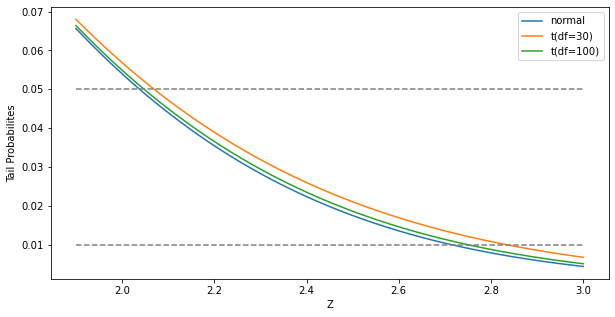

In [82]:
"""FIGURE 3.3. The tail probabilities for three distributions, t30, t100, N(0,1).

Pr(|Z| > z) for three distributions, t(df=30), t(df=100), and standard normal.
The difference between t and the standard normal becomes negligible for N > 100.
"""
import matplotlib.pyplot as plt
import scipy
import scipy.stats

x = np.linspace(1.9, 3, 1000)
pdf_gaussian = scipy.stats.norm.pdf(x)
pdf_t30 = scipy.stats.t.pdf(x, df=30)
pdf_t100 = scipy.stats.t.pdf(x, df=100)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, pdf_gaussian, label='normal')
ax.plot(x, pdf_t30, label='t(df=30)')
ax.plot(x, pdf_t100, label='t(df=100)')
ax.legend()
ax.plot([1.9, 3], [.01, .01], '--', color='gray')
ax.plot([1.9, 3], [.05, .05], '--', color='gray')
ax.set_xlabel('Z')
ax.set_ylabel('Tail Probabilites')
plt.show()

Often we need to test for the significance of groups of coefficients simultaneously. For example, to test if a categorical variable with $k$ levels can be excluded from a model, we need to test whether the coefficients of the dummy variables used to represent the levels can all be set to zero.

Here we use the $F$ statistics,

\begin{equation}
F = \frac{(\text{RSS}_0-\text{RSS}_1)/(p_1-p_0)}{\text{RSS}_1/(N-p_1-1)},
\end{equation}

where

* $\text{RSS}_1$ is for the bigger model with $p_1+1$ parameters and
* $\text{RSS}_0$ for the nested smaller model with $p_0+1$ parameters,
* having $p_1-p_0$ parameters constrained to be zero.

The $F$ statistic measures the change in residual sum-of-squares per additional parameter in the bigger model, and it is normalized by an estimate of $\sigma^2$.

Under the Gaussian assumption, and the null hypothesis that the smaller models is correct, the $F$ statistics will have a $F_{p_1-p_0,N-p_1-1}$ distribution. It can be shown (Exercise 3.1) that the $t$-statistic $z_j = \hat\beta_j \big/ (\hat\sigma \sqrt{v_j})$ are equivalent to the $F$ statistic for dropping the single coefficient $\beta_j$ from the model.

For large $N$, the quantiles of $F_{p_1-p_0,N-p_1-1}$ approaches those of $\chi^2_{p_1-p_0}/(p_1-p_0)$.

### Confidence intervals

Similarly, we can isolate $\beta_j$ in $\hat\beta \sim N(\beta, \left(\mathbf{X}^T \mathbf{X}\right)^{-1}\sigma^2)$ to obtain a $1-2\alpha$ confidence interval for $\beta_j$:

\begin{equation}
\left(\hat\beta_j-z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma, \hat\beta_j+z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma\right),
\end{equation}

where $z^{(1-\alpha)}$ is the $1-\alpha$ percentile of the normal distribution:

\begin{align}
z^{(1-0.025)} &= 1.96, \\
z^{(1-0.05)} &= 1.645, \text{etc}.
\end{align}

Hence the standard practice of reporting $\hat\beta \pm 2\cdot \text{se}(\hat\beta)$ amounts to an approximate 95% confidence interval.

Even if the Gaussian error assumption does not hold, this interval will be approximately corrent, with its coverage approaching $1-2\alpha$ as the sample size $N \rightarrow \infty$.

In a similar fashion we can obtain an approximate confidence set for the entire parameter vector $\beta$, namely

\begin{equation}
C_\beta = \left\{ \beta \big| (\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta) \le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}\right\},
\end{equation}

where ${\chi_l^2}^{(1-\alpha)}$ is the $1-\alpha$ percentile of the chi-squared distribution on $l$ degrees of freedom;

\begin{align}
{\chi_5^2}^{(1-0.05)} &= 11.1, \\
{\chi_5^2}^{(1-0.1)} &= 9.2.
\end{align}

This condifence set for $\beta$ generates a corresponding confidence set for the true function $f(x) = x^T\beta$, namely

\begin{equation}
\left\{ x^T\beta \big| \beta \in C_\beta \right\}
\end{equation}

(Exercise 3.2; FIGURE 5.4).

In [1]:
import scipy.stats
scipy.stats.norm(0, 1).pdf(0)

0.3989422804014327

In [2]:
scipy.stats.norm(0, 1).cdf(0)

0.5

In [5]:
#To find the probability that the variable has a value LESS than or equal
#let's say 1.64, you'd use CDF cumulative Density Function
scipy.stats.norm.cdf(1.64,0,1)

0.9494974165258963

In [7]:
scipy.stats.norm.cdf(2,0,1)

0.9772498680518208

In [6]:
#To find the probability that the variable has a value GREATER than or
#equal to let's say 1.64, you'd use SF Survival Function 
scipy.stats.norm.sf(1.64,0,1)

0.05050258347410371

In [3]:
#To find the variate for which the probability is given, let's say the 
#value which needed to provide a (1-0.05)% probability, you'd use the 
#PPF Percent Point Function
scipy.stats.norm.ppf(.95,0,1)

1.6448536269514722

In [4]:
scipy.stats.norm.ppf(.975,0,1)

1.959963984540054

In [9]:
from scipy.stats import chi2
chi2.ppf(0.95, 5)

11.070497693516351

## $\S$ 3.2.1. Example: Prostate Cancer

The data for this example come from a study by Stamey et al. (1989). They examined the correlation between the level of prostate-specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy.

The variables are

* log cancer volumn ($\textsf{lcavol}$),
* log prostate weight ($\textsf{lweight}$),
* $\textsf{age}$,
* log of the amount of benign prostatic prostatic hyperplasia ($\textsf{lbph}$),
* seminal vesicle invasion ($\textsf{svi}$),
* log of capsular penetration ($\textsf{lcp}$),
* Gleason score ($\textsf{gleason}$), and
* percent of Gleason score 4 or 5 ($\textsf{pgg45}$).

In [25]:
%matplotlib inline
import math

import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data.head(7)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F


In [14]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


The correlation matrix of the predictors given in TABLE 3.1 shows many strong correlations.

In [13]:
"""TABLE 3.1. Correlations of predictors in the prostate cancer data

It shows many string correlations. For example, that both `lcavol` and
`lcp` show a strong relationship with the response `lpsa`, and with each
other. We need to fit the effects jointly to untangle the relationships
between the predictors and the response."""
data.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


FIGURE 1.1 of Chapter 1 is a scatterplot matrix showing every pairwise plot between the variables.

We see that $\textsf{svi}$ is a binary variable, and $\textsf{gleason}$ is an ordered categorical variable.

We see, for example, that both $\textsf{lcavol}$ and $\textsf{lcp}$ show a strong relationship with the response $\textsf{lpsa}$, and with each other. We need to fit the effects jointly to untangle the relationships between the predictors and the response.

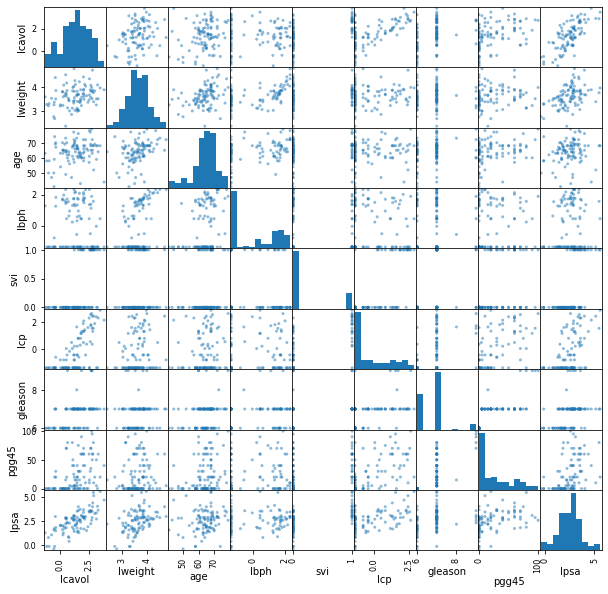

In [87]:
"""FIGURE 1.1. Scatterplot matrix of the prostate cancer data"""
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

We fit a linear model to $\textsf{lpsa}$, after first standardizing the predictors to have unit variance. We randomly split the dataset into a training set of size 67 and a test set of size 30. We applied least squares estimation to the training set, producing the estimates, standard errors and $Z$-scores shown in TABLE 3.2.

The $Z$-scores measure the effect of dropping that variable from the model. A $Z$-score greater than 2 in absolute value is approximately significant at the 5% level. For our example, we have 9 parameters, and the 0.025 tail quatiles of the $t_{67-9}$ distributions are $\pm 2.002$!

In [18]:
from scipy.stats import t
t.ppf(0.975, 67-9)

2.0017174830120923

In [27]:
"""Table 3.2. Linear model fit to the prostate cancer data.

Roughly a Z score larger than two in absolute value is significant nonzero
at the p = 0.05 level.

We fit a linear model to the log of prostate-specific antigen, `lpsa`,
after first standardizing the predictors to have unit variance. We randomly
split the dataset into a training set of size 67 and a test set of size 30.
"""
data = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data.pop('lpsa')
mask_train = data.pop('train')
data_x_normalized = data.apply(scipy.stats.zscore)

# data_normalized.describe()  # check it normalized!
data_x_normalized.describe()

data_x_train = data_x_normalized[mask_train == 'T']
data_y_train = data_y[mask_train == 'T']
data_x_test = data_x_normalized[mask_train == 'F']
data_y_test = data_y[mask_train == 'F']

size_train = sum(mask_train == 'T')
size_test = sum(mask_train == 'F')
size_predictor = len(data_x_train.columns)

mat_x = np.hstack((np.ones((size_train, 1)), data_x_train.values))
vec_y = data_y_train.values
mat_xt = np.transpose(mat_x)
mat_xx_inv = scipy.linalg.inv(mat_x.T @ mat_x)

ols_beta = mat_xx_inv @ mat_x.T @ vec_y
vec_y_fitted = mat_x @ ols_beta
est_sigma2 = sum((vec_y-vec_y_fitted)**2)/(size_train-size_predictor-1)

table_term = ['Intercept'] + list(data_x_train.columns)
table_coeff = ols_beta
table_stderr = [math.sqrt(mat_xx_inv[j, j]*est_sigma2)
                for j in range(size_predictor+1)]

print('{0:>15} {1:>15} {2:>15} {3:>15}'.format('Term', 'Coefficient',
                                               'Std. Error', 'Z Score'))
print('-'*64)
for term, coeff, stderr in zip(table_term, table_coeff, table_stderr):
    print('{0:>15} {1:>15f} {2:>15f} {3:>15f}'.format(term, coeff,
                                                      stderr, coeff/stderr))

           Term     Coefficient      Std. Error         Z Score
----------------------------------------------------------------
      Intercept        2.464933        0.089315       27.598203
         lcavol        0.676016        0.125975        5.366290
        lweight        0.261694        0.095134        2.750789
            age       -0.140734        0.100819       -1.395909
           lbph        0.209061        0.101691        2.055846
            svi        0.303623        0.122962        2.469255
            lcp       -0.287002        0.153731       -1.866913
        gleason       -0.021195        0.144497       -0.146681
          pgg45        0.265576        0.152820        1.737840


In [30]:
# RSS_1:
sum((vec_y-vec_y_fitted)**2)

29.42638445990841

The predictor $\textsf{lcavol}$ shows the strongest effect, with $\textsf{lweight}$ and $\textsf{svi}$ also strong.

Notice that $\textsf{lcp}$ is not significant, once $\textsf{lcavol}$ is in the model (when used in a model without $\textsf{lcavol}$, $\textsf{lcp}$ is strongly significant).

We can also test for the exclusion of a number of terms at once, using the $F$-statistic. For example, we consider dropping all the non-significant terms in TABLE 3.2, namely $\textsf{age}$, $\textsf{gleason}$, and $\textsf{pgg45}$. We get

\begin{equation}
F = \frac{(\text{RSS}_0-\text{RSS}_1)/(p_1-p_0)}{\text{RSS}_1/(N-p_1-1)}\\
=\frac{(32.81 - 29.43)/(9-5)}{29.43/(67-9)} = 1.67,
\end{equation}

which has a $p$-value of

\begin{equation}
\text{Pr}(F_{4,58} \gt 1.67) = 0.17,
\end{equation}

and hence is not significant.

In [33]:
"""F test for the exclusion of a number of terms at once

For example, we cansider dropping all the non-significant terms, namely
age, lcp, gleason, and pgg45."""
print("Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0")
data_x_train_alt = data_x_train.drop(['age', 'lcp', 'gleason', 'pgg45'],
                                     axis=1)

size_predictor_alt = len(data_x_train_alt.columns)

mat_x_alt = np.hstack((np.ones((size_train, 1)),
                          data_x_train_alt.values))
ols_beta_alt = scipy.linalg.solve(mat_x_alt.T @ mat_x_alt,
                                  mat_x_alt.T @ vec_y)

vec_y_fitted_alt = mat_x_alt @ ols_beta_alt

rss0 = sum((vec_y-vec_y_fitted_alt)**2)
rss1 = sum((vec_y-vec_y_fitted)**2)
F_stat = (rss0-rss1)/(size_predictor-size_predictor_alt)*(size_train-size_predictor-1)/rss1
print('F = {}'.format(F_stat))
print('Pr(F({dfn},{dfd}) > {fstat:>.2f}) = {prob:.2f}'.format(
    dfn=size_predictor-size_predictor_alt,
    dfd=size_train-size_predictor-1,
    fstat=F_stat,
    prob=1-scipy.stats.f.cdf(F_stat,
                             dfn=size_predictor-size_predictor_alt,
                             dfd=size_train-size_predictor-1),
))

Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0
F = 1.6697548846375123
Pr(F(4,58) > 1.67) = 0.17


The mean prediction error on the test data is 0.521. In contrast, prediction using the mean training value of $\textsf{lpsa}$ has a test error of 1.057, which is called the "base error rate".

In [36]:
"""Prediction error on the test data

We can see that the linear model reduces the base error rate by about 50%
"""

mean_y_train = sum(vec_y)/size_train

mat_x_test = np.hstack((np.ones((size_test, 1)),
                           data_x_test.values))
vec_y_test = data_y_test.values
vec_y_test_fitted = mat_x_test @ ols_beta

err_base = sum((vec_y_test-mean_y_train)**2)/size_test
err_ols = sum((vec_y_test-vec_y_test_fitted)**2)/size_test

print('Base error rate = {}'.format(err_base))
print('OLS error rate = {}'.format(err_ols))

Base error rate = 1.0567332280603818
OLS error rate = 0.5212740055076004


Hence the linear model reduces the base error rate by about 50%.

We will return to this example later to compare various selection and shrinkage methods.

## $\S$ 3.2.2. The Gauss-Markov Theorem

One of the most famous results in statistics asserts that

> the least squares estimates of the parameter $\beta$ have the smallest variance among all linear unbiased estimates.

We will make this precise here, and also make clear that

> the restriction to unbiased estimates is not necessarily a wise one.

This observation will lead us to consider biased estimates such as ridge regression later in the chapter.

### The statement of the theorem

We focus on estimation of any linear combination of the parameters $\theta=a^T\beta$. The least squares estimate of $a^T\beta$ is

\begin{equation}
\hat\theta = a^T\hat\beta = a^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.
\end{equation}

Considering $\mathbf{X}$ to be fixed and the linear model is correct, $a^T\beta$ is unbiased since

\begin{align}
\text{E}(a^T\hat\beta) &= \text{E}\left(a^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\right) \\
&= a^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\beta \\
&= a^T\beta
\end{align}

The Gauss-Markov Theorem states that if we have any other linear estimator $\tilde\theta = \mathbf{c}^T\mathbf{y}$ that is unbiased for $a^T\beta$, that is, $\text{E}(\mathbf{c}^T\mathbf{y})=a^T\beta$, then

\begin{equation}
\text{Var}(a^T\hat\beta) \le \text{Var}(\mathbf{c}^T\mathbf{y}).
\end{equation}

The proof (Exercise 3.3) uses the triangle inequality.

For simplicity we have stated the result in terms of estimation of a single parameter $a^T \beta$, but with a few more definitions one can state it in terms of the entire parameter vector $\beta$ (Exercise 3.3).

### Implications of the Gauss-Markov theorem

Consider the mean squared error of an estimator $\tilde\theta$ of $\theta$:

\begin{align}
\text{MSE}(\tilde\theta) &= \text{E}\left(\tilde\theta-\theta\right)^2 \\
&= \text{E}\left(\tilde\theta-\text{E}(\tilde\theta)+\text{E}(\tilde\theta)-\theta\right)^2\\
&= \text{E}(\tilde\theta-\text{E}(\tilde\theta))^2+\text{E}(\text{E}(\tilde\theta)-\theta)^2+2\text{E}(\tilde\theta-\text{E}(\tilde\theta))(\text{E}(\tilde\theta)-\theta)\\
&= \text{Var}\left(\tilde\theta\right) + \left[\text{E}\left(\tilde\theta\right)-\theta\right]^2 \\
&= \text{Var} + \text{Bias}^2
\end{align}

The Gauss-Markov theorem implies that the least squares estimator has the smallest MSE of all linear estimators with no bias. However there may well exist a biased estimator with smaller MSE. Such an estimator would trade a little bias for a larger reduction in variance.

Biased estimates are commonly used. Any method that shrinks or sets to zero some of the least squares coefficients may result in a biased estimate. We discuss many examples, including variable subset selection and ridge regression, later in this chapter.

From a more pragmatic point of view, most models are distortions of the truth, and hence are biased; picking the right model amounts to creating the right balance between bias and variance. We go into these issues in more detail in Chapter 7.

### Relation between prediction accuracy and MSE

MSE is intimately related to prediction accuracy, as discussed in Chapter 2.

Consider the prediction of the new response at input $x_0$,

\begin{equation}
Y_0 = f(x_0) + \epsilon.
\end{equation}

Then the expected prediction error of an estimate $\tilde{f}(x_0)=x_0^T\tilde\beta$ is

\begin{align}
\text{E}(Y_0 - \tilde{f}(x_0))^2 &= \text{E}\left(Y_0 -f(x_0)+f(x_0) - \tilde{f}(x_0)\right)^2\\
&= \sigma^2 + \text{E}\left(x_o^T\tilde\beta - f(x_0)\right)^2 \\
&= \sigma^2 + \text{MSE}\left(\tilde{f}(x_0)\right).
\end{align}

Therefore, expected prediction error and MSE differ only by the constant $\sigma^2$, representing the variance of the new observation $y_0$.

The first error component $\sigma^2$ is unrelated to what model is used to describe our data. It cannot be reduced for it exists in the true data generation process. The second source of error corresponding to the term $\text{MSE}(\tilde{f}(x_0))$ represents the error in the model and is under
control of the statistician. Thus, based on the above expression, if we minimize the $\text{MSE}$ of our estimator $\tilde{f}(x_0)$ we are effectively minimizing the expected (quadratic) prediction error which is our ultimate goal anyway. 

We will explore methods that minimize the mean square error. The mean square error can be broken down into two terms: a model variance term and a model bias
squared term. We will explore methods that seek to keep the total contribution of these two terms as small as possible by explicitly considering the trade-offs that come from methods that might increase one of the terms while decreasing the other.

## $\S$ 3.2.3. Multiple Regression from Simple Univariate Regression

If there are $n$ points $(x_1,y_1),(x_2,y_3),...,(x_n,y_n)$, the straight line $y=a+bx$ minimizing the sum of the squares of the <span style="color: red;">**vertical distances**</span> from the data points to the line $L=\sum_{i=1}^{n}(y_i-a-bx_i)^2$, then we take partial derivatives of L with respect to $a$ and $b$ and let them equal to $0$ to get least squares coefficients $a$ and $b$:
$$\frac{\partial L}{\partial b}=-2\sum_{i=1}^{n}(y_i-a-bx_i)x_i=0$$, then $$\sum_{i=1}^{n}x_iy_i=a\sum_{i=1}^{n}x_i+b\sum_{i=1}^{n}x_i^2$$  
And, $$\frac{\partial L}{\partial a}=-2\sum_{i=1}^{n}(y_i-a-bx_i)=0$$, then
$$\sum_{i=1}^{n}y_i=na+b\sum_{i=1}^{n}x_i$$
these 2 equations are:
$$
\begin{bmatrix}
\displaystyle\sum_{i=1}^{n}x_i & \displaystyle\sum_{i=1}^{n}x_i^2\\
n & \displaystyle\sum_{i=1}^{n}x_i\\
\end{bmatrix}
\begin{bmatrix}
a\\
b
\end{bmatrix}
=
\begin{bmatrix}
\displaystyle\sum_{i=1}^{n}x_iy_i\\
\displaystyle\sum_{i=1}^{n}y_i
\end{bmatrix}
$$
then, using <span style="color: red;">**Cramer’s rule**</span>
$$\begin{align}
b&=\frac{\begin{bmatrix}
\displaystyle\sum_{i=1}^{n}x_i & \displaystyle\sum_{i=1}^{n}x_iy_i\\
n & \displaystyle\sum_{i=1}^{n}y_i\\
\end{bmatrix}}{\begin{bmatrix}
\displaystyle\sum_{i=1}^{n}x_i & \displaystyle\sum_{i=1}^{n}x_i^2\\
n & \displaystyle\sum_{i=1}^{n}x_i\\
\end{bmatrix}}\\
&=\frac{(\displaystyle\sum_{i=1}^{n}x_i)(\displaystyle\sum_{i=1}^{n}y_i)-n(\displaystyle\sum_{i=1}^{n}x_iy_i)}{(\displaystyle\sum_{i=1}^{n}x_i)^2-n\displaystyle\sum_{i=1}^{n}x_i^2}\\
&=\frac{n(\displaystyle\sum_{i=1}^{n}x_iy_i)-(\displaystyle\sum_{i=1}^{n}x_i)(\displaystyle\sum_{i=1}^{n}y_i)}{n\displaystyle\sum_{i=1}^{n}x_i^2-(\displaystyle\sum_{i=1}^{n}x_i)^2}\\
&=\frac{(\displaystyle\sum_{i=1}^{n}x_iy_i)-\frac{1}{n}(\displaystyle\sum_{i=1}^{n}x_i)(\displaystyle\sum_{i=1}^{n}y_i)}{\displaystyle\sum_{i=1}^{n}x_i^2-\frac{1}{n}(\displaystyle\sum_{i=1}^{n}x_i)^2}\\
&=\frac{\langle\mathbf x, \mathbf y\rangle-\frac{1}{n}\langle\mathbf x, \mathbf 1\rangle\langle\mathbf y, \mathbf 1\rangle}{\langle\mathbf x, \mathbf x\rangle-\frac{1}{n}\langle\mathbf x, \mathbf 1\rangle\langle\mathbf x, \mathbf 1\rangle}\\
&=\frac{\langle\mathbf x, \mathbf y\rangle-\bar{x}\langle\mathbf y, \mathbf 1\rangle}{\langle\mathbf x, \mathbf x\rangle-\bar{x}\langle\mathbf x, \mathbf 1\rangle}\\
&=\frac{\langle\mathbf x-\bar{x}\mathbf 1, \mathbf y\rangle}{\langle\mathbf x-\bar{x}\mathbf 1, \mathbf x\rangle}\\
&=\frac{\langle\mathbf x-\bar{x}\mathbf 1, \mathbf y\rangle}{\langle\mathbf x-\bar{x}\mathbf 1, \mathbf x-\bar{x}\mathbf 1\rangle}
\end{align}$$ 

and $a=\frac{\displaystyle\sum_{i=1}^{n}y_i-b\sum_{i=1}^{n}x_i}{n}=\bar y-b\bar x$, which shows point $(\bar x, \bar y)$ is in the line.

>Thus we see that obtaining an estimate of the second coefficient $b$ is really two one-dimensional regressions followed in succession. We first regress $\mathbf x$ onto
$\mathbf 1$ and obtain the residual $\mathbf z = \mathbf x − \bar{x}\mathbf 1$. We next regress $\mathbf y$ onto this residual $\mathbf z$. The direct extension of these ideas results in Algorithm 3.1: **Regression by Successive Orthogonalization** or **Gram-Schmidt** for multiple regression.


We call $\hat y_i=a+bx_i$ the **predicted value** of $y_i$, and $y_i-\hat y_i$ the $i^{th}$ **residual**.



The linear model with $p \gt 1$ inputs is called _multiple linear regression model_.

The least squares estimates

\begin{equation}
\hat\beta = \left(\mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y}
\end{equation}

for this model are best understood in terms of the estimates for the *univariate* ($p=1$) linear model, as we indicate in this section.

Suppose a univariate model with no intercept, i.e.,

\begin{equation}
Y=X\beta+\epsilon.
\end{equation}

The least squares estimate and residuals are

\begin{align}
\hat\beta &= \frac{\sum_1^N x_i y_i}{\sum_1^N x_i^2} = \frac{\langle\mathbf{x},\mathbf{y}\rangle}{\langle\mathbf{x},\mathbf{x}\rangle}, \\
r_i &= y_i - x_i\hat\beta, \\
\mathbf{r} &= \mathbf{y} - \mathbf{x}\hat\beta,
\end{align}

where
* $\mathbf{y}=(y_1,\cdots,y_N)^T$,
* $\mathbf{x}=(x_1,\cdots,x_N)^T$ and
* $\langle\cdot,\cdot\rangle$ denotes the dot product notation.

As we will see,

> this simple univariate regression provides the building block for multiple linear regression.

### Building blocks for multiple linear regression

Suppose next that the columns of the data matrix $\mathbf{X} = \left[\mathbf{x}_1,\cdots,\mathbf{x}_p\right]$ are orthogonal, i.e., 

\begin{equation}
\langle \mathbf{x}_j,\mathbf{x}_k\rangle = 0\text{ for all }j\neq k.
\end{equation}

Then it is easy to check that the multiple least squares estimates are equal to the univariate estimates:

\begin{equation}
\hat\beta_j = \frac{\langle\mathbf{x}_j,\mathbf{y}\rangle}{\langle\mathbf{x}_j,\mathbf{x}_j\rangle}, \forall j
\end{equation}

> In other words, when the inputs are orthogonal, they have no effect on each other's parameter estimates in the model.

Orthogonal inputs occur most often with balanced, designed experiments (where orthogonality is enforced), but almost never with observational data. Hence we will have to orthogonalize them in order to carry this idea further.

#### Orthogonalization
Suppose next that we have an intercept and a single input $\mathbf{x}$. Then the least squares coefficient of $\mathbf{x}$ has the form

\begin{equation}
\hat\beta_1 = \frac{\langle\mathbf{x}-\bar{x}\mathbf{1},\mathbf{y}\rangle}{\langle\mathbf{x}-\bar{x}\mathbf{1},\mathbf{x}-\bar{x}\mathbf{1}\rangle},
\end{equation}

where $\bar{x} = \sum x_i /N$ and $\mathbf{1} = \mathbf{x}_0$. And also note that

\begin{equation}
\bar{x}\mathbf{1} = \frac{\langle\mathbf{1},\mathbf{x}\rangle}{\langle\mathbf{1},\mathbf{1}\rangle}\mathbf{1},
\end{equation}

which means the fitted value in the case we regress $\mathbf{x}$ on $\mathbf{x}_0=\mathbf{1}$. Therefore we can view $\hat\beta_1$ as the result of two application of the simple regression with the following steps:
1. Regress $\mathbf{x}$ on $\mathbf{1}$ to produce the residual $\mathbf{z}=\mathbf{x}-\bar{x}\mathbf{1}$;
2. regress $\mathbf{y}$ on the residual $\mathbf{z}$ to give the coefficient $\hat\beta_1$.

> In this procedure, "regreess $\mathbf{b}$ on $\mathbf{a}$" means a simple univariate regression of $\mathbf{b}$ on $\mathbf{a}$ with no intercept, producing coefficient $\hat\gamma=\langle\mathbf{a},\mathbf{b}\rangle/\langle\mathbf{a},\mathbf{a}\rangle$ and residual vector $\mathbf{b}-\hat\gamma\mathbf{a}$. We say that $\mathbf{b}$ is adjusted for $\mathbf{a}$, or is "orthogonalized" w.r.t. $\mathbf{a}$.

In other words,
1. orthogonalize $\mathbf{x}$ w.r.t. $\mathbf{x}_0=\mathbf{1}$;
2. just a simple univariate regression, using the orthogonal predictors $\mathbf{1}$ and $\mathbf{z}$.

FIGURE 3.4 shows this process for two general inputs $\mathbf{x}_1$ and $\mathbf{x}_2$. The orthogonalization does not change the subspace spanned by $\mathbf{x}_0$ and $\mathbf{x}_1$, it simply produces an orthogonal basis for representing it.

This recipe gerenalizes to the case of $p$ inputs, as shown in ALGORITHM 3.1.

#### ALGORITHM 3.1. Regression by successive orthogonalization (**Gram-Schmidt orthogonilization**)
1. Initialize $\mathbf{z}_0=\mathbf{x}_0=\mathbf{1}$.
2. For $j = 1, 2, \cdots, p$,  
  regress $\mathbf{x}_j$ on $\mathbf{z}_0,\mathbf{z}_1,\cdots,\mathbf{z}_{j-1}$ to produce
  
  * coefficients $\hat\gamma_{lj} = \langle\mathbf{z}_l,\mathbf{x}_j\rangle/\langle\mathbf{z}_l,\mathbf{z}_l\rangle$, for $l=0,\cdots, j-1$ and
  * residual vector $\mathbf{z}_j=\mathbf{x}_j - \sum_{k=0}^{j-1}\hat\gamma_{kj}\mathbf{z}_k$.
3. Regress $\mathbf{y}$ on the residual $\mathbf{z}_p$ to give the estimate $\hat\beta_p$,

  \begin{equation}
  \hat\beta_p = \frac{\langle\mathbf{z}_p,\mathbf{y}\rangle}{\langle\mathbf{z}_p,\mathbf{z}_p\rangle}.
  \end{equation}

Note that the inputs $\mathbf{z}_0,\cdots,\mathbf{z}_{j-1}$ in step 2 are orthogonal, hence the simple regression coefficients computed there are in fact also the multiple regression coefficients.

The result of this algorithm is

\begin{equation}
\hat\beta_p = \frac{\langle \mathbf{z}_p, \mathbf{y} \rangle}{\langle \mathbf{z}_p, \mathbf{z}_p \rangle}.
\end{equation}

Re-arranging the residual in step 2, we can see that each of the $\mathbf{x}_j$ is

\begin{equation}
\mathbf{x}_j = \mathbf{z}_j + \sum_{k=0}^{j-1} \hat\gamma_{kj}\mathbf{z}_k,
\end{equation}

which is a linear combination of the $\mathbf{z}_k$, $k \le j$. Since the $\mathbf{z}_j$ are all orthogonal, they form a basis for the $\text{col}(\mathbf{X})$, and hence the least squares projection onto this subspace is $\hat{\mathbf{y}}$.

Since $\mathbf{z}_p$ alone involves $\mathbf{x}_p$ (with coefficient 1), we see that the coefficient $\hat\beta_p$ is indeed the multiple regression coefficient of $\mathbf{y}$ on $\mathbf{x}_p$. This key result exposes the effect of correlated inputs in mutiple regression.

Note also that by rearranging the $j$th multiple regression coefficient is the univariate regression coefficient of $\mathbf{y}$ on $\mathbf{x}_{j\cdot 012\cdots(j-1)(j+1)\cdots p}$, the residual after regressing $\mathbf{x}_j$ on $\mathbf{x}_0,\mathbf{x}_1,\cdots,\mathbf{x}_{j-1},\mathbf{x}_{j+1},\cdots,\mathbf{x}_p$:

> The multiple regression coefficient $\hat\beta_j$ represents the additional contribution of $\mathbf{x}_j$ on $\mathbf{y}$, after $\mathbf{x}_j$ has been adjusted for $\mathbf{x}_0,\mathbf{x}_1,\cdots,\mathbf{x}_{j-1},\mathbf{x}_{j+1},\cdots,\mathbf{x}_p$.

#### Correlated variables
If $\mathbf{x}_p$ is highly correlated with some of the other $\mathbf{x}_k$'s, the residual vector $\mathbf{z}_p$ will be close to zero, then the coefficient $\hat\beta_p$ will be very unstable. This will be true for all the varialbes in the correlated set. In such situations, we might have all the $Z$-scores be small -- any one of the set can be deleted -- yet we cannot delete them all.

We also obtain an alternative formula for the variance estimates,

$$\begin{align}
\text{Var}(\hat\beta_p) &= \text{Var}\left(\frac{\langle\mathbf{z}_p,\mathbf{y}\rangle}{\langle\mathbf{z}_p,\mathbf{z}_p\rangle}\right) \\
&= \frac{\text{Var}(\langle\mathbf{z}_p,\mathbf{y}\rangle)}{\|\mathbf{z}_p\|^2}\\
&= \frac{\mathbf{z}_p^T\text{Var}(\mathbf{y})\mathbf{z}_p}{\|\mathbf{z}_p\|^2}\\
&= \frac{\mathbf{z}_p^T(\sigma^2\mathbf{I})\mathbf{z}_p}{\|\mathbf{z}_p\|^2}\\
&= \frac{\sigma^2}{\|\mathbf{z}_p\|^2}.
\end{align}$$

In other words, the precision with which we can estimate with $\hat\beta_p$ depends on the length of the residual vector $\mathbf{z}_p$; this represents how much of $\mathbf{x}_p$ is unexplained by the other $\mathbf{x}_k$'s.

### Gram-Schmidt procedure and QR decomposition

Algorithm 3.1 is known as the _Gram-Schmidt_ procedure for multiple regression, and is also a useful numerical strategy for computing the estimates. We can obtain from it not just $\hat\beta_p$, but also the entire multiple least squares fit (Exercise 3.4).

We can represent step 2 of Algorithm 3.1 in matrix form:

\begin{equation}
\mathbf{X} = \mathbf{Z\Gamma},
\end{equation}

where

* $\mathbf{Z}$ has as columns the $\mathbf{z}_j$ (in order)
* $\mathbf{\Gamma}$ is the upper triangular matrix with entries $\hat\gamma_{kj}$.

Introducing the diagonal matrix $\mathbf{D}$ with $D_{jj}=\|\mathbf{z}_j\|$, we get

\begin{align}
\mathbf{X} &= \mathbf{ZD}^{-1}\mathbf{D\Gamma} \\
&= \mathbf{QR},
\end{align}

the so-called _QR decomposition_ of $\mathbf{X}$. Here

* $\mathbf{Q}$ is an $N\times(p+1)$ orthogonal matrix s.t. $\mathbf{Q}^T\mathbf{Q}=\mathbf{I}$,
* $\mathbf{R}$ is a $(p+1)\times(p+1)$ upper triangular matrix.

The QR decomposition represents a convenient orthogonal basis for the $\text{col}(\mathbf{X})$. It is easy to see, for example, that the ordinary least squares (**OLS**) solution is given by

\begin{align}
\hat\beta &= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\\
&=\left(\mathbf{R}^T\mathbf{Q}^T\mathbf{Q}\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\left(\mathbf{R}^T\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\mathbf{R}^{-1}\mathbf{R}^{-T}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}, \\
\hat{\mathbf{y}} &= \mathbf{X}\hat\beta =\mathbf{Q}\mathbf{R}\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}=\mathbf{QQ}^T\mathbf{y}.
\end{align}

This last equation expresses the fact in ordinary least squares we obtain our fitted vector $\mathbf y$ by first computing the coefficients of $\mathbf y$ in terms of the basis spanned by the columns of $\mathbf Q$ (these coefficients are given by the vector $\mathbf Q^T\mathbf y$). We next construct $\hat{\mathbf y}$ using these numbers as the coefficients of the column vectors in $\mathbf Q$ (this is the product $\mathbf{QQ}^T\mathbf y$).

Note that the triangular matrix $\mathbf{R}$ makes it easy to solve (Exercise 3.4).

## $\S$ 3.2.4. Multiple Outputs

Suppose we have

* multiple outputs $Y_1,Y_2,\cdots,Y_K$
* inputs $X_0,X_1,\cdots,X_p$
* a linear model for each output  
\begin{align}
Y_k &= \beta_{0k} + \sum_{j=1}^p X_j\beta_{jk} + \epsilon_k \\
&= f_k(X) + \epsilon_k
\end{align}

> the coefficients for the $k$th outcome are just the least squares estimates in the regression of $y_k$ on $x_0,x_1,\cdots,x_p$ . Multiple outputs do not affect one another’s least squares estimates.

With $N$ training cases we can write the model in matrix notation

\begin{equation}
\mathbf{Y}=\mathbf{XB}+\mathbf{E},
\end{equation}

where

* $\mathbf{Y}$ is $N\times K$ with $ik$ entry $y_{ik}$,
* $\mathbf{X}$ is $N\times(p+1)$ input matrix,
* $\mathbf{B}$ is $(p+1)\times K$ parameter matrix,
* $\mathbf{E}$ is $N\times K$ error matrix.

A straightforward generalization of the univariate loss function is

\begin{align}
\text{RSS}(\mathbf{B}) &= \sum_{k=1}^K \sum_{i=1}^N \left( y_{ik} - f_k(x_i) \right)^2 \\
&= \text{trace}\left( (\mathbf{Y}-\mathbf{XB})^T(\mathbf{Y}-\mathbf{XB}) \right)
\end{align}

The least squares estimates have exactly the same form as before

\begin{equation}
\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}.
\end{equation}

### Correlated errors

If the errors $\epsilon = (\epsilon_1,\cdots,\epsilon_K)$ are correlated with $\text{Cov}(\epsilon)=\mathbf{\Sigma}$, then the multivariate weighted criterion

\begin{equation}
\text{RSS}(\mathbf{B};\mathbf{\Sigma}) = \sum_{i=1}^N (y_i-f(x_i))^T \mathbf{\Sigma}^{-1} (y_i-f(x_i))
\end{equation}

arises naturally from multivariate Gaussian theory. Here

* $f(x) = \left(f_1(x),\cdots,f_K(x)\right)^T$ is the vector function,
* $y_i$ the vector of $K$ responses for observation $i$.
However, the solution is again the same with ignoring the correlations as

\begin{equation}
\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}.
\end{equation}

In Section 3.7 we pursue the multiple output problem and consider situations where it does pay to combine the regressions.

# $\S$ 3.3. Subset Selection

Two reasons why we are often not satisfied with the least squares estimates:
1. Prediction accuracy.  
The least squares estimate often have low bias but large variance. Prediction accuracy can sometimes be improved by shrinking or setting some coefficients to zero. By doing so we sacrifice a little bit of bias to reduce the variance of the predicted values, and hence may improve the overall prediction accuracy.
2. Interpretation.  
With a large number of predictiors, we often would like to determine a smaller subset that exhibit the strongest effects. In order to get the "big picture", we are willing to sacrifice some of the small details.

In this section we describe a number of approaches to variable subset selection with linear regression. In later sections we discuss shrinkage and hybrid approaches for controlling variance, as well as other dimension-reduction strategies. These all fall under the general heading model selection. Model selection is not restricted to linear models; Chapter 7 covers this topic in some detail.

With subset selection we retain only a subset of the variables, and eliminate the rest from the model. Least squares regression is used to estimate the coefficients of the inputs that are retained. There are a number of different strategies for choosing the subset.

## $\S$ 3.3.1. Best-Subset Selection

Best subset regression finds for each $k\in\lbrace0,1,2,\cdots,p\rbrace$ the subset of size $k$ that gives the smallest residual sum of squares. An efficient algorithm -- the **leaps and bounds procedure** (Furnival and Wilson, 1974) -- makes this feasible for $p$ as large as 30 or 40.

In [2]:
"""FIGURE 3.5. All possible subset models for the prostate cancer example

At each subset size is shown the residual sum-of-squares for each model of
that size."""
import math
import collections
import itertools
import functools
import operator as op

import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data['lpsa']
data_x_normalized = data.drop(['train', 'lpsa'], axis=1)\
                        .apply(scipy.stats.zscore)
# data_normalized.describe()  # check it normalized!
data_x_normalized.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01
mean,4.578239e-17,6.844468e-16,4.131861e-16,-2.432190e-17,-3.662591e-17,3.662591e-17,-2.174664e-17,5.636957e-17
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00


In [10]:
data_x_normalized.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')

In [4]:
data_x_train = data_x_normalized[data['train'] == 'T']
data_y_train = data_y[data['train'] == 'T']
data_x_test = data_x_normalized[data['train'] == 'F']
data_y_test = data_y[data['train'] == 'F']
vec_y = data_y_train.values
vec_y_test = data_y_test.values

size_train = sum(data['train'] == 'T')
size_test = sum(data['train'] == 'F')
size_predictor = len(data_x_train.columns)

Use function 'ols_with_column_names' to concatenate vector $\mathbf 1$ and columns of 'data_x_train' to get $\mathbf X$, then solve $$\hat{\mathbf{\beta}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.$$ to get $\hat{\mathbf{\beta}}$, then calculate 'vec_y_fitted' $$\text{vec_y_fitted}=\mathbf{X}\hat{\mathbf{\beta}}$$

In [5]:
def ols_with_column_names(df_x:pd.DataFrame, vec_y:np.ndarray,
                          *column_names) ->float:
    if column_names:
        df_x_subset = df_x[list(column_names)]
        mat_x = np.hstack((np.ones((len(df_x), 1)),
                           df_x_subset.values))
    else:
        mat_x = np.ones((len(df_x), 1))
    ols_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ vec_y)
    vec_y_fitted = mat_x @ ols_beta
    return ols_beta, vec_y_fitted

In [6]:
# The reduce(fun,seq) function is used to apply a particular function passed 
# in its argument to all of the list elements mentioned in the sequence passed along
print (functools.reduce(lambda a,b : a*b, range(8, 2, -1)))

20160


In [7]:
# calculate the factorial a!/b!
print(functools.reduce(op.mul, range(8, 2, -1)))

20160


> Use function 'ncr' to calculate the Combinations: $${n \choose r}=\frac{n!}{(n-r)!r!}$$

>Use 'ols_with_subset_size' function to calculate $\hat{\mathbf{\beta}}$ and $\text{RSS}$ of every combinations of the columns of every possible size.

>Use 'itertools.combinations(p,r)' to iter r-length tuples, in sorted order, no repeated elements.

In [8]:
def ncr(n:int, r:int) ->int:
    """Compute combination number nCr"""
    r = min(r, n-r)
    if r == 0:
        return 1
    numer = functools.reduce(op.mul, range(n, n-r, -1))
    denom = functools.reduce(op.mul, range(1, r+1))
    return numer//denom


def ols_with_subset_size(df_x:pd.DataFrame, vec_y:np.ndarray,
                         k:int) ->np.ndarray:
    if k == 0:
        ols_beta, vec_y_fitted = ols_with_column_names(df_x, vec_y)
        return [{
            'column_names': 'constant',
            'beta': ols_beta,
            'rss': ((vec_y-vec_y_fitted)**2).sum(),
        }]
    column_combi = itertools.combinations(data_x_normalized.columns, k)
    result = []
    for column_names in column_combi:
        ols_beta, vec_y_fitted = ols_with_column_names(df_x, vec_y,
                                                       *column_names)
        result.append({
            'column_names': column_names,
            'beta': ols_beta,
            'rss': ((vec_y-vec_y_fitted)**2).sum(),
        })
    return result

In [22]:
# The number_of_combinations of different sizes
for i in range(1,size_predictor):
    print(ncr(size_predictor, i))

8
28
56
70
56
28
8


In [31]:
np.ones(28)*2

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

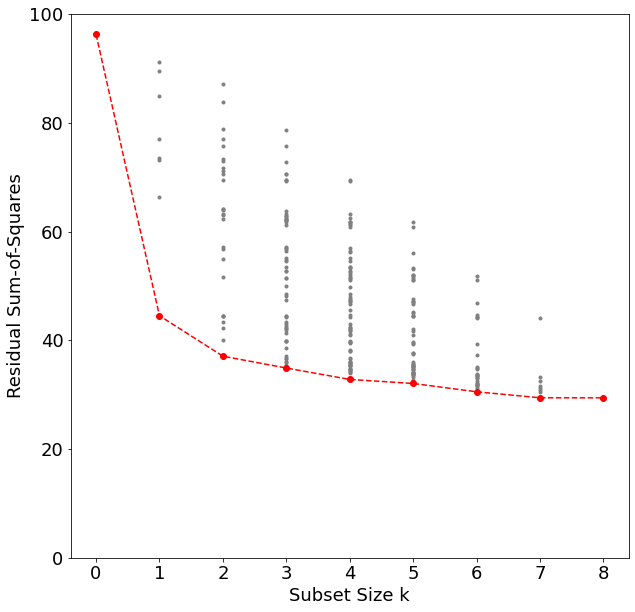

In [124]:
fig35 = plt.figure(figsize=(10, 10))
ax = fig35.add_subplot(1, 1, 1)

rss_min = []
for k in range(size_predictor+1):
    number_of_combinations = ncr(size_predictor, k)
    ols_list = ols_with_subset_size(data_x_train, vec_y, k)
    ax.plot(np.ones(number_of_combinations)*k, [d['rss'] for d in ols_list],
            'o', color='gray', markersize=3)
    ols_best = min(ols_list, key=op.itemgetter('rss'))
    rss_min.append(ols_best['rss'])
ax.plot(range(size_predictor+1), rss_min, 'o--', color='r', markersize=6)
ax.set_xlabel('Subset Size k')
ax.set_ylim(0, 100)
ax.set_ylabel('Residual Sum-of-Squares')
plt.show()

In [23]:
ols_list

[{'column_names': ('lcavol',
   'lweight',
   'age',
   'lbph',
   'svi',
   'lcp',
   'gleason',
   'pgg45'),
  'beta': array([ 2.46493292,  0.67601634,  0.26169361, -0.14073374,  0.20906052,
          0.30362332, -0.28700184, -0.02119493,  0.26557614]),
  'rss': 29.426384459908405}]

Note that the best subset of size 2, for example, need not include the variable that was in the best subset if size 1. The best-subset curve is necessarily decreasing, so cannot be used to select the subsit size $k$. The question of how to choose $k$ involves the tradeoff between bias and variance, along with more subjective desire for parsimony. There are a number of criteria that one may use; typically we choose the smallest model that minimizes an estimate of the expected prediction error.

Many of the other approaches that we discuss in this chapter are similar, in that they use the training data to produce a sequence of models varying in complexity and indexed by a single parameter. In the next section we use cross-validation to estimate prediction error and select $k$; the $\text{AIC}$ criterion is a popular alternative.

In [43]:
"""Hitters dataset from ISLR"""
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [44]:
# Here we apply the best subset selection approach to the Hitters data. 
# We wish to predict a baseball player’s Salary on the basis of various statistics associated with performance in the previous year.
hitters_df = pd.read_csv('../../data/Hitters.csv')
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [45]:
# the Salary variable is missing for some of the players
print("Number of null values:", hitters_df["Salary"].isnull().sum())

Number of null values: 59


In [48]:
# We see that Salary is missing for 59 players. 
# The dropna() function removes all of the rows that have missing values in any variable:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
print("Dimensions of original data:", hitters_df.shape)

# Drop any rows the contain missing values, along with the player names
hitters_df_clean = hitters_df.dropna(axis=0).drop('Unnamed: 0', axis=1)

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("Dimensions of modified data:", hitters_df_clean.shape)

# One last check: should return 0
print("Number of null values:", hitters_df_clean["Salary"].isnull().sum())

Dimensions of original data: (322, 21)
Dimensions of modified data: (263, 20)
Number of null values: 0


In [53]:
# Some of our predictors are categorical, so we'll want to clean those up as well. 
# We'll ask pandas to generate dummy variables for them, separate out the response variable, and stick everything back together again:
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']])

y = hitters_df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = hitters_df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [55]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [49]:
# We can perform best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. 
# We'll define a helper function to outputs the best set of variables for each model size:

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [56]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [57]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS, 
    # pandas.DataFrame.loc() access a group of rows and columns by label(s) or a boolean array
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [58]:
# This returns a DataFrame containing the best model that we generated, along with some extra information about the model. 
# Now we want to call that function for each number of predictors  k :

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 19 models on 1 predictors in 0.05321931838989258 seconds.
Processed 171 models on 2 predictors in 0.30821847915649414 seconds.
Processed 969 models on 3 predictors in 1.750037431716919 seconds.
Processed 3876 models on 4 predictors in 6.91033411026001 seconds.
Processed 11628 models on 5 predictors in 21.13918924331665 seconds.
Processed 27132 models on 6 predictors in 52.62217926979065 seconds.
Processed 50388 models on 7 predictors in 107.20377969741821 seconds.
Total elapsed time: 190.4251265525818 seconds.


In [59]:
# Now we have one big DataFrame that contains the best models we've generated along with their RSS:
models_best

,RSS,model
1,4.321393e+07,<statsmodels.regression.linear_model.Regressio...
2,3.073305e+07,<statsmodels.regression.linear_model.Regressio...
3,2.941071e+07,<statsmodels.regression.linear_model.Regressio...
4,2.797678e+07,<statsmodels.regression.linear_model.Regressio...
5,2.718780e+07,<statsmodels.regression.linear_model.Regressio...
6,2.639772e+07,<statsmodels.regression.linear_model.Regressio...
7,2.606413e+07,<statsmodels.regression.linear_model.Regressio...


In [60]:
#We can get a full rundown of a single model using the summary() function:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              416.7
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                    5.80e-82
Time:                        15:26:02   Log-Likelihood:                         -1907.6
No. Observations:                 263   AIC:                                      3819.
Df Residuals:                     261   BIC:                                      3826.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
print(models_best.loc[7, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              144.2
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                    4.76e-85
Time:                        15:27:23   Log-Likelihood:                         -1885.9
No. Observations:                 263   AIC:                                      3786.
Df Residuals:                     256   BIC:                                      3811.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
# Show the best 19-variable model (there's actually only one)
print(getBest(19)["model"].summary())

Processed 1 models on 19 predictors in 0.007192373275756836 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              54.64
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                    1.31e-76
Time:                        15:30:00   Log-Likelihood:                         -1877.9
No. Observations:                 263   AIC:                                      3794.
Df Residuals:                     244   BIC:                                      3862.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P

In [63]:
#we can access just the parts we need using the model's attributes. For example, if we want the  R2  value:
models_best.loc[2, "model"].rsquared

0.7614950002332872

In [64]:
#We can examine these to try to select the best overall model. Let's start by looking at  R2  across all our models:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.664637
2    0.761495
3    0.771757
4    0.782885
5    0.789008
6    0.795140
7    0.797728
dtype: float64

In [71]:
print(models_best.apply(lambda row: row[1].aic, axis=1))
print(models_best.apply(lambda row: row[1].aic, axis=1).argmin())
print(models_best.apply(lambda row: row[1].aic, axis=1).min())

1    3906.865252
2    3819.228530
3    3809.661852
4    3798.516052
5    3792.992461
6    3787.236460
7    3785.891731
dtype: float64
6
3785.8917313130005


Text(0, 0.5, 'BIC')

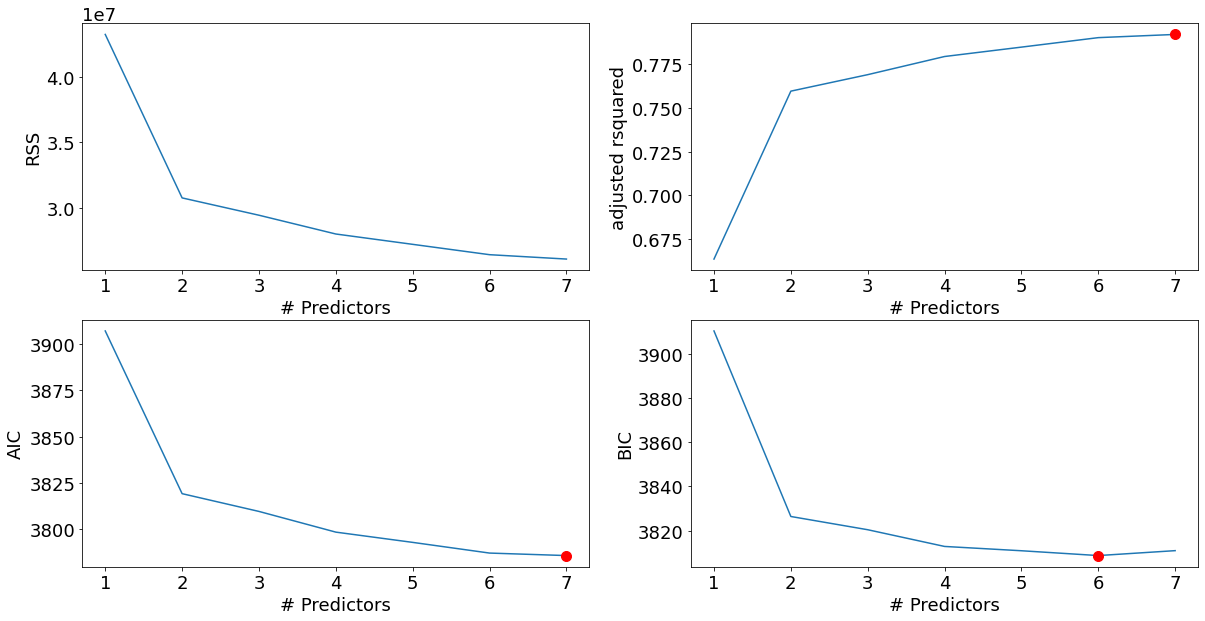

In [72]:
# Plotting RSS, adjusted  R2 , AIC, and BIC for all of the models at once will help us decide which model to select. 

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted  $R^2$  something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

## $\S$ 3.3.2. Forward- and Backward-Stepwise Selection

> Rather than search through all possible subsets, we can seek a good path through them.

### Forward-stepwise selection

*Forward-stepwise selection* starts with the intercept, and the sequentially adds into the model the predictor that most improves the fit. Clever updating algorithms can exploit the QR decomposition for the current fit to rapidly establish the next candidate. Like best-subset regression, the subset size $k$ must be determined.

Forward-stepwise selection is a *greedy algorithm*, producing a nested sequence of models. In this sense it might seem sub-optimal compared to best-subset selection. However, there are several reasons why it might be preferred:
* Computational; we can always compute the forward stepwise sequence (even when $p \gg N$).
* Statistical;forward stepwise is a more constrained search than the best subset selection, and will have lower variance, but perhaps more bias.

### Backward-stepwise selction

*Backward-stepwise selection* starts with the full model, and sequentially deletes the predictor that has the least impact on the fit. The candidate for dropping is the variable with the smallest Z-score. Backward selection can only be used when $N>p$, while forward selection can always be used.

On the prostate cancer example, best-subset, forward and backward selection all gave exactly the same sequence of terms.

In [83]:
# there are 19 predictors
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [84]:
[p for p in X.columns if p not in []]

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'League_N',
 'Division_W',
 'NewLeague_N']

In [73]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [74]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 1 predictors in 0.03515005111694336 seconds.
Processed  18 models on 2 predictors in 0.033811330795288086 seconds.
Processed  17 models on 3 predictors in 0.02893376350402832 seconds.
Processed  16 models on 4 predictors in 0.029803991317749023 seconds.
Processed  15 models on 5 predictors in 0.028636455535888672 seconds.
Processed  14 models on 6 predictors in 0.027070999145507812 seconds.
Processed  13 models on 7 predictors in 0.025038480758666992 seconds.
Processed  12 models on 8 predictors in 0.025738239288330078 seconds.
Processed  11 models on 9 predictors in 0.022580862045288086 seconds.
Processed  10 models on 10 predictors in 0.02110886573791504 seconds.
Processed  9 models on 11 predictors in 0.01943826675415039 seconds.
Processed  8 models on 12 predictors in 0.016745567321777344 seconds.
Processed  7 models on 13 predictors in 0.014856338500976562 seconds.
Processed  6 models on 14 predictors in 0.013204336166381836 seconds.
Processed  5 models on 

In [75]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              519.2
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                    4.20e-64
Time:                        16:41:14   Log-Likelihood:                         -1952.4
No. Observations:                 263   AIC:                                      3907.
Df Residuals:                     262   BIC:                                      3910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
#Let's see how the models stack up against best subset selection:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              166.3
Date:                Tue, 16 Feb 2021   Prob (F-statistic):                    1.79e-85
Time:                        16:42:03   Log-Likelihood:                         -1887.6
No. Observations:                 263   AIC:                                      3787.
Df Residuals:                     257   BIC:                                      3809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

For this data, the best one-variable through six-variable models are each identical for best subset and forward selection.

In [77]:
# Backward Selection
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [78]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 18 predictors in 0.05166292190551758 seconds.
Processed  18 models on 17 predictors in 0.03813934326171875 seconds.
Processed  17 models on 16 predictors in 0.034967660903930664 seconds.
Processed  16 models on 15 predictors in 0.03255939483642578 seconds.
Processed  15 models on 14 predictors in 0.03638648986816406 seconds.
Processed  14 models on 13 predictors in 0.0325469970703125 seconds.
Processed  13 models on 12 predictors in 0.0324857234954834 seconds.
Processed  12 models on 11 predictors in 0.02887129783630371 seconds.
Processed  11 models on 10 predictors in 0.026468515396118164 seconds.
Processed  10 models on 9 predictors in 0.02369976043701172 seconds.
Processed  9 models on 8 predictors in 0.021591901779174805 seconds.
Processed  8 models on 7 predictors in 0.020296335220336914 seconds.
Processed  7 models on 6 predictors in 0.017458677291870117 seconds.
Processed  6 models on 5 predictors in 0.017169475555419922 seconds.
Processed  5 models on 4 

For this data, the best one-variable through six-variable models are each identical for best subset and forward selection. However, the best seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are different:

In [79]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

------------
Best Subset:
------------
Hits            1.680029
Walks           3.399961
CAtBat         -0.328835
CHits           1.347017
CHmRun          1.349373
PutOuts         0.248166
Division_W   -111.943760
dtype: float64


In [80]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
Hits            7.277149
CRBI            0.652415
Division_W   -110.656338
PutOuts         0.259787
AtBat          -1.644651
Walks           3.684324
League_N       49.978410
dtype: float64


In [81]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
AtBat         -1.601655
Hits           6.148449
Walks          5.866033
CRuns          1.097453
CWalks        -0.650614
PutOuts        0.310125
Division_W   -95.027171
dtype: float64


## $\S$ 3.3.3. Forward-Stagewise Regression

Forward-stagewise regression (FS) is even more constrained than forwardstepwise
regression. It starts like forward-stepwise regression, with an intercept
equal to $\bar{y}$, and centered predictors with coefficients initially all $0$.
At each step the algorithm identifies the variable most correlated with the
current residual. It then computes the simple linear regression coefficient
of the residual on this chosen variable, and then adds it to the current coefficient for that variable. This is continued till none of the variables have
correlation with the residuals—i.e. the least-squares fit when $N > p$.


Unlike forward-stepwise regression, none of the other variables are adjusted
when a term is added to the model. As a consequence, forward stagewise can take many more than $p$ steps to reach the least squares fit, and historically has been dismissed as being inefficient. It turns out that this “slow fitting” can pay dividends in high-dimensional problems. We see in Section 3.8.1 that both forward stagewise and a variant which is slowed down even further are quite competitive, especially in very highdimensional problems.


Forward-stagewise regression is included in Figure 3.6. In this example it
takes over $1000$ steps to get all the correlations below $10^{−4}$. For subset size $k$, we plotted the error for the last step for which there where $k$ nonzero coefficients. Although it catches up with the best fit, it takes longer to do so.

## $\S$ 3.3.4. Prostate Cancer Data Example

With subset size $k$ determined via tenfold cross-validation, best-subset selection chose to use the two predictors $\texttt{lcvol}$ and $\texttt{lweight}$.

### Cross-validation, briefly

1. Cross-validation works by dividing the training data randomly into ten equal parts.
2. The learning method is fit -- for a range of values of the complexity parameter -- to nine-tenths of the data.
3. The prediction error is computed on the remaining one-tenth.
4. Repeat step 2 - step 3 for each one-tenth of the data, and the ten prediction error estimates are averaged.
5. Then we obtain an estimated prediction error curve as a function of the complexity parameter so that a proper complexity parameter can be chosen.

We have used the "one-standard-error" rule -- we pick the most parsimonious model within one standard error of the minimun. Such a rule acknowledges the fact that the tradeoff curve is estimated with error, and hence takes a conservative approach.

Note that we have already divided these data into a training set of size
67 and a test set of size 30. Cross-validation is applied to the training set,
since selecting the shrinkage parameter is part of the training process. The
test set is there to judge the performance of the selected model.

In [96]:
np.arange(67)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [87]:
divmod(67, 10)

(6, 7)

In [92]:
div, mod = divmod(67, 10)
unit_sizes = [div for _ in range(10)]
for i in range(mod):
    unit_sizes[i] += 1
print(unit_sizes)
sum(unit_sizes)

[7, 7, 7, 7, 7, 7, 7, 6, 6, 6]


67

In [94]:
for k, unit_size in enumerate(unit_sizes):
    print(k, unit_size)

0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 6
8 6
9 6


In [101]:
np.random.choice(np.arange(67), unit_size, replace=False)

array([35,  7, 64, 58,  4, 63])

In [102]:
"""FIGURE 3.7. Estimated prediction error curves and their standard errors
for the best-subset selection via tenfold cross-validation."""

def index_tenfold(n:int) -> np.ndarray:
    """Produce index array for tenfold CV with dataframe length n."""
    original_indices = np.arange(n)
    tenfold_indices = np.zeros(n)

    div, mod = divmod(n, 10)
    unit_sizes = [div for _ in range(10)]
    for i in range(mod):
        unit_sizes[i] += 1

    for k, unit_size in enumerate(unit_sizes):
        tenfold = np.random.choice(original_indices, unit_size,
                                   replace=False)
        tenfold_indices[tenfold] = k
        original_indices = np.delete(
            original_indices,
            [np.argwhere(original_indices == val) for val in tenfold],
        )
        # print(tenfold, original_indices)
    return tenfold_indices

In [107]:
print(index_tenfold(67))
len(index_tenfold(67))

[9. 7. 9. 8. 5. 1. 7. 5. 8. 3. 2. 4. 7. 4. 9. 9. 0. 0. 3. 4. 3. 4. 3. 0.
 1. 1. 8. 7. 1. 2. 3. 5. 6. 8. 2. 9. 2. 8. 2. 0. 2. 6. 5. 4. 5. 7. 4. 1.
 0. 1. 6. 6. 6. 5. 9. 6. 5. 0. 0. 2. 6. 4. 3. 7. 3. 8. 1.]


67

In [111]:
data_x_train = data_x_normalized[data['train'] == 'T']
data_y_train = data_y[data['train'] == 'T']
data_x_test = data_x_normalized[data['train'] == 'F']
data_y_test = data_y[data['train'] == 'F']
vec_y = data_y_train.values
vec_y_test = data_y_test.values

size_train = sum(data['train'] == 'T')
size_test = sum(data['train'] == 'F')
size_predictor = len(data_x_train.columns)

In [108]:
indices_tenfold = index_tenfold(size_train)
cv_results = collections.defaultdict(list)

for cv in range(10):
    mask_cv = indices_tenfold != cv
    size_cv_train = sum(mask_cv == True)

    df_x = data_x_train[mask_cv]
    v_y = vec_y[mask_cv]
    #All Subsets OLS
    for k in range(size_predictor+1):
        ols = ols_with_subset_size(df_x, v_y, k)
        ols_best = min(ols, key=op.itemgetter('rss'))
        cv_results[k].append(ols_best['rss']/size_cv_train)

rss_average = [sum(rss)/10 for _, rss in cv_results.items()]
rss_stderr = [math.sqrt((sum(np.array(rss)**2)-10*rss_average[k]**2)/9)
              for k, rss in cv_results.items()]

In [117]:
rss_average

[1.435705040941674,
 0.6627739101582181,
 0.55114165895448,
 0.5119002341038311,
 0.48542751353551605,
 0.4682757004380743,
 0.44811692523738395,
 0.43369589944674913,
 0.4329883352963549]

In [118]:
list(cv_results.keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

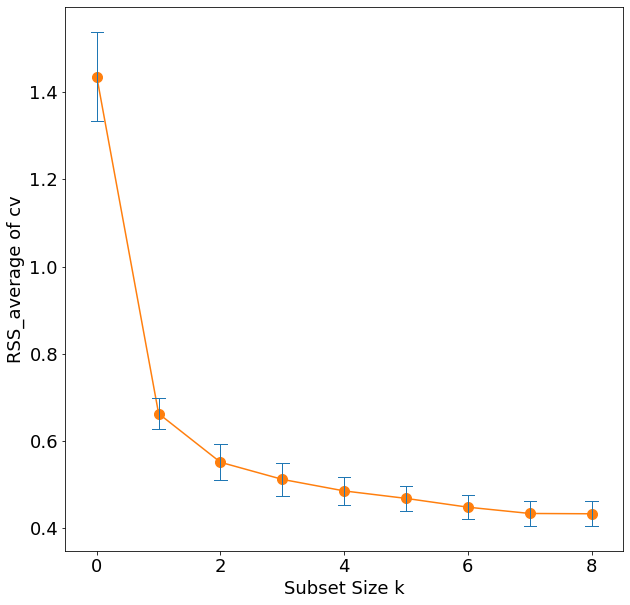

In [120]:
fig37 = plt.figure(figsize=(10, 10))
ax = fig37.add_subplot(1, 1, 1)
ax.plot(list(cv_results.keys()), rss_average, 'o-', color='C1')
for k, (ave, stderr) in enumerate(zip(rss_average, rss_stderr)):
    ax.plot([k, k], [ave-stderr, ave+stderr], color='C0', linewidth=1)
    ax.plot([k-.1, k+.1], [ave-stderr, ave-stderr], color='C0', linewidth=1)
    ax.plot([k-.1, k+.1], [ave+stderr, ave+stderr], color='C0', linewidth=1)
ax.set_xlabel('Subset Size k')
ax.set_ylabel('RSS_average of cv')
plt.show()

FIGURE 3.7. Estimated prediction error curves and their standard errors for
the various selection and shrinkage methods. Each curve is plotted as a function
of the corresponding complexity parameter for that method. The horizontal axis
has been chosen so that the model complexity increases as we move from left to
right. The estimates of prediction error and their standard errors were obtained by
tenfold cross-validation; full details are given in Section 7.10. 

In [126]:
ols_k2 = ols_with_subset_size(data_x_train, vec_y, k=2)
ols_k2_best = min(ols_k2, key=op.itemgetter('rss'))
[list(ols_k2_best['column_names'])]

[['lcavol', 'lweight']]

In [127]:
ols_k2_best['beta']

array([2.47735734, 0.73589083, 0.31469341])

In [144]:
"""Table 3.3. Estimated coefficients ad test error result for the
best-subset selection applied to the prostate data"""

ols_k2 = ols_with_subset_size(data_x_train, vec_y, k=2)
ols_k2_best = min(ols_k2, key=op.itemgetter('rss'))

df_x_test = data_x_test[list(ols_k2_best['column_names'])]
mat_x_test = np.hstack((np.ones((size_test, 1)), df_x_test.values))
vec_y_test_fitted = mat_x_test @ ols_k2_best['beta']

print('{0:>15} {1:>15}'.format('Term', 'Best Subset'))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format('Intercept', ols_k2_best['beta'][0]))
for idx, col_name in enumerate(ols_k2_best['column_names']):
    print('{0:>15} {1:>15.3f}'.format(col_name, ols_k2_best['beta'][idx+1]))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format(
    'Test Error',
    sum((vec_y_test-vec_y_test_fitted)**2)/size_test))
print('{0:>15} {1:>15.3f}'.format(
    'Std Error',
    math.sqrt((sum(np.array(vec_y_test-vec_y_test_fitted)**2)-size_test*(np.mean(vec_y_test-vec_y_test_fitted))**2)/(size_test-1)),
))

           Term     Best Subset
-------------------------------
      Intercept           2.477
         lcavol           0.736
        lweight           0.315
-------------------------------
     Test Error           0.492
      Std Error           0.714


# $\S$ 3.4. Shrinkage Methods

By retaining a subset of the predictors and discarding the rest, subset selection produces a model that is interpretable and has possibly lower prediction error than the full model. However, because it is a discrete process -- variables are either retained or discarded -- it often exhibits high variance, and so doesn't reduce the prediction error of the full model. Shrinkage methods are more continuous, and don't suffer as much from high variability.

## $\S$ 3.4.1. Ridge Regression

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares,

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}

where $\lambda \ge 0$ is a complexity parameter that controls the amount of shrinkage: the larger the $\lambda$, the greater the amount of shrinkage. The idea of penalizing by the sum-of-squares of the parameters is also used in neural networks, a.k.a. *weight decay* (Chapter 11).

An equivalent way to write the ridge problem is to make explicit the size constraint on the parameters, as

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_\beta \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 \text{ subject to } \sum_{j=1}^p \beta_j^2 \le t,
\end{equation}

where $t$ has a one-to-one correspondence with $\lambda$.

When there are many correlated variables in a linear regression model, their coefficients can become poorly determined and exhibit high variance. A wildly large positive coefficient on one variable can be canceled by a similarly large negative coefficient on its correlated cousin. By imposing a size constraint on the coefficients, this problem is alleviated.

### Scaling and centering

The ridge solutions are not equivariant under scaling of the inputs, and so  one normally standardizes the inputs before solving the ridge problem.

Also notice that the intercept $\beta_0$ has been left out of the penalty term. Penalization of the intercept would make the procedure depend on the origin chosen for $Y$; i.e., adding a constant $c$ to each of the targets $y_i$ (i.e. simply shifting) would not simply result in a shift of the predictions by the same constant $c$.

It can be shown that the ridge solution can be separated into two parts, after reparametrization using *centered* inputs: Each $x_{ij}$ gets replaced by $x_{ij}-\bar{x}_j$.
1. We estimate $\beta_0$ by the mean response $\bar{y} = \frac{1}{N}\sum_1^N y_i$.
2. The remaining coefficients get estimated by a ridge regression without intercept, using centered $x_{ij}$.

Henceforth we assume that this centering has been done, so that the input matrix $\mathbf{X}$ has $p$ columns rather than $p+1$.

### From the Bayesian point of view

Ridge regression can also be derived as the mean or mode of a posterior distribution, with a suitably chosen prior distribution.

Suppose

\begin{align}
y_i &\sim N(\beta_0+x_i^T\beta, \sigma^2) \\
\beta_j &\sim \text{ i.i.d. }N(0, \tau^2)
\end{align}

Then the log-posterior density of $\beta$, with $\tau^2$ and $\sigma^2$ assumed known, is equal to the expression

\begin{equation}
\sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\frac{\sigma^2}{\tau^2}\sum_{j=1}^p \beta_j^2,
\end{equation}

which is the penalized residual sum of squares with $\lambda = \sigma^2/\tau^2$. Thus the ridge estimate is the mode of the posterior distribution; since the distribution is Gaussian, it is also the posterior mean.

### Matrix form

We write the criterion:

\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}

in matrix form:
\begin{equation}
\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta
\end{equation}

This is a quadratic function in the $p+1$ parameters. Differentiating w.r.t. $\beta$ we obtain

\begin{align}
\frac{\partial\text{RSS}(\lambda)}{\partial\beta} &= -2\mathbf{X}^T\left(\mathbf{y}-\mathbf{X}\beta\right) + 2\lambda\beta \\
\frac{\partial^2\text{RSS}(\lambda)}{\partial\beta\partial\beta^T} &= 2\mathbf{X}^T\mathbf{X} + 2\lambda
\end{align}

we set the first derivative to zero

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) - \lambda\beta = \mathbf{X}^T\mathbf{y} - (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})\beta = 0
\end{equation}

to obtain the unique solution

\begin{equation}
\hat\beta^{\text{ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
\end{equation}

where $\mathbf{I}$ is the $p\times p$ identity matrix. Notice that the ridge solution is again a linear function of $\mathbf{y}$ by the choice of quadratic penalty $\beta^T\beta$, resulting in addition of a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank. It was actually the main motivation for ridge regression when it was first introduced in statistics (Hoerl and Kennard, 1970).

### The singular value decomposition (SVD)

The SVD of the centered input matrix $\mathbf{X}$ gives us some additional insight into the nature of ridge regression. The SVD of the $N\times p$ matrix $\mathbf{X}$ has the form

\begin{equation}
\mathbf{X} = \mathbf{UDV}^T,
\end{equation}

where

* $\mathbf{U}$ is $N\times p$ orthogonal matrix, with the columns of $\mathbf{U}$ spanning the $\text{col}(\mathbf{X})$
* $\mathbf{V}$ is $p\times p$ orthogonal matrix, with the columns of $\mathbf{V}$ spanning the $\text{row}(\mathbf{X})$
* $\mathbf{D}$ is a $p\times p$ diagonal matrix, with diagonal entries  
$d_1 \ge d_2 \ge \cdots \ge d_p \ge 0$ called the singular values of $\mathbf{X}$.
* If one or more values $d_j = 0$, $\mathbf{X}$ is singular.


If we compute the singular value decomposition (SVD) of the $N \times p$ centered data matrix $\mathbf X$ as $$\mathbf X=\mathbf U\mathbf D\mathbf V^T$$
where $\mathbf U$ is a $N × p$ matrix with orthonormal columns that span the column space of $\mathbf X$, $\mathbf V$ is a $p\times p$ orthogonal matrix, and $\mathbf D$ is a $p\times p$ diagonal matrix with elements $d_j$ ordered such
that $d_1 \ge d_2 \ge \cdots d_p \ge 0$. From this representation of $\mathbf X$ we can derive a simple expression for $\mathbf X^T\mathbf X$: 
$$\mathbf X^T\mathbf X=\mathbf V\mathbf D\mathbf U^T\mathbf U\mathbf D\mathbf V^T=\mathbf V\mathbf D^2\mathbf V^T$$
Using this expression we can compute the least squares fitted values $\hat{\mathbf y}^{ls} = \mathbf X \hat{\beta}^{ls}$ as 
$$\begin{align}
\hat{y}^{ls} &= \mathbf X \hat{\beta}^{ls}\\
&=\mathbf X(\mathbf X^T\mathbf X)^{-1}\mathbf X^T\mathbf y\\
&=\mathbf U\mathbf D\mathbf V^T(\mathbf V\mathbf D^2\mathbf V^T)^{-1}\mathbf V\mathbf D\mathbf U^T\mathbf y\\
&=\mathbf U\mathbf D\mathbf V^T(\mathbf V^{-T}\mathbf D^{-2}\mathbf V^{-1})\mathbf V\mathbf D\mathbf U^T\mathbf y\\
&=\mathbf U\mathbf U^T\mathbf y\\
&=\sum_{j=1}^{p}u_ju_j^T\mathbf y
\end{align}$$

Note

* $\mathbf{U}^T\mathbf{y}$ are the coordinates of $\mathbf{y}$ w.r.t. the orthonormal basis $\mathbf{U}$.
* the similarity with QR decomposition; $\mathbf{Q}$ and $\mathbf{U}$ are generally different orthogonal bases for $\text{col}(\mathbf{X})$.

To compare how the fitted values $\hat{\mathbf y}^{ls}$ obtained in ridge regression compare with ordinary least squares, we next consider the SVD expression for $\hat{\beta}^{ridge}$. In the same way as for least squares we find:
$$
\begin{align}
\hat\beta^{\text{ridge}} &= \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y}\\
&=(\mathbf V\mathbf D^2\mathbf V^T+\lambda\mathbf{V}\mathbf{V}^T)^{-1}\mathbf V\mathbf D\mathbf U^T\mathbf{y}\\
&=(\mathbf V(\mathbf D^2+\lambda\mathbf{I})\mathbf{V}^T)^{-1}\mathbf V\mathbf D\mathbf U^T\mathbf{y}\\
&=\mathbf{V}^{-T}(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\mathbf{y}\\
&=\mathbf{V}(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\mathbf{y}\\
\end{align}
$$
And
$$
\begin{align}
\hat y^{\text{ridge}} &=\mathbf X\hat\beta^{\text{ridge}}\\
&=\mathbf U\mathbf D\mathbf V^T\mathbf{V}(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\mathbf{y}\\
&=\mathbf U\mathbf D(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\mathbf{y}\\
\end{align}
$$
Now note that in this last expression $\mathbf D(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D$ is a diagonal matrix with elements given by $$\frac{d_j^2}{d_j^2+\lambda}$$ and the vector $\mathbf U^T\mathbf y$ is the coordinates of the vector $\mathbf y$ in the basis spanned by the $p$-columns of $\mathbf U$. Thus writing the expression by summing columns we
obtain: 
$$\begin{align}
\hat y^{\text{ridge}} &= \mathbf X\hat\beta^{\text{ridge}}\\
&=\mathbf U\mathbf D(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\mathbf{y}\\
&=\sum_{j=1}^{p}u_j\left(\frac{d_j^2}{d_j^2+\lambda}\right)u_j^T\mathbf y\\
\end{align}$$

Note that this result is similar to that found in Equation $$\sum_{j=1}^{p}u_ju_j^T\mathbf y$$ derived for ordinary least squares regression but in ridge-regression the inner products $u_j^T\mathbf y$ are now scaled by the factors $\left(\frac{d_j^2}{d_j^2+\lambda}\right)$. This means that a greater amount of shrinkage is applied to the coordinates of basis vectors with smaller $d_j^2$. Then what does a small value of $d_j^2$ mean?

### The SVD and the principal components

The SVD of the centered matrix $\mathbf{X}$ is another way of expressing the *principal components* of the variables in $\mathbf{X}$. The sample covariance matrix is given by

\begin{equation}
\mathbf{S} = \frac{1}{N}\mathbf{X}^T\mathbf{X},
\end{equation}

and via the SVD,

\begin{equation}
\mathbf{X}^T\mathbf{X} = \mathbf{VD}^2\mathbf{V}^T,
\end{equation}

which is the *eigen decomposition* of $\mathbf{X}^T\mathbf{X}$ (and of $\mathbf{S}$, up to a factor $N$). The eigenvectors $v_j$ (columns of $\mathbf{V}$) are also called the **principal components (or Karhunen-Loeve) directions** of $\mathbf{X}$ (in the $p$-dimension space). The first principal component direction $\mathbf v_1$ has the property that $\mathbf{z}_1 = \mathbf{X}\mathbf v_1$ has the larger sample projected variance than any other direction. This sample variance is easily seen to be

\begin{equation}
\mathbf{X}\mathbf{V}=\mathbf{U}\mathbf{D}
\end{equation}

\begin{equation}
\text{Var}(\mathbf{z}_1) = \text{Var}(\mathbf{X}\mathbf v_1) = \text{Var}(\mathbf{u_1}d_1)=d_1^2\text{Var}(\mathbf{u_1})=\frac{d_1^2}{N}(\mathbf{u_1}^T\mathbf{u_1})= \frac{d_1^2}{N},
\end{equation}

and in fact $\mathbf{z}_1 = \mathbf{X}\mathbf v_1 = \mathbf{u}_1 d_1$. The derived variable $z_1$ is called the first principal component of $\mathbf{X}$, and hence $\mathbf{u}_1$ is the normalized first **principal component** (in the $N$-dimension space). And subsequent principal components $z_j$ have maximum variance $d_j^2/N$, subject to being orthogonal to the earlier ones. Conversely the last principal component has minimum variance. Hence the small singular values $d_j$ correspond to directions in the $\text{col}(\mathbf{X})$ having small variance, and ridge regression shrinks these directions the most. In simple words, it does not care what seems not worth. See FIGURE 3.9 for the graphical representation of the principal components.

<span style="color:red">**The 1st principal component compresses $N$ points in $p$-dimention into $N$ points in $1$-dimention which maintains the largest variance. The 2nd principal component compresses $N$ points in $p$-dimention into $N$ points in $1$-dimention which is perpendicular to the 1st principal component and maintains the largest remained variance. And so on with the $N^{st}$ principal component.**</span>

Ridge regression protects against the potentially high variance of gradients estimated in the short directions. The implicit assumption is that the response will tend to vary most in the directions of high variance of the inputs. This is often a reasonable assumption, since predictors are often chosen for study because they vary with the response variable, but need not hold in general.

### The effective degrees of freedom

$$\hat y^{\text{ridge}} =\mathbf X\hat\beta^{\text{ridge}}=\mathbf X\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y}$$
In FIGURE 3.7 we have plotted the estimated prediction error versus the quantity.
The definition of the effective degrees of freedom $df(\lambda)$ in ridge regression is given by
\begin{align}
\text{df}(\lambda) &= \text{tr}\left( \mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T \right)\\
&= \text{tr}(\mathbf{H}_\lambda) \\
&= \text{tr}\left(\mathbf U\mathbf D(\mathbf D^2+\lambda\mathbf{I})^{-1}\mathbf D\mathbf U^T\right)\\
&=\text{tr}\left(\sum_{j=1}^{p}u_j\left(\frac{d_j^2}{d_j^2+\lambda}\right)u_j^T\right)\\
&= \sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}.
\end{align}
Since the trace of a matrix can be shown to equal the sum of its eigenvalues.

This monotone decreasing function of $\lambda$ is the *effective degrees of freedom* of the ridge regression fit. Usually in a linear-regression fit, the degrees-of-freedom of the fit is $p$, the number of free parameters. The idea is that although all $p$ coefficients in a ridge fit will be non-zero, they are fit in a restricted fashion controlled by $\lambda$. Note that

\begin{align}
\text{df}(\lambda) &= p \text{ when }\lambda = 0, \\
\text{df}(\lambda) &\rightarrow 0 \text{ as }\lambda \rightarrow \infty.
\end{align}

Of course there is always an additional one degree of freedom for the intercept, which was removed *apriori*. This definition is motivated in more detail in Section 3.4.4 and Sections 7.4-7.6.

One important consequence of this expression is that we can use it to determine the values of $\lambda$ for which to use when applying cross validation. For example, the book discusses how
to obtain the estimate of y when using ridge regression and it is given by Equation $$\hat y^{\text{ridge}} =\mathbf X\hat\beta^{\text{ridge}}=\mathbf X\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y}$$ 
but no mention of the numerical values of $\lambda$ we should use in this expression to guarantee that we have accurate coverage of all possible regularized linear models. The approach taken in generating the ridge regression results in Figure 3.8 is to consider $df$ in Equation $$\text{df}(\lambda)=\sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}$$ a function of $\lambda$. As such we set $df(\lambda) = k$ for $k = 1, 2, \cdots , p$ representing all of the possible values for the degree of freedom. We then use Newton’s root finding method to solve for $\lambda$ in the expression
$$\text{df}(\lambda)=\sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}=k, (k = 1, 2, \cdots , p)$$

>**Newton’s method (Newton-Raphson method)** uses tangent lines of the graph of $y = ƒ(x)$ near the points where $ƒ(x)=0$ to estimate the solution. The goal of Newton’s method for estimating a solution of an equation $ƒ(x) = 0$ is to produce a sequence of approximations that approach the solution. The initial estimate, $x_0$, may be found by just plain guessing. The method then uses the tangent to the curve $y = ƒ(x)$ at $(x_0, ƒ(x_0))$ to approximate the curve, calling the point $x_1$ where the tangent meets the $x$-axis. The number $x_1$ is usually a better approximation to the solution than is $x_0$. The point $x_2$ where the tangent to the curve at $(x_1, ƒ(x_1))$ crosses the $x$-axis is the next approximation in the sequence. We continue on, using each approximation to generate the next, until we are close enough to the root to stop.   
Given the approximation $x_n$, the point-slope equation for the tangent to the curve at $(x_n,ƒ(x_n))$ is $$y = ƒ(x_n) + ƒ'(x_n)(x - x_n)$$ We can find where it crosses the $x$-axis by setting $y=0$, $$0 = ƒ(x_n) + ƒ'(x_n)(x - x_n)$$ $$x - x_n=-\frac{ƒ(x_n)}{ƒ'(x_n)}$$ $$x=x_n-\frac{ƒ(x_n)}{ƒ'(x_n)}$$ This value of $x$ is the next approximation $x_{n+1}$. Then a solution of the equation $f(x)=0$ is a fixed point of the function $$x \mapsto x-\frac{f(x)}{f'(x)}$$ Newton’s method is the use of the fixed-point method to approximate a solution of the equation by finding a fixed point of the function $$x-\frac{f(x)}{f'(x)}$$  

Thus we define a function $d(\lambda)$ given by
$$d(\lambda)=\sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}-k$$
and we want $\lambda$ such that$d(\lambda) = 0$. We use Newton’s algorithm for this where we iterate given a starting value of $\lambda_0$ 
$$\lambda_{n+1}=\lambda_n-\frac{d(\lambda_n)}{d'(\lambda_n)}$$
Thus we need the derivative of $d(\lambda)$ which is given by
$$d'(\lambda)=-\sum_{j=1}^{p}\frac{d_j^2}{(d_j^2+\lambda)^2}$$
and an initial guess for $\lambda_0$. Since we are really looking for $p$ values of $\lambda$ (one for each value of $k$) we will start by solving the problems for $k = p, p−1, p−2, \cdots , 1$. When $k = p$ the value of $\lambda$ that solves $df(\lambda) = p$ is seen to be $\lambda = 0$. For each subsequent value of $k$ we use the estimate of $\lambda$ found in the previous Newton solve as the initial guess for the current Newton solve.

In [44]:
"""FIGURE 3.8. Profiles of ridge coefficients for the prostate cancer
example as tuning parameter lambda is varied.

Coefficients are plotted versus df(lambda), the effective degrees of
freedom. In case of orthonormal inputs, the ridge estimates are just a
scaled version of the least squares estimates;
beta_ridge = beta_ols/(1+lambda)
"""
import scipy
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data.pop('lpsa')
mask_train = data.pop('train')

data_x_train = data[mask_train == 'T']
data_y_train = data_y[mask_train == 'T']
beta_intercept = data_y_train.mean()
# Centering for the training data y by subtracting the mean
data_y_train_centered = data_y_train.subtract(beta_intercept)
# Centering and scaling for the training data x using zscore
data_x_train_normalized = data_x_train.apply(scipy.stats.zscore)
vec_y = data_y_train_centered.values

data_x_test = data[mask_train == 'F']
# Centering and scaling for the test data x using zscore
data_x_test_normalized = data_x_test.apply(scipy.stats.zscore)
data_y_test = data_y[mask_train == 'F']
vec_y_test = data_y_test.values

size_train = sum(mask_train == 'T')
size_test = sum(mask_train == 'F')
size_predictor = data_x_train.columns.size

In [46]:
def lambdas_from_edf(singular_squared:np.ndarray, interval:int) ->np.ndarray:
    """Given squared singular values of data matrix, calculate the lambdas
    with `interval` parameter to split unit intervals s.t. the resulting
    effective degrees of freedom are equidistant with 1/interval, via the
    Newton-Raphson method. e.g., if interval = 10, it produces lambdas for
    0, 0.5, 0.6, 0.7, ..."""
    p = singular_squared.size
    edfs = np.linspace(.5, p-.5, (p-1)*interval+1)
    threshold = 1e-3
    lambdas = []
    for edf in edfs:
        # Newton-Raphson
        lambda0 = (p-edf)/edf
        lambda1 = 1e6
        diff = lambda1 - lambda0
        while diff > threshold:
            num = (singular_squared/(singular_squared+lambda0)).sum()-edf
            denom = (singular_squared/((singular_squared+lambda0)**2)).sum()
            lambda1 = lambda0 + num/denom
            diff = lambda1 - lambda0
            lambda0 = lambda1
        lambdas.append(lambda1)
    lambdas.append(0)
    edfs = np.concatenate(([0], edfs, [p]))
    return edfs, np.array(lambdas)

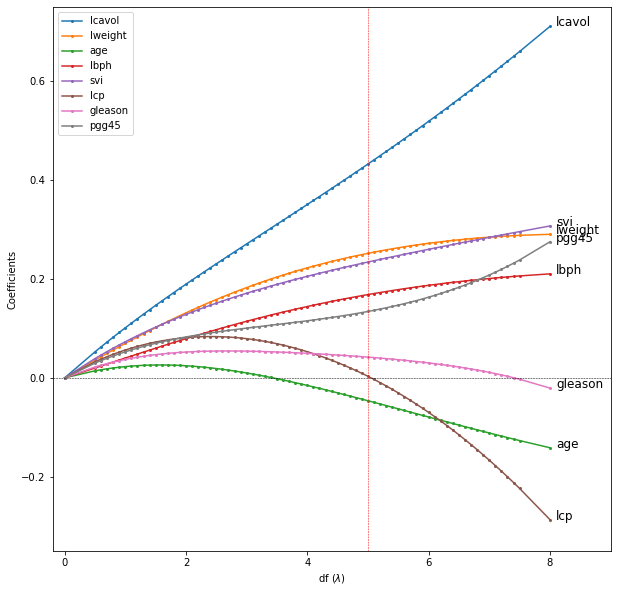

In [47]:
# singular value decomposition of data_x_train_normalized
u, s, vh = scipy.linalg.svd(data_x_train_normalized, full_matrices=False)
s2 = s**2
edfs, lambdas = lambdas_from_edf(s2, 10)
# beta_ols = vh.T @ scipy.diag(scipy.reciprocal(s)) @ u.T @ vec_y
# print(beta_ols)
beta_ridge_array = [np.zeros(size_predictor)]
for lamb in lambdas:
    mat_diag = np.diag(s/(s2+lamb))
    beta_ridge = vh.T @ mat_diag @ u.T @ vec_y
    beta_ridge_array.append(beta_ridge)
beta_ridge_array = np.array(beta_ridge_array)

fig38 = plt.figure(figsize=(10, 10))
ax = fig38.add_subplot(1, 1, 1)
ax.plot(edfs, beta_ridge_array, 'o-', markersize=2)
ax.legend(data_x_train.columns)
ax.set_xlabel(r'df ($\lambda$)')
ax.set_ylabel('Coefficients')
ax.set_xlim(-.2, 9)
ax.plot([-.2, 9], [0, 0], '--', color='0', linewidth=0.5)
ax.plot([5, 5], [-0.35, 0.75], '--', color='r', linewidth=0.5)
for x, y, s in zip(np.ones(8)*(8+0.1), beta_ridge_array[-1], data_x_train.columns):
    ax.text(x, y, s, color='0', fontsize=12)
ax.margins(0,0)
plt.show()

In [49]:
len(lambdas)

72

FIGURE 3.8. Profiles of ridge coefficients for the prostate cancer example, as
the tuning parameter $\lambda$ is varied. Coefficients are plotted versus df($\lambda$), the effective degrees of freedom. A vertical line is drawn at df = 5.0, the value chosen by cross-validation.

In [43]:
import numpy as np
import pandas as pd
# 10-folds cross-validation

def index_tenfold(n:int) ->np.ndarray:
    """Produce index array for tenfold CV with dataframe length n."""
    original_indices = np.arange(n)
    tenfold_indices = np.zeros(n)

    div, mod = divmod(n, 10)
    unit_sizes = [div for _ in range(10)]
    for i in range(mod):
        unit_sizes[i] += 1

    for k, unit_size in enumerate(unit_sizes):
        tenfold = np.random.choice(original_indices, unit_size,
                                   replace=False)
        tenfold_indices[tenfold] = k
        original_indices = np.delete(
            original_indices,
            [np.argwhere(original_indices == val) for val in tenfold],
        )
        # print(tenfold, original_indices)
    return tenfold_indices

In [44]:
"""FIGURE 3.7. CV result of the ridge regression"""
import collections
import math

cv10_indices = index_tenfold(size_train)
cv_beta = collections.defaultdict(list)
cv_rss = collections.defaultdict(list)

for cv_idx in range(10):
    mask_cv = cv10_indices != cv_idx
    size_cv_train = (mask_cv == True).size
    # Use the zscore Centered and scaled training data x
    df_x = data_x_train_normalized[mask_cv]
    cv_x = df_x.values
    # Use the subtracting-mean Centered training data y
    v_y = vec_y[mask_cv]

    # Exceptional case for lambda = infinity, or edf = 0 (constant model)
    v_y_mean= v_y.mean()
    cv_rss[0].append(((v_y-v_y_mean)**2).sum()/size_cv_train)
    
    u, s, vh = np.linalg.svd(cv_x, full_matrices=False)
    s2 = s**2
    edfs, lambdas = lambdas_from_edf(s2, 2)

    for edf, lamb in zip(edfs[1:], lambdas):
        mat_diag = np.diag(s/(s2+lamb))
        beta_ridge = vh.T @ mat_diag @ u.T @ v_y
        cv_beta[edf].append(beta_ridge)
        cv_y_fitted = cv_x @ beta_ridge
        cv_rss[edf].append(((v_y-cv_y_fitted)**2).sum()/size_cv_train)

cv_rss_average = [sum(rss)/len(rss) for _, rss in cv_rss.items()]
cv_rss_stderr = [math.sqrt(((np.array(rss)**2).sum()-sum(rss)**2/10)/9)
                 for _, rss in cv_rss.items()]

In [14]:
# For the 17 edfs, each edfs has 10 cv_rss and 1 cv_rss_average
len(cv_rss_average)

17

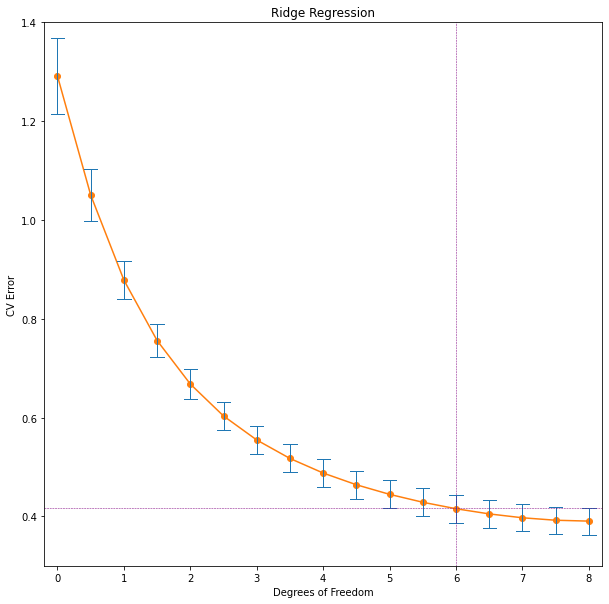

In [46]:
fig27 = plt.figure(figsize=(10, 10))
ax = fig27.add_subplot(1, 1, 1)
ax.plot(edfs, cv_rss_average, 'o-', color='C1')
for k, (ave, stderr) in enumerate(zip(cv_rss_average, cv_rss_stderr)):
    ax.plot([k/2, k/2], [ave-stderr, ave+stderr], color='C0', linewidth=1)
    ax.plot([k/2-.1, k/2+.1], [ave-stderr, ave-stderr],
            color='C0', linewidth=1)
    ax.plot([k/2-.1, k/2+.1], [ave+stderr, ave+stderr],
            color='C0', linewidth=1)
ax.set_xlabel('Degrees of Freedom')
ax.set_ylabel('CV Error')
ax.set_title('Ridge Regression')
ax.set_xlim(-.2, 8.2)
ax.plot([-.2, 8.2], [cv_rss_average[-1]+cv_rss_stderr[-1], cv_rss_average[-1]+cv_rss_stderr[-1]], '--', color='purple', linewidth=0.5)
ax.plot([6, 6], [0.3, 1.4], '--', color='purple', linewidth=0.5)
ax.margins(0,0)
plt.show()

FIGURE 3.7. Estimated prediction error curves and their standard errors for
the ridge shrinkage methods. The curve is plotted as a function
of the corresponding complexity parameter for the method. The horizontal axis
has been chosen so that the model complexity increases as we move from left to
right. The estimates of prediction error and their standard errors were obtained by tenfold cross-validation; full details are given in Section 7.10. The least complex model within one standard error of the best (the horizontal dash line) is chosen, indicated by the purple vertical broken lines.

In [27]:
# The data_y is the 'lpsa' column of the original data 
data_y

1    -0.430783
2    -0.162519
3    -0.162519
4    -0.162519
5     0.371564
        ...   
93    4.385147
94    4.684443
95    5.143124
96    5.477509
97    5.582932
Name: lpsa, Length: 97, dtype: float64

In [39]:
# vec_y_test is the 'lpsa' column of the original data with train=='F'
data_y_test = data_y[mask_train == 'F']
vec_y_test = data_y_test.values
vec_y_test

array([0.7654678, 1.047319 , 1.047319 , 1.3987169, 1.6582281, 1.7316555,
       1.7664417, 1.8164521, 2.008214 , 2.0215476, 2.0856721, 2.3075726,
       2.3749058, 2.5687881, 2.5915164, 2.5915164, 2.6844403, 2.6912431,
       2.7047113, 2.7880929, 2.8535925, 2.8820035, 2.8820035, 2.8875901,
       3.0563569, 3.0750055, 3.5130369, 3.5709402, 5.1431245, 5.5829322])

In [42]:
"""Table 3.3. for the ridge regression. Use lambda = 5 as the textbook does.
"""
lambda_from_cv = lambdas[np.where(edfs == 5)[0]-1]  # lambda with edf = 5

u, s, vh = scipy.linalg.svd(data_x_train_normalized, full_matrices=False)
s2 = s**2

mat_diag = np.diag(s/(s2+lambda_from_cv))
beta_ridge = vh.T @ mat_diag @ u.T @ vec_y

# Use the zscore Centered and scaled test data x
mat_x_test = data_x_test_normalized.values
vec_y_test_fitted = mat_x_test @ beta_ridge

print('{0:>15} {1:>15}'.format('Term', 'Best Subset'))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format('Intercept', beta_intercept))
for idx, col_name in enumerate(data.columns):
    print('{0:>15} {1:>15.3f}'.format(col_name, beta_ridge[idx]))
print('-'*31)
print('{0:>15} {1:>15.3f}'.format(
    'Test Error',
    #uncenter vec_y_test_fitted by adding beta_intercept
    ((vec_y_test-(vec_y_test_fitted+beta_intercept))**2).sum()/size_test),
)

           Term     Best Subset
-------------------------------
      Intercept           2.452
         lcavol           0.443
        lweight           0.255
            age          -0.051
           lbph           0.171
            svi           0.238
            lcp          -0.005
        gleason           0.041
          pgg45           0.137
-------------------------------
     Test Error           0.503


<h3>Singular Value Decomposition</h3>

In [11]:
from scipy.stats import multivariate_normal
# multivariate_normal(mean=array, cov=array)
rv = multivariate_normal([0, 0], [[10, 6], [6, 10]])
# .rvs() Draw random samples from a multivariate normal distribution.
X = rv.rvs(100)
sum(X)
# X is 100X2 array

array([-45.25513411, -54.32794596])

In [68]:
# np.linalg.svd() Singular Value Decomposition. mXn = (mXm)@(mXn)@(nXn)
# When a is a 2D array, it is factorized as u @ np.diag(s) @ vh = (u * s) @ vh, 
# where u and vh are 2D unitary arrays and s is a 1D array of a’s singular values. 
# When a is higher-dimensional, SVD is applied in stacked mode.
# full_matricesbool, optional If True (default), u and vh have the shapes (..., M, M) and (..., N, N), respectively. 
# Otherwise, the shapes are (..., M, K) and (..., K, N), respectively, where K = min(M, N).

U, d, Vt = np.linalg.svd(X, full_matrices=True)
# U is 100X100 array, d is 100X2 array, V is 2X2 array

V = Vt.T
d = np.sqrt(d)
print(U, '\n\n', d, '\n\n', V)

[[ 0.01  0.09 -0.07 ...  0.08  0.08  0.  ]
 [-0.03 -0.04  0.23 ...  0.02  0.11 -0.01]
 [ 0.06  0.24  0.94 ... -0.   -0.02  0.  ]
 ...
 [ 0.08 -0.02  0.   ...  0.99 -0.01 -0.  ]
 [ 0.12  0.06 -0.02 ... -0.01  0.98  0.  ]
 [-0.   -0.01  0.   ... -0.    0.    1.  ]] 

 [6.45 4.62] 

 [[ 0.71 -0.7 ]
 [ 0.7   0.71]]


In [77]:
V[0, 0]*d[0]

4.611849897053329

(-10.0, 10.0)

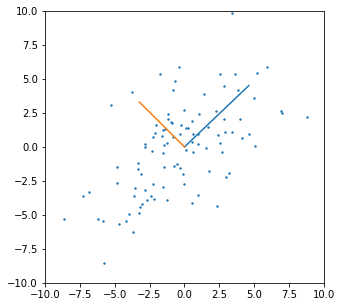

In [75]:
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.plot([0, V[0, 0]*d[0]], [0, V[1, 0]*d[0]])
ax1.plot([0, V[0, 1]*d[1]], [0, V[1, 1]*d[1]])
ax1.scatter(X[:,0], X[:,1],s=2)
ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])

FIGURE 3.9. Principal components of some input data points. The largest prin-
cipal component is the direction that maximizes the variance of the projected data,
and the smallest principal component minimizes that variance. Ridge regression
projects y onto these components, and then shrinks the coefficients of the low–
variance components more than the high-variance components.

## $\S$ 3.4.2. The Lasso

The lasso estimate is defined by

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 \text{ subject to } \sum_{j=1}^p |\beta_j| \le t,
\end{equation}

Just as in ridge regression, we can re-parametrize the constant $\beta_0$ by standardizing the predictors; $\hat\beta_0 = \bar{y}$, and thereafter we fit a model without an intercept.

In the signal processing literature, the lasso is a.k.a. *basis pursuit* (Chen et al., 1998).

Also the lasso problem has the equivalent *Lagrangian form*

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \left\lbrace \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p |\beta_j| \right\rbrace,
\end{equation}

which is similar to the ridge problem as the $L_2$ ridge penalty is replaced by the $L_1$ lasso penalty. This lasso constraint makes the solutions nonlinear in the $y_i$, and there is no closed form expresssion as in ridge regression. And computing the above lasso solution is a quadratic programming problem, although efficient algorithms, introduced in $\S$ 3.4.4, are available for computing the entire path of solution as $\lambda$ varies, with the same computational cost as for ridge regression.

Note that

* If $t \gt t_0 = \sum_1^p \lvert\hat\beta_j^{\text{ls}}\rvert$, then $\hat\beta^{\text{lasso}} = \hat\beta^{\text{ls}}$.
* Say, for $t = t_0/2$, then the least squares coefficients are shrunk by about $50\%$ on average.  
However, the nature of the shrinkage is not obvious, and we investigate it further in $\S$ 3.4.4.

In FIGURE 3.7, for ease of interpretation, we have plotted the lasso prediction error estimates versus the standardized parameter. The Shrinkage Factor $s$ is defined by:

\begin{equation}
s = \frac{t}{\sum_1^p \lvert\hat\beta_j\rvert}.
\end{equation}

A value $\hat s \approx 0.36$ was chosen by 10-fold cross-validation; this caused four coefficients to be set to zero (see Table 3.3). The resulting model has the second lowest test error, slightly lower than the full least squares model, but the standard errors of the test error estimates are fairly large.

FIGURE 3.10 is discussed after implementing the lasso algorithm in $\S$ 3.4.4.

In [1]:
%load_ext rpy2.ipython

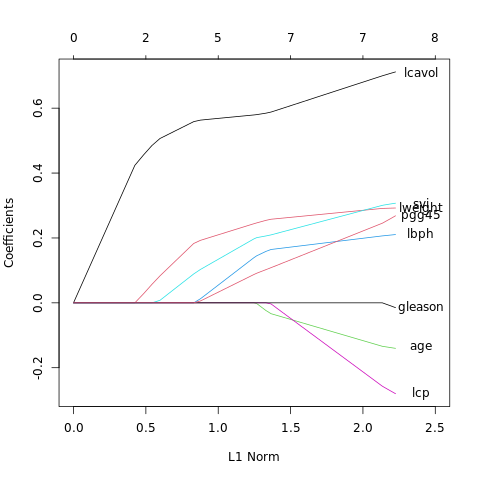

In [9]:
%%R
load_prostate_data <- function(globalScale=FALSE,trainingScale=TRUE,responseScale=FALSE){ 
  X  = read.table("../../data/prostate/prostate.data")
  if( globalScale ){
    if( responseScale ){
      lpsa = X$lpsa - mean(X$lpsa) 
    }else{
      lpsa = X$lpsa 
    }
    train = X$train
    X$lpsa = NULL
    X$train = NULL 
    X = scale(X, TRUE, TRUE)
    Xf = data.frame(X)
    Xf$lpsa = lpsa
    Xf$train = train
    X = Xf
    rm(Xf)
    rm(lpsa)
  }

  # separate into training/testing sets
  # 
  XTraining = subset( X, train )
  XTraining$train = NULL # remove the training/testing column
  p = dim(XTraining)[2]-1
  
  XTesting  = subset( X, train==FALSE )
  XTesting$train = NULL # remove the training/testing column

  #
  # Sometime data is processed and stored in a certain order.  When doing cross validation
  # on such data sets we don't want to bias our results if we grab the first or the last samples.
  # Thus we randomize the order of the rows in the Training data frame to make sure that each
  # cross validation training/testing set is as random as possible.
  # 
  if( FALSE ){
    nSamples = dim(XTraining)[1] 
    inds = sample( 1:nSamples, nSamples )
    XTraining = XTraining[inds,]
  }

  #
  # In reality we have to estimate everything based on the training data only
  # Thus here we estimate the predictor statistics using the training set
  # and then scale the testing set by the same statistics
  # 
  if( trainingScale ){
    X = XTraining 
    if( responseScale ){
      meanLpsa = mean(X$lpsa) 
      lpsa = X$lpsa - meanLpsa 
    }else{
      lpsa = X$lpsa 
    }
    X$lpsa = NULL
    X = scale(X, TRUE, TRUE)
    means = attr(X,"scaled:center")
    stds = attr(X,"scaled:scale")
    Xf = data.frame(X)
    Xf$lpsa = lpsa
    XTraining = Xf

    # scale the testing predictors by the same amounts:
    # 
    DCVTest  = XTesting
    if( responseScale ){
      lpsaTest = DCVTest$lpsa - meanLpsa
    }else{
      lpsaTest = DCVTest$lpsa # in physical units (not mean adjusted)
    }
    DCVTest$lpsa = NULL 
    DCVTest  = t( apply( DCVTest, 1, '-', means ) ) 
    DCVTest  = t( apply( DCVTest, 1, '/', stds ) ) 
    DCVTestb = cbind( DCVTest, lpsaTest ) # append back on the response
    DCVTestf = data.frame( DCVTestb ) # a data frame containing all scaled variables of interest
    names(DCVTestf)[p+1] = "lpsa" # fix the name of the response
    XTesting = DCVTestf
  }

  return( list( XTraining, XTesting ) ) 
}

PD = load_prostate_data(globalScale=FALSE,trainingScale=TRUE,responseScale=TRUE) # read in unscaled data 
XTraining = PD[[1]]
XTesting = PD[[2]]

p        = dim(XTraining)[2]-1 # the last column is the response 
nSamples = dim(XTraining)[1] 

library(glmnet)

# alpha = 1 => lasso
fit = glmnet( as.matrix( XTraining[,1:p] ), XTraining[,p+1], family="gaussian", alpha=1 )

# alpha = 0 => ridge
# fit = glmnet( as.matrix( XTraining[,1:p] ), XTraining[,p+1], family="gaussian", alpha=0 )


plot(fit,xlim=c(0, 2.5))
text(x=c(rep(2.4,8)), y=fit$beta@x[393:400], colnames(XTraining)[1:8])


FIGURE 3.10. Profiles of lasso coefficients, as the tuning parameter t is varied. Coefficients are plotted versus $L1 norm = \sum_{1}^{p}|\hat{\beta}_j |$. Compare Figure 3.8; the lasso profiles hit zero, while those for ridge do not. The profiles are piece-wise linear, and so are computed only at the points displayed.

9 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)     2.29e-16
lcavol          5.72e-01
lweight         2.21e-01
age         .           
lbph            8.25e-02
svi             1.55e-01
lcp         .           
gleason     .           
pgg45           5.08e-02


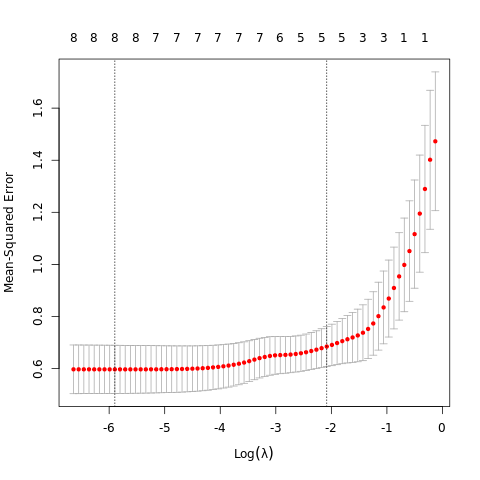

In [5]:
%%R
# do crossvalidation to get the optimal value of lambda 
cvob = cv.glmnet( as.matrix( XTraining[,1:p] ), XTraining[,p+1], family="gaussian", alpha=1 )


plot( cvob )

# get the optimal value of lambda: 
lambdaOptimal = cvob$lambda.1se

# refit with this optimal value of lambda:
fitOpt = glmnet( as.matrix( XTraining[,1:p] ), XTraining[,p+1], family="gaussian", lambda=lambdaOptimal, alpha=1 )
print( coef(fitOpt), digit=3 )



In [6]:
%%R
# predict the testing data using this value of lambda: 
yPredict = predict( fit, newx=as.matrix(XTesting[,1:p]), s=lambdaOptimal )
NTest = dim(XTesting[,1:p])[1]
print( mean( ( XTesting[,p+1] - yPredict )^2 ), digit=3 ) 
print( sqrt( var( ( XTesting[,p+1] - yPredict )^2 )/NTest ), digit=3 ) 

[1] 0.453
      1
1 0.153


## $\S$ 3.4.3. Discussion: Subset Selection, Ridge Regression, and the Lasso

### Explicit solutions in the ideal situation

In the case of an orthonormal input matrix $\mathbf{X}$, the three procecures have explicit solutions as below. $M$ and $\lambda$ are constants chosen by the corresponding techniques; sign denotes the sign of its argument (±1), and $x_+$ denotes “positive part” of $x$. Below the table, estimators are shown by broken red lines. The $45^\circ$ line in gray shows the unrestricted estimate for reference.

* Best subset (size $M$) drops all variables with coefficients smaller than the $M$th largest; this is a form of "hard-thresholding".  
\begin{equation}
\hat\beta_j\cdot I\left( \lvert\hat\beta_j\rvert \ge \lvert\hat\beta_{(M)}\rvert \right)
\end{equation}
* Ridge does a proportional shrinkage.  
\begin{equation}
\frac{\hat\beta_j}{1+\lambda}
\end{equation}
* Lasso translates each coefficient by a constant factor $\lambda$, truncating at zero. This is called "soft-thresholding".  
\begin{equation}
\text{sign}\left( \hat\beta_j \right)\left( \lvert\hat\beta_j\rvert - \lambda \right)_+
\end{equation}

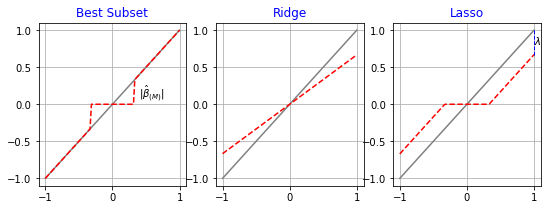

In [58]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

# Set \hat\beta_{M}=0.33
y_best_subset = x.copy()
y_best_subset[np.absolute(y_best_subset) <= .33] = 0

# Set \lambda=0.5
y_ridge = x/1.5

# Set \lambda=0.33
y_lasso = x.copy()
y_lasso[np.absolute(y_lasso) <= .33] = 0
y_lasso[y_lasso > .33] -= .33
y_lasso[y_lasso < -.33] += .33
        

fig34 = plt.figure(figsize=(9, 3))
ax1 = fig34.add_subplot(1, 3, 1)
ax1.plot(x, x, color='gray')
ax1.plot(x, y_best_subset, 'r--')
ax1.text(.4, .1, r'$|\hat\beta_{(M)}|$')
ax1.set_title('Best Subset', color = 'b')
ax1.grid()

ax2 = fig34.add_subplot(1, 3, 2)
ax2.plot(x, x, color='gray')
ax2.plot(x, y_ridge, 'r--')
ax2.set_title('Ridge', color = 'b')
ax2.grid()

ax3 = fig34.add_subplot(1, 3, 3)
ax3.plot(x, x, color='gray')
ax3.plot(x, y_lasso, 'r--')
ax3.plot([1, 1], [y_lasso[-1], 1.0], '--', color='b', linewidth=1)
ax3.text(1.0, .8, r'$\lambda$')
ax3.set_title('Lasso', color = 'b')
ax3.grid()
plt.show()

### Back to the reality; the nonorthonormal case

Back to the nonorthogonal case; some pictures help understand their relationship. Figure 3.11 depicts the lasso (left) and ridge regression (right)
when there are only two parameters. The residual sum of squares has elliptical
contours, centered at the full least squares estimate. The constraint region for ridge regression is the disk $\beta_1^2 + \beta_2^2 \leq t$, while that for lasso is the diamond $|\beta_1| + |\beta_2| \leq t$. Both methods find the first point where the elliptical contours hit the constraint region. Unlike the disk, the diamond has corners; if the solution occurs at a corner, then it has one parameter $\beta_j$ equal to zero. When $p > 2$, the diamond becomes a rhomboid, and has many corners, flat edges and faces; there are many more opportunities for the estimated parameters to be zero.

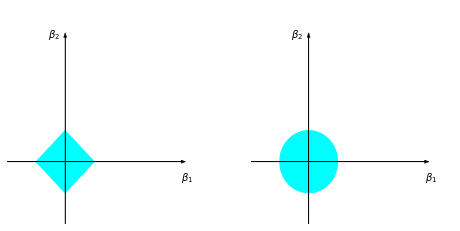

In [95]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

# lasso
y_0 = x.copy()
y_1 = 1-np.absolute(y_0)
y_2 = -(1-np.absolute(y_0))


# ridge
y_3 = np.sqrt(1-np.absolute(y_0)**2)
y_4 = -(np.sqrt(1-np.absolute(y_0)**2))


fig35 = plt.figure(figsize=(8, 4))
ax1 = fig35.add_subplot(1, 2, 1)
ax1.fill(x, y_1, color='cyan')
ax1.fill(x, y_2, color='cyan')
ax1.axis('off')
ax1.set_xlim(-2, 5)
ax1.set_ylim(-2, 5)
ax1.arrow(-2, 0, dx=6, dy=0, color='0', head_width=0.1,width=.01, linewidth=0.5)
ax1.arrow(0, -2, dx=0, dy=6, color='0', head_width=0.1,width=.01, linewidth=0.5)
ax1.text(4.0, -.6, r'$\beta_1$')
ax1.text(-0.6, 4.0, r'$\beta_2$')

ax2 = fig35.add_subplot(1, 2, 2)
ax2.fill(x, y_3, color='cyan')
ax2.fill(x, y_4, color='cyan')
ax2.axis('off')
ax2.set_xlim(-2, 5)
ax2.set_ylim(-2, 5)
ax2.arrow(-2, 0, dx=6, dy=0, color='0', head_width=0.1,width=.01, linewidth=0.5)
ax2.arrow(0, -2, dx=0, dy=6, color='0', head_width=0.1,width=.01, linewidth=0.5)
ax2.text(4.0, -.6, r'$\beta_1$')
ax2.text(-0.6, 4.0, r'$\beta_2$')

plt.show()

FIGURE 3.11. Estimation picture for the lasso (left) and ridge regression
(right). Shown are contours of the error and constraint functions. The solid blue areas are the constraint regions $|\beta_1| + |\beta_2| \leq t$ and $\beta_1^2 + \beta_2^2 \leq t^2$, respectively, while the red ellipses are the contours of the least squares error function.

### Generalization to Bayes estimates

Consider the criterion, for $q \ge 0$,

\begin{equation}
\tilde\beta = \arg\min_\beta \left\lbrace \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p\lvert\beta_j\rvert^q\right\rbrace
\end{equation}

See FIGURE 3.12 for the contours of $\sum_j\lvert\beta_j\rvert^q$.

Thinking of $\lvert\beta_j\rvert^q$ as the log-prior density for $\beta_j$, these are also the equicontours of the prior distrobution of the parameters.

* $q=0$ $\Rightarrow$ variable subset selction, as the penalty simply counts the number of nonzero parameters,
* $q=1$ $\Rightarrow$ corresponds to the lasso, Laplace distribution with density  

\begin{equation}
\frac{1}{2\tau}\exp\left(-\lvert\beta\rvert/\tau\right),
\end{equation}
where $\tau = 1/\lambda$. In this view, the lasso, ridge, and best subset selection are Bayes estimates with different priors. Note, however, that they are derived as posterior modes, that is, maximizers of the posterior. It is more common to use the mean of the posterior as the Bayes estimate. Ridge solution is also the posterior mean, but the lasso and best subset selection are not.

Note that the lasso case is the smallest $q$ such that the constraint region is convex; non-convext constraint regions make the optimization problem more difficult.

In this view, the lasso, ridge regression and best subset selection are
Bayes estimates with different priors. Note, however, that they are derived
as posterior modes, that is, maximizers of the posterior. It is more common
to use the mean of the posterior as the Bayes estimate. Ridge regression is
also the posterior mean, but the lasso and best subset selection are not.

We might try using other values of $q$ besides $0$, $1$, or $2$. Although one might consider estimating $q$ from data, our experience is that it is not worth the effort for the extra variance incurred.

Although this is the case, with $q \gt 1$, $\lvert\beta_j\rvert^q$ is differentiable at $0$, and so does not share the ability of lasso ($q=1$) for setting coefficients exactly to zero. Partly for this reason as well as for computational tractability, Zou and Hastie (2005) introduced the *elastic-net* penalty, introduced in $\S$ 18.4.

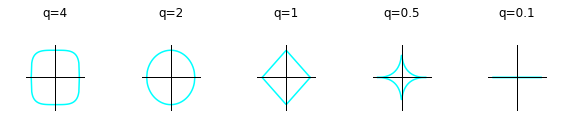

In [116]:
x = np.linspace(-1, 1, 100)

# q=4
y_0 = x.copy()
y_1 = np.sqrt(np.sqrt((1-np.absolute(y_0)**4)))
y_2 = -np.sqrt(np.sqrt((1-np.absolute(y_0)**4)))

# ridge q=2
y_3 = np.sqrt(1-np.absolute(y_0)**2)
y_4 = -(np.sqrt(1-np.absolute(y_0)**2))

# lasso q=1
y_0 = x.copy()
y_5 = 1-np.absolute(y_0)
y_6 = -(1-np.absolute(y_0))


# q=0.5
y_7 = (1-np.sqrt(np.absolute(y_0)))**2
y_8 = -(1-np.sqrt(np.absolute(y_0)))**2

# q=0.1
y_9 = (1-(np.absolute(y_0))**0.1)**10
y_10 = -(1-(np.absolute(y_0))**0.1)**10


fig36 = plt.figure(figsize=(10, 2))
ax1 = fig36.add_subplot(1, 5, 1)
ax1.plot(x, y_1, color='cyan')
ax1.plot(x, y_2, color='cyan')
ax1.axis('off')
ax1.plot([-1.2,1.2],[0,0], color='0', linewidth=1)
ax1.plot([0,0],[-1.2,1.2], color='0', linewidth=1)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_title('q=4')

ax2 = fig36.add_subplot(1, 5, 2)
ax2.plot(x, y_3, color='cyan')
ax2.plot(x, y_4, color='cyan')
ax2.axis('off')
ax2.plot([-1.2,1.2],[0,0], color='0', linewidth=1)
ax2.plot([0,0],[-1.2,1.2], color='0', linewidth=1)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_title('q=2')

ax3 = fig36.add_subplot(1, 5, 3)
ax3.plot(x, y_5, color='cyan')
ax3.plot(x, y_6, color='cyan')
ax3.axis('off')
ax3.plot([-1.2,1.2],[0,0], color='0', linewidth=1)
ax3.plot([0,0],[-1.2,1.2], color='0', linewidth=1)
ax3.set_xlim(-2, 2)
ax3.set_ylim(-2, 2)
ax3.set_title('q=1')

ax4 = fig36.add_subplot(1, 5, 4)
ax4.plot(x, y_7, color='cyan')
ax4.plot(x, y_8, color='cyan')
ax4.axis('off')
ax4.plot([-1.2,1.2],[0,0], color='0', linewidth=1)
ax4.plot([0,0],[-1.2,1.2], color='0', linewidth=1)
ax4.set_xlim(-2, 2)
ax4.set_ylim(-2, 2)
ax4.set_title('q=0.5')

ax5 = fig36.add_subplot(1, 5, 5)
ax5.plot(x, y_9, color='cyan')
ax5.plot(x, y_10, color='cyan')
ax5.axis('off')
ax5.plot([-1.2,1.2],[0,0], color='0', linewidth=1)
ax5.plot([0,0],[-1.2,1.2], color='0', linewidth=1)
ax5.set_xlim(-2, 2)
ax5.set_ylim(-2, 2)
ax5.set_title('q=0.1')

plt.show()

FIGURE 3.12. Contours of constant value of $\sum_{j}|\beta_j|^q$ for given values of $q$.

## $\S$ 3.4.4. Least Angle Regression

Least Angle Regression (LAR) is a relative newcomer (Efron et al., 2004), and can be viewed as a kind of "democratic" version of forward stepwise regression ($\S$ 3.3.2). Forward stepwise regression builds a model sequentially, adding one variable at a time. At each step, it identifies the best variable to include in the *active set*, and then updates the least squares fit to include all the active variables.

LAR uses a similar strategy, but only enters "as much" of a predictor as it deserves.

1. Identify the variable most correlated with the response.
2. Rather than fit this variable completely, LAR moves the coefficient of this variable continuously toward its least-sqaures value (causing its correlation with the evolving residual to decrease in absolute value).
3. As soon as another variable "catches up" in terms of correlation with residual, the process is paused.
4. The second variable then joins the active set, and their coefficients are moved together in a way that keeps their correlations tied and decreasing.
5. This process is continued until all the variables are in the model, and ends at the full least-squares fit.



Below is the algorithm in detail.

### Algorithm 3.2. Least Angle Regression

1. Standardize the predictors to have mean zero and unit norm.  
Start with the residual $r = y - \bar{y}$,and coefficients $\beta_0 = \beta_1 = \cdots = \beta_p = 0$. Since  with all $\beta_j = 0$ and standardized predictors the constant coefficient $\beta_0=\bar{y}$.
2. Set $k = 1$ and begin start the $k$-th step. Since all values of $\beta_j$ are zero the first residual is $r_1 = y - \bar{y}$.  Find the predictor $x_j$ that is most correlated with this residual $r_1$. Then as we begin this $k = 1$ step we have the active step given by $A_1 = \{x_j\}$ and the active
coefficients given by $\beta_{A_1} = [0]$.
3. Move $\beta_j$ from $0$ towards its least-squares coefficient $$\delta_1=\left(X_{A_1}^TX_{A_1}\right)^{-1}X_{A_1}^Tr_1=\frac{x_j^Tr_1}{x_j^Tx_j}=x_j^T r_1$$
until some other competitor $x_k$ has as much correlation with the current residual as does $x_j$. 
The path taken by the elements in $\beta_{A_1}$ can be parameterized by $$\beta_{A_1}(\alpha)\equiv\beta_{A_1}+\alpha\delta_1=0+\alpha x_j^T r_1=(x_j^T r_1)\alpha,\quad(0\leq\alpha\leq1)$$
This path of the coefficients $\beta_{A_1}(\alpha)$ will produce a path of fitted values given by $$\hat{f}_1(\alpha)=X_{A_1}\beta_{A_1}(\alpha)=(x_j^T r_1)\alpha x_j$$ and a residual of $$r(\alpha)=y-\bar{y}-\hat{f}_1(\alpha)=y-\bar{y}-(x_j^T r_1)\alpha x_j=r_1-(x_j^T r_1)\alpha x_j$$
Now at this point $x_j$ itself has a correlation with this residual as $\alpha$ varies given by $$x_j^T(r_1-(x_j^T r_1)\alpha x_j)=x_j^Tr_1-(x_j^T r_1)\alpha=(1-\alpha)x_j^T r_1$$

4. Move $\beta_j$ and $\beta_k$ in the direction defined by their joint least squares coefficient of the current residual on $(x_j,x_k)$, until some other competitor $x_l$ has as much correlation with the current residual.
5. Continue in this way until all $p$ predictors have been entered. After $\min(N-1,p)$ steps, we arrive at the full least-squares solution.

The termination condition in step 5 requires some explanation. If $p > N-1$, the LAR algorithm reaches a zero residual solution after $N-1$ steps (the $-1$ is because we have centered the data).

Suppose

* $\mathcal{A}_k$ is the active set of variables at the beginning of the $k$th step,
* $\beta_{\mathcal{A}_k}$ is the coefficient vector for these variables at this step.
There will be $k-1$ nonzero values, and the one just entered will be zero. If $\mathbf{r}_k = \mathbf{y} - \mathbf{X}_{\mathcal{A}_k}\beta_{\mathcal{A}_k}$ is the current residual, then the direction for this step is

\begin{equation}
\delta_k = \left( \mathbf{X}_{\mathcal{A}_k}^T\mathbf{X}_{\mathcal{A}_k} \right)^{-1}\mathbf{X}_{\mathcal{A}_k}^T \mathbf{r}_k\\
=\left(\mathbf{V}\mathbf D^2\mathbf{V}^T\right)^{-1}\mathbf{V}\mathbf D\mathbf U^T\mathbf{r}_k\\
=\mathbf{V}^{-T}\mathbf D^{-2}\mathbf D\mathbf U^T\mathbf{r}_k\\
\end{equation}

The coefficient profile then evolves as

\begin{equation}
\beta_{\mathcal{A}_k}(\alpha) = \beta_{\mathcal{A}_k} + \alpha\delta_k,
\end{equation}

and this direction keeps the correlations tied and decreasing (See Exercise 3.23).

If the fit vector at the beginning of this step is $\hat{\mathbf{f}}_k$, then it evolves as

\begin{equation}
\hat{\mathbf{f}}_k(\alpha) = \hat{\mathbf{f}}_k + \alpha\mathbf{u}_k,
\end{equation}

where $\mathbf{u}_k = \mathbf{X}_{\mathcal{A}_k}\delta_k$ is the new fit direction.

The name "least angle" arises from a geometrical interpretation of this process; $\mathbf{u}_k$ makes the smallest (and equal) angle with each of the predictors in $\mathcal{A}_k$ (Exercise 3.24). 

Note that, by construction, the coefficients in LAR change in a piecewise linear fashion, and we do not need to take small steps and recheck the correlations in step 3; using knowledge of the covariance of the predictors and the piecewise linearity of the algorithm, we can work out the exact step length at the beginning of each step (Exercise 3.25).

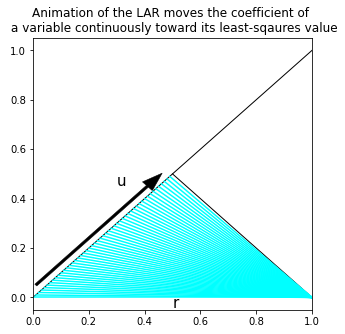

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

x = np.arange(0, 2, 0.01)
ax.plot([0,1], [0,1], color='0', linewidth=1)
ax.plot([1, 0.5],[0, 0.5], color='0', linewidth=1)
ax.set_xlim(0,1)
ax.text(0.5, -0.04, 'r', size=15)
ax.arrow(0.01, 0.05, dx=0.4, dy=0.4, color='0', head_width=0.05,width=.01, linewidth=0.5)
ax.text(0.3, 0.45, 'u', size=15)
ax.set_title('Animation of the LAR moves the coefficient of \n a variable continuously toward its least-sqaures value')

for n in range(50):
    plt.plot([1, x[n]],[0, x[n]], color='cyan')
    
plt.show()

In [117]:
"""FIGURE 3.10. LARS(lasso) coefficients profile on prostate cancer data"""
import scipy
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                 index_col=0)
dfy = df.pop('lpsa')
dfmask = df.pop('train')
size_predictor = df.columns.size

dfmask_train = dfmask == 'T'
dfx_train = df[dfmask_train]
dfy_train = dfy[dfmask_train]
size_train = dfmask_train.sum()

dfmask_test = dfmask == 'F'
dfx_test = df[dfmask_train]
dfy_test = dfy[dfmask_train]
size_test = dfmask_train.sum()

# Centering for the training data
meany_train = dfy_train.mean()
dfy_train_centered = dfy_train.subtract(meany_train)
dfx_train_centered = dfx_train.subtract(dfx_train.mean())

normx = np.sqrt((dfx_train_centered**2).sum())
dfx_train_scaled = dfx_train_centered.divide(normx)

matx = dfx_train_scaled.values
vecy = dfy_train_centered.values

In [122]:
"""Main loop for LAR

Reference:
Least Angle Regression, Efron et al., 2004, The Annals of Statistics
"""
# Initial data
signs = np.zeros(size_predictor)
betas = np.zeros(size_predictor)
indices_predictor = np.arange(size_predictor)
vecy_fitted = np.zeros_like(vecy)
beta_lars = [[0]*size_predictor]

for k in range(size_predictor):
    #vecc=X^T\bar{y}
    vecc = matx.T @ (vecy-vecy_fitted)
    vecc_abs = np.absolute(vecc)
    
    #maxc is x_j\bar{y} of the most correlated x_j
    maxc = vecc_abs.max()
    mask_maxc = np.isclose(vecc_abs, maxc)
    active = indices_predictor[mask_maxc]
    signs = np.where(vecc[active] > 0, 1, -1)
    
    #get the active column (predictor) of matx
    matx_active = signs*matx[:, active]

    u, s, vh = scipy.linalg.svd(matx_active, full_matrices=False)
    
    # X^TX = VD^2V^T
    matg = vh.T @ np.diag(s**2) @ vh
    # (X^TX)^-1 = VD^-2V^T
    matg_inv = vh.T @ np.diag(np.reciprocal(s**2)) @ vh
    vec1 = np.ones(len(active))
    scalara = (matg_inv.sum())**(-.5)
    
    #sum in the rows of matg_inv, equal to (X^TX)^-1 @ 1
    vecw = scalara * matg_inv.sum(axis=1)
    vecu = matx_active @ vecw

    veca = matx.T @ vecu

    if k < size_predictor-1:
        inactive = indices_predictor[np.invert(mask_maxc)]
        arr_gamma = np.concatenate([(maxc-vecc[inactive])/(scalara-veca[inactive]),
                                       (maxc+vecc[inactive])/(scalara+veca[inactive])])
        scalargamma = arr_gamma[arr_gamma > 0].min()
    else:
        scalargamma = maxc/scalara

    vecy_fitted += scalargamma*vecu
    betas[active] += scalargamma*signs
    beta_lars.append(list(betas))

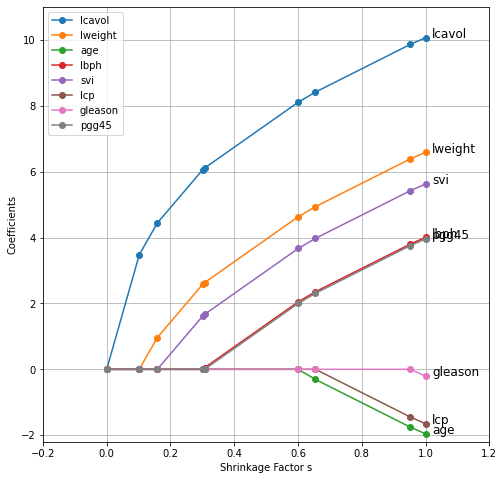

In [137]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
l1length_ols_beta = sum(abs(coeff) for coeff in beta_lars[-1])
l1length_lars_beta = [sum(abs(coeff) for coeff in beta)/l1length_ols_beta for beta in beta_lars]
ax.plot(l1length_lars_beta, beta_lars, 'o-')
ax.grid()
ax.set_xlabel('Shrinkage Factor s')
ax.set_ylabel('Coefficients')
ax.legend(dfx_train.columns)
ax.set_xlim(-.2, 1.2)
ax.set_ylim(-2.2, 11.0)
for x, y, s in zip(np.ones(8)*(1+0.02), beta_lars[-1], df.columns):
    ax.text(x, y, s, color='0', fontsize=12)
ax.margins(0,0)
plt.show()

For the prostate data, the LAR coefficient profile turns out to be identical to the lasso profile in FIGURE 3.10, which never crosses zero. These observations lead to a simple modification of the LAR algorithm that gives the entire lasso path, which is also piecewise-linear.

### Algorithm 3.2a. Least Angle Regression: Lasso Modification

4a. If a non-zero coefficient hits zero, drop its variable from the active set and recompute the current joint least squares direction.

### Computational efficiency

The LAR (lasso) algorithm is extremely efficient, requiring the same order of computation as that of a single least squares fit using the $p$ predictors. LAR always take $p$ steps to get to the full least squares estimates. The lasso path can have more than $p$ steps, although the two are often quite similar. Also the LAR algorithm with the lasso modification is efficient, especially when $p \gg N$. Osborne et al. (2000) also discovered a piecewise-linear path for computing the lasso, which they called a *homotopy* algorithm.

### Heuristic argument for why LAR and lasso are so similar

Although the LAR algorithm is stated in terms of correlations, if the input features are standardized, it is equivalent and easier to work with inner-products.

Let $\mathcal{A}$ be the active set at some stage, tied in their absolute inner-product with the current residuals $\mathbf{y}-\mathbf{X}\beta$, expressed as

\begin{equation}
\mathbf{x}_j^T\left( \mathbf{y}-\mathbf{X}\beta \right) = \gamma\cdot s_j, \forall j\in\mathcal{A},
\end{equation}

where $s_j\in\lbrace -1, 1\rbrace$ indicates the sign of the inner-product, and $\gamma$ is the common value. Also note that

\begin{equation}
\lvert \mathbf{x}_k^T \left( \mathbf{y}-\mathbf{X}\beta \right) \rvert \le \gamma, \forall k \notin \mathcal{A}
\end{equation}

Now consider the lasso criterion

\begin{equation}
\hat\beta^{\text{lasso}} = \arg\min_\beta \left\lbrace \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p x_{ij}\beta_j \right)^2 + \lambda\sum_{j=1}^p |\beta_j| \right\rbrace,
\end{equation}

which we write in the vector form

\begin{equation}
R(\beta) = \frac{1}{2}\|\mathbf{y}-\mathbf{X}\beta\|^2_2 + \lambda\|\beta\|_1.
\end{equation}

Let $\mathcal{B}$ be the active set in the solution for a given value of $\lambda$. For these variables $R(\beta)$ is differentiable, and the stationary conditions give

\begin{align*}
\frac{\partial R}{\partial\beta} &= -\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) + \lambda \frac{\partial \|\beta\|_1}{\partial\beta} = 0  \\
\mathbf{x}^T_j\left( \mathbf{y}-\mathbf{X}\beta \right) &= \lambda\cdot\text{sign}(\beta_j), \forall j\in\mathcal{B}
\end{align*}

This is identical to the above inner-product expression only if the sign of $\beta_j$ matches the sign of the inner-product. This is why the LAR and lasso start to differ when an active coefficient passes through zero; the above condition is violated for that variable, and it is kicked out of the active set $\mathcal{B}$. Exercise 3.23 shows that these equations imply a piecewise linear coefficient profile as $\lambda$ decreases.

The stationary conditions for the non-active variables require that

\begin{equation}
\lvert \mathbf{x}_k^T(\mathbf{y}-\mathbf{X}\beta) \rvert \le \lambda, \forall k\notin\mathcal{B},
\end{equation}

which again agrees with the LAR algorithm.

### Degrees-of-freedom formula for LAR and lasso

Suppose that we fit a linear model via the LAR procedure, stopping at some number of steps $k<p$, or equivalently using a lasso bound $t$ that produces a constrained version of the full least squares fit. How many parameters, or "degrees of freedom" have we used?

In classical statistics, the number of linearly independent parameters is what is meant by "degrees of freedom". So a least squares model with $k$ features has degress of freedom to be $k$. Alternatively, suppose that we carry out a best subset selection to determine the "optimal" set of $k$ predictors. Then the resulting model has $k$ parameters, but in some sense we have used up more than $k$ degrees of freedom.

We need a more general defintion for the effective degrees of freedom of an adaptively fitted model. Define the degrees of freedom of the fitted vector $\hat{\mathbf{y}}$ as

\begin{equation}
\text{df}(\hat{\mathbf{y}}) = \frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\hat{y}_i, y_i),
\end{equation}

where $\text{Cov}(\hat{y}_i, y_i)$ refers to the sampling covariance between $\hat{y}_i$ and $y_i$. This makes intuitive sense: The harder that we fit to the data, the larger this covariance and hence $\text{df}(\hat{\mathbf{y}})$. This is a useful notion of degrees of freedom, one that can be applied to any model prediction $\hat{\mathbf{y}}$, including models adaptively fitted to the training data. This definition is motivated and discussed further in $\S$ 7.4-7.6.

We relate this scalar expression into a vector inner product expression as
\begin{align}
\text{df}(\hat{\mathbf{y}}) &= \frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\hat{y}_i, y_i)\\
&=\frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\mathbf{e}_i^T\hat{\mathbf{y}}, \mathbf{e}_i^T\mathbf{y})\\
&=\frac{1}{\sigma^2}\sum_{i=1}^N \mathbf{e}_i^T\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})\mathbf{e}_i\\
\end{align}


Now for ordinary least squares regression we have 
$$\hat{\mathbf{y}}=\mathbf{X}\hat{\beta}^{ls}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$
so that the above expression for $\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})$ becomes $$\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})=\text{Cov}(\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}, \mathbf{y})=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\text{Cov}(\mathbf{y}, \mathbf{y})=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\sigma^2$$
Thus $$\text{Cov}(\hat{y}_i, y_i)=\mathbf{e}_i^T\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})\mathbf{e}_i^T=\mathbf{e}_i^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\sigma^2\mathbf{e}_i$$

Note that $\mathbf{X}^T\mathbf{e}_i=\mathbf{x}_i$ is the $i$th samples feature vector for $1\leq i\leq N$ and we have $$\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})=\mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_i\sigma^2$$
which when we sum for $i = 1$ to $N$ and divide by $\sigma^2$ gives 

\begin{align}
\text{df}(\hat{\mathbf{y}}) &= \frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\hat{y}_i, y_i)\\
&=\frac{1}{\sigma^2}\sum_{i=1}^N \text{Cov}(\mathbf{e}_i^T\hat{\mathbf{y}}, \mathbf{e}_i^T\mathbf{y})\\
&=\frac{1}{\sigma^2}\sum_{i=1}^N \mathbf{e}_i^T\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})\mathbf{e}_i\\
&=\sum_{i=1}^N \mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_i\\
&=\sum_{i=1}^N \text{trace}\left(\mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{x}_i\right)\\
&=\sum_{i=1}^N \text{trace}\left(\mathbf{x}_i\mathbf{x}_i^T(\mathbf{X}^T\mathbf{X})^{-1}\right)\\
&=\text{trace}\left(\sum_{i=1}^N \left(\mathbf{x}_i\mathbf{x}_i^T\right)(\mathbf{X}^T\mathbf{X})^{-1}\right)\\
\end{align}
Since 
$$
\sum_{i=1}^N \left(\mathbf{x}_i\mathbf{x}_i^T\right)=\begin{bmatrix}
\mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_N
\end{bmatrix}\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_N^T\\
\end{bmatrix}=\mathbf{X}^T\mathbf{X}
$$

Thus when there are $k$ predictors we get
$$\text{df}(\hat{\mathbf{y}})=\text{trace}\left(\mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\right)=\text{trace}\left(\mathbf{I}\right)=k$$




To do the same thing for ridge regression:
\begin{equation}
\hat{\mathbf{y}}=\mathbf{X}\hat\beta^{\text{ridge}} = \mathbf{X}\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
\end{equation}

so that
$$\text{Cov}(\hat{y}_i, y_i)=\mathbf{e}_i^T\text{Cov}(\hat{\mathbf{y}}, \mathbf{y})\mathbf{e}_i^T=\mathbf{e}_i^T\mathbf{X}\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\sigma^2\mathbf{e}_i\\
=\sigma^2\left(\mathbf{X}^T\mathbf{e}_i\right)^T\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{e}_i\\
=\sigma^2\mathbf{x}_i^T\left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{x}_i$$
Then summing for $i = 1, 2, \cdots ,N$ and dividing by $\sigma^2$ to get
$$\begin{align}
\text{df}(\hat{\mathbf{y}})&=\text{trace}\left(\mathbf{X}^T\mathbf{X}\left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\right)\\
&=\text{trace}\left(\mathbf{X}\left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\right)
\end{align}$$

Now

* for a linear regression with $k$ fixed predictors, it is easy to show that $\text{df}(\hat{\mathbf{y}}) = k$.
* Likewise for ridge regression, $\text{df}(\hat{\mathbf{y}}) = \text{trace}(\mathbf{S}_\lambda)$.

In both these cases, $\text{df}$ is simple to evaluate because the fit

\begin{equation}
\hat{\mathbf{y}} = \mathbf{H}_\lambda \mathbf{y}
\end{equation}

is linear in $\mathbf{y}$. If we think about the above definition of degrees of freedom in the context of a best subset selection of size $k$, it seems clear that $\text{df}(\hat{\mathbf{y}}) > k$, and this can be verified by estimating $\text{Cov}(\hat{y}_i,y_i)/\sigma^2$ directly by simulation. However there is no closed form method for estimating $\text{df}$ for best subset selection.

For LAR and lasso, estimation of $\text{df}$ is more tractable since these techniques are adaptive in a smoother way than best subset selection.

* After the $k$th step of the LAR procedure, $\text{df} = k$.
* For the lasso, the modified LAR procedure often takes more than $p$ steps, since predictors can drop out. Hence the definition is a little different; for the lasso, at any stage $\text{df}$ approximately equals the number of predictors in the model.  
While this approximation works reasonably well anywhere in the lasso path, for each $k$ it works best at the *last* model in the sequence that contains $k$ predictors.

A detailed study of the effective degrees of freedom for the lasso may be found in Zou et al. (2007).

# $\S$ 3.5. Methods Using Derived Input Directions

In many situations we have a large number of inputs, often very correlated. The methods in this section produce a small number of linear combinations $Z_m$, $m=1,\cdots,M$ of the original inputs $X_j$, and the $Z_m$ are then used in place of the $X_j$ as inputs in regression. The methods differ in how the linear combinations are constructed.

## $\S$ 3.5.1. Principal Components Regression

The linear combinations $Z_m$ used in principal component regression (PCR) are the principal components as defined in $\S$ 3.4.1.

PCR forms the derived input columns

\begin{equation}
\mathbf{z}_m = \mathbf{X} v_m,
\end{equation}

and then regress $\mathbf{y}$ on $\mathbf{z}_1,\mathbf{z}_2,\cdots,\mathbf{z}_M$ for some $M\le p$. Since the $\mathbf{z}_m$ are orthogonal, this regression is just a sum of univariate regressions:

\begin{equation}
\hat{\mathbf{y}}_{(M)}^{\text{pcr}} = \bar{y}\mathbf{1} + \sum_{m=1}^M \hat\theta_m \mathbf{z}_m = \bar{y}\mathbf{1} + \mathbf{X}\mathbf{V}_M\hat{\mathbf{\theta}},
\end{equation}

where $\hat\theta_m = \langle\mathbf{z}_m,\mathbf{y}\rangle \big/ \langle\mathbf{z}_m,\mathbf{z}_m\rangle$. We can see from the last equality that, since the $\mathbf{z}_m$ are each linear combinations of the original $\mathbf{x}_j$, we can express the solution in terms of coefficients of the $\mathbf{x}_j$.

\begin{equation}
\hat\beta^{\text{pcr}}(M) = \sum_{m=1}^M \hat\theta_m v_m.
\end{equation}

As with ridge regression, PCR depends on the scaling of the inputs, so typically we first standardized them.

lambdas### Comparison with ridge regression

If $M=p$, since the columns of $\mathbf{Z} = \mathbf{UD}$ span the $\text{col}(\mathbf{X})$,

\begin{equation}
\hat\beta^{\text{pcr}}(p) = \hat\beta^{\text{ls}}.
\end{equation}

For $M<p$ we get a reduced regression and we see that PCR is very similar to ridge regression: both operate via the principal components of the input matrix.
* Ridge regression shrinks the coefficients of the principal components (FIGURE 3.17), shrinking more depending on the size of the corresponding eigenvalue;
* PCR discards the $p-M$ smallest eigenvalue components. FIGURE 3.17 illustrates this.

In [44]:
import scipy
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('../../data/prostate/prostate.data', delimiter='\t',
                   index_col=0)
data_y = data.pop('lpsa')
mask_train = data.pop('train')

data_x_train = data[mask_train == 'T']
data_y_train = data_y[mask_train == 'T']
beta_intercept = data_y_train.mean()
# Centering for the training data y by subtracting the mean
data_y_train_centered = data_y_train.subtract(beta_intercept)
# Centering and scaling for the training data x using zscore
data_x_train_normalized = data_x_train.apply(scipy.stats.zscore)
vec_y = data_y_train_centered.values

data_x_test = data[mask_train == 'F']
# Centering and scaling for the test data x using zscore
data_x_test_normalized = data_x_test.apply(scipy.stats.zscore)
data_y_test = data_y[mask_train == 'F']
vec_y_test = data_y_test.values

size_train = sum(mask_train == 'T')
size_test = sum(mask_train == 'F')
size_predictor = data_x_train.columns.size

In [46]:
def lambdas_from_edf(singular_squared:np.ndarray, interval:int) ->np.ndarray:
    """Given squared singular values of data matrix, calculate the lambdas
    with `interval` parameter to split unit intervals s.t. the resulting
    effective degrees of freedom are equidistant with 1/interval, via the
    Newton-Raphson method. e.g., if interval = 10, it produces lambdas for
    0, 0.5, 0.6, 0.7, ..."""
    p = singular_squared.size
    edfs = np.linspace(.5, p-.5, (p-1)*interval+1)
    threshold = 1e-3
    lambdas = []
    for edf in edfs:
        # Newton-Raphson
        lambda0 = (p-edf)/edf
        lambda1 = 1e6
        diff = lambda1 - lambda0
        while diff > threshold:
            num = (singular_squared/(singular_squared+lambda0)).sum()-edf
            denom = (singular_squared/((singular_squared+lambda0)**2)).sum()
            lambda1 = lambda0 + num/denom
            diff = lambda1 - lambda0
            lambda0 = lambda1
        lambdas.append(lambda1)
    lambdas.append(0)
    edfs = np.concatenate(([0], edfs, [p]))
    return edfs, np.array(lambdas)

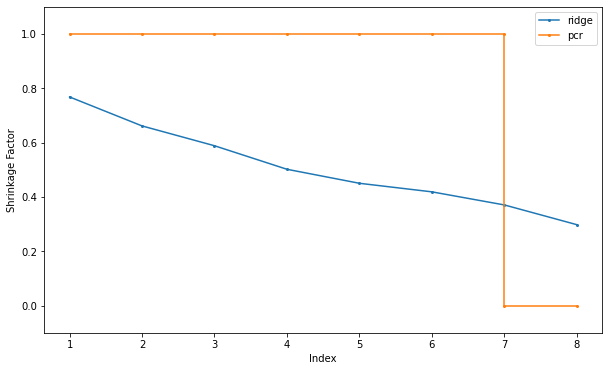

In [82]:
# singular value decomposition of data_x_train_normalized
u, s, vh = scipy.linalg.svd(data_x_train_normalized, full_matrices=False)
s2 = s**2
edfs, lambdas = lambdas_from_edf(s2, 10)
# beta_ols = vh.T @ scipy.diag(scipy.reciprocal(s)) @ u.T @ vec_y
# print(beta_ols)
beta_ridge_array = [np.zeros(size_predictor)]
shrinkage_factors = []
for lamb in lambdas:
    shrinkage = s2/(s2+lamb)
    shrinkage_factors.append(shrinkage)
    shrinkage_factors_array = np.array(shrinkage_factors)

ridge = shrinkage_factors_array.mean(axis=0)
pcr = np.array((1,1,1,1,1,1,1,0,0))


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1, 9), ridge, 'o-', markersize=2)
ax.plot(np.array((1,2,3,4,5,6,7,7,8)), pcr, 'o-', markersize=2)
ax.legend(('ridge','pcr'))
ax.set_xlabel('Index')
ax.set_ylabel('Shrinkage Factor')
ax.set_ylim(-0.1,1.1)
plt.show()

FIGURE 3.17. Ridge regression shrinks the regression coefficients of the prin-
cipal components, using shrinkage factors $d_j^2 /(d_j^2 + \lambda)$ as in (3.47). Principal component regression truncates them. Shown are the shrinkage and truncation patterns corresponding to Figure 3.7, as a function of the principal component index.

## $\S$ 3.5.2. Partial Least Squares

Unlike PCR, partial least squares (PLS) uses $\mathbf{y}$ (in addition to $\mathbf{X}$) for the construction for a set of linear combinations of the inputs.

PLS is not scale invariant like PCR, so we assume that each $\mathbf{x}_j$ is standardized to have mean $0$ and variance $1$.

### Algorithm 3.3. Partial least squares.

1. Standardized each $\mathbf{x}_j$ to have mean $0$ and variance $1$.  
Set
\begin{align}
\hat{\mathbf{y}}^{(0)} &= \bar{y}\mathbf{1} \\
\mathbf{x}_j^{(0)} &= \mathbf{x}_j, \text{ for } j=1,\cdots,p.
\end{align}

2. For $m = 1,2,\cdots,p$
  * $\mathbf{z}_m = \sum_{j=1}^p \hat\rho_{mj}\mathbf{x}_j^{(m-1)}$, where $\hat\rho_{mj} = \langle \mathbf{x}_j^{(m-1)},\mathbf{y}\rangle$.
  * $\hat\theta_m = \langle\mathbf{z}_m,\mathbf{y}\rangle \big/ \langle\mathbf{z}_m,\mathbf{z}_m\rangle$.
  * $\hat{\mathbf{y}}^{(m)} = \hat{\mathbf{y}}^{(m-1)} + \hat\theta_m \mathbf{z}_m$.
  * Orthogonalize each $\mathbf{x}_j^{(m-1)}$ w.r.t. $\mathbf{z}_m$:  
  $\mathbf{x}_j^{(m)} = \mathbf{x}_j^{(m-1)} - \frac{\langle\mathbf{z}_m,\mathbf{x}_j^{(m-1)}\rangle}{\langle\mathbf{z}_m,\mathbf{y}\rangle}\mathbf{z}_m, \text{ for } j=1,2,\cdots,p$.

3. Output the sequence of fitted vectors $\left\lbrace \hat{\mathbf{y}}^{(m)}\right\rbrace_1^p$.  
Since the $\left\lbrace \mathbf{z}_l \right\rbrace_1^m$ are linear in the original $\mathbf{x}_j$, so is  
\begin{equation}
\hat{\mathbf{y}}^{(m)} = \mathbf{X}\hat\beta^{\text{pls}}(m).
\end{equation}
These linear coefficients can be recovered from the sequence of PLS transformations.

### Gist of the PLS algorithm

PLS begins by computing the weights

\begin{equation}
\hat\rho_{1j} = \langle \mathbf{x}_j,\mathbf{y} \rangle, \text{ for each } j,
\end{equation}
which are in fact the univariate regression coefficients, since $\mathbf{x}_j$ are standardized (only for the first step $m=1$).

From this we construct derived input

\begin{equation}
\mathbf{z}_1 = \sum_j \hat\rho_{1j}\mathbf{x}_j,
\end{equation}

which is the first PLS direction. Hence in the construction of each $\mathbf{z}_m$, the inputs are weighted by the strength of their univariate effect on $\mathbf{y}$.

The outcome $\mathbf{y}$ is regressed on $\mathbf{z}_1$ giving coefficient $\hat\theta_1$, and then we orthogonalize $\mathbf{x}_1,\cdots,\mathbf{x}_p$ w.r.t. $\mathbf{z}_1$.

We continue this process, until $M\le p$ directions have been obtained. In this manner, PLS produces a sequence of derived, orthogonal inputs or directions $\mathbf{z}_1,\cdots,\mathbf{z}_M$.

* As with PCR, if $M=p$, then $\hat\beta^{\text{pls}} = \hat\beta^{\text{ls}}$.
* Using $M<p$ directions produces a reduced regression.

### Relation to the optimization problem

> PLS seeks direction that have high variance *and* have high correlation with the response, in contrast to PCR with keys only on high variance (Stone and Brooks, 1990; Frank and Friedman, 1993).

Since it uses the response $\mathbf{y}$ to construct its directions, its solution path is a nonlinear function of $\mathbf{y}$.

In particular, the $m$th principal component direction $v_m$ solves:

\begin{equation}
\max_\alpha \text{Var}(\mathbf{X}\alpha)\\
\text{subject to } \|\alpha\| = 1, \alpha^T\mathbf{S} v_l = 0 \text{ for } l = 1,\cdots, m-1,
\end{equation}

where $\mathbf{S}$ is the sample covariance matrix of the $\mathbf{x}_j$. The condition $\alpha^T\mathbf{S} v_l= 0$ ensures that $\mathbf{z}_m = \mathbf{X}\alpha$ is uncorrelated with all the previous linear combinations $\mathbf{z}_l = \mathbf{X} v_l$.

The $m$th PLS direction $\hat\rho_m$ solves:

\begin{equation}
\max_\alpha \text{Corr}^2(\mathbf{y},\mathbf{S}\alpha)\text{Var}(\mathbf{X}\alpha)\\
\text{subject to } \|\alpha\| = 1, \alpha^T\mathbf{S}\hat\rho_l = 0 \text{ for } l=1,\cdots, m-1.
\end{equation}

Further analysis reveals that the variance aspect tends to dominate, and so PLS behaves much like ridge regression and PCR. We discuss further in the next section.

If the input matrix $\mathbf{X}$ is orthogonal, then PLS finds the least squares estimates after the first $m=1$ step, and subsequent steps have no effect since the $\hat\rho_{mj} = 0$ for $m>1$ (Exercise 3.14).

It can be also shown that the sequence of PLS coefficients for $m=1,2,\cdots,p$ represents the conjugate gradient sequence for computing the least squares solutions (Exercise 3.18).

# $\S$ 3.6. Discussion: A Comparison of the Selection and Shrinkage Methods

> PLS, PCR and ridge regression tend to behave similarly. Ridge regression may be preferred because it shrinks smoothly, rather than in discrete steps. Lasso falls somewhere between ridge regression and best subset regression, and enjoys some of the properties of each.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
## generate simulated data
genXY <- function(rho = 0.5,  # correlation
                 N = 100, # number of sample
                 beta = c(4, 2)) # true coefficient
{
  # covariance matrix
  Sigma = matrix(c(1, rho,
                   rho, 1), 2, 2)
  library(MASS)
  X = mvrnorm(N, c(0, 0), Sigma)
  Y = X[, 1] * beta[1] + X[, 2] * beta[2]
  return(list(X=X, Y=Y))
}

In [18]:
%%R
## main function 
## return the beta calculated by 6 methods (ols, ridge, lasso, pcr (plus 
## mypcr which from scratch), pls, subset)
select.vs.shrink <- function(X, Y)
{
  ## least square regressions
  ols.fit <- lm(Y ~ 0 + X)
  ols.beta <- coef(ols.fit)
  #plot(ols.fit)
  ols.beta <- as.matrix(t(ols.beta))

  
  ## create grid to fit lasso/ridge path
  grid = 10^seq(10, -2, length = 100)
  

  ## lasso

  library(glmnet)
  ## use cross-validation to choose the best model
  ## lasso.fit = cv.glmnet(X, Y, alpha = 1)
  
  lasso.fit <- glmnet(X, Y, alpha = 1, lambda = grid)
  #plot(lasso.fit)
  ## extract beta
  lasso.beta <- as.matrix(lasso.fit$beta) # convert dsCMatrix to regular matrix
  #plot(lasso.beta[1,], lasso.beta[2,])
  lasso.beta <- t(lasso.beta)
  attr(lasso.beta, "dimnames") = list(NULL,
                                      c("X1","X2"))
  

  ## ridge regression

  ridge.fit = glmnet(X, Y, alpha = 0, lambda = grid)
  ridge.beta = as.matrix(ridge.fit$beta) # convert dsCMatrix to regular matrix
  ridge.beta = t(ridge.beta)
  attr(ridge.beta, "dimnames") = list(NULL,
                                      c("X1", "X2"))
  
  ## principal component regression (PCR)
  library(pls)
  pcr.fit = pcr(Y ~ X, scale = FALSE)
  pcr.beta = pcr.fit$coefficients
  pcr.beta = rbind(c(0, 0), pcr.beta[,,1], pcr.beta[,,2]) # c(0, 0) for zero PC

  ## get PCs
  pc = prcomp(X, scale = FALSE)
  pc.m = pc$rotation
  ## scores
  pc.z = pc$x
  ## use one pc
  mypcr.fit.1 = lm(Y ~ 0+pc.z[,1])
  ## use two pc
  mypcr.fit.2 = lm(Y ~ 0+pc.z)
  ## original beta
  mypcr.beta.1 = coef(mypcr.fit.1) * pc.m[, 1]
  mypcr.beta.2 = t(pc.m %*% coef(mypcr.fit.2))
  mypcr.beta = rbind(c(0, 0), mypcr.beta.1, mypcr.beta.2)
  attr(mypcr.beta, "dimnames") = list(NULL,
                                      c("X1", "X2"))

  ## Partial Least Squares (PLS)
  pls.fit = plsr(Y ~ X, scale = FALSE)
  pls.beta = pls.fit$coefficients
  pls.beta = rbind(c(0, 0), pls.beta[,,1], pls.beta[,,2])
  ## Best Subset
  library(leaps)
  bs.fit = regsubsets(x = X, y = Y, intercept = FALSE)
  if (summary(bs.fit)$which[1, 1])
  {
    bs.beta = c(coef(bs.fit, 1), 0)
  } else {
    bs.beta = c(0, coef(bs.fit, 1))
  }
  bs.beta = rbind(c(0, 0), bs.beta, coef(bs.fit, 2))
  attr(bs.beta, "dimnames") = list(NULL,
                                   c("X1","X2"))  
  res = list(ols = ols.beta,
              ridge = ridge.beta,
              lasso = lasso.beta,
              pcr = pcr.beta,
              mypcr = mypcr.beta,
              pls = pls.beta,
              subset = bs.beta)
  class(res) = "selectORshrink"
  return(res)
}

In [47]:
%%R
## plot function
## #######################################################################
plot.selectORshrink <- function(obj, rho = 0.5)
{
  plot(0, 0,
       type = "n",
       xlab = expression(beta[1]),
       ylab = expression(beta[2]),
       main = substitute(paste(rho,"=",r), list(r=rho)),
       xlim = c(0, 6),
       ylim = c(-1, 3))
  par(lwd = 1, cex = 1)
  lines(obj$ridge, col = "red")
  lines(obj$lasso, col = "green")
  lines(obj$pcr, col = "purple")
  lines(obj$pls, col = "orange")
  lines(obj$subset, col = "blue")
  points(obj$ols, col = "black", pch = 16)
  abline(h=0, lty = 2)
  abline(v=0, lty = 2)
  legend(4.8, 3,
         c("Ridge", "Lasso", "PCR", "PLS", "Best Subset", "Least Squares"),
         col = c("red", "green", "purple", "orange", "blue", "black"),
         lty = c(1,1,1,1,1,NA),
         pch =c(NA,NA,NA,NA,NA, 16),
         box.col = "white",
         box.lwd = 0,
         bg = "transparent")
}


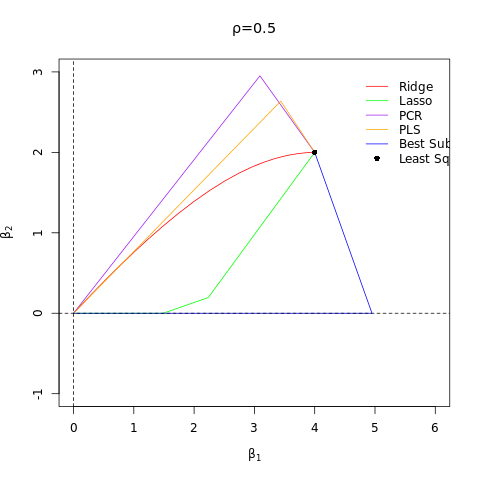

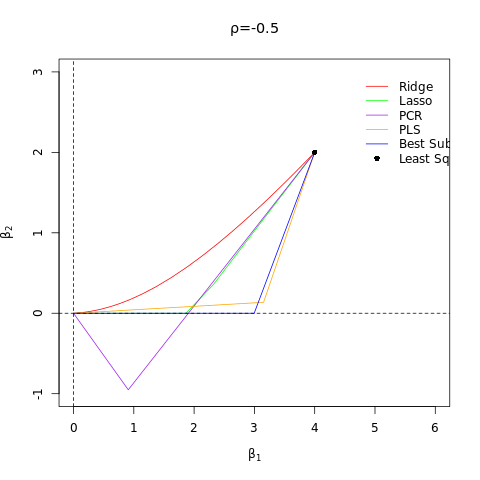

In [48]:
%%R
## case 1
set.seed(1234)
data = genXY()
X = data$X
Y = data$Y
res1 = select.vs.shrink(X, Y)
plot(res1, rho = 0.5)

## case 2
set.seed(1234)
data2 = genXY(rho = -0.5)
X2 = data2$X
Y2 = data2$Y
res2 = select.vs.shrink(X2, Y2)
plot(res2, rho = -0.5)

FIGURE 3.18. Coefficient profiles from different methods for a simple problem:
two inputs with correlation $\pm 0.5$, and the true regression coefficients $\beta = (4, 2)$.

In [38]:
%%R
prcomp(X, scale = FALSE) # get the variables Coordinates, row orthonormalized matrix V^T of X=UDV^T decomposition

Standard deviations (1, .., p=2):
[1] 1.2303554 0.7295039

Rotation (n x k) = (2 x 2):
           PC1        PC2
[1,] 0.7233374 -0.6904948
[2,] 0.6904948  0.7233374


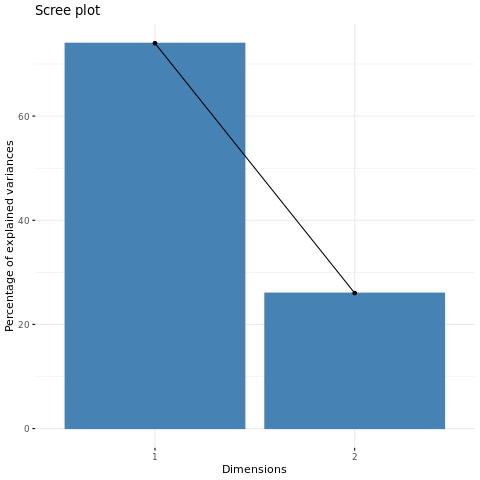

In [33]:
%%R
library(factoextra)
X.pca <- prcomp(X, scale = FALSE)
# Visualize eigenvalues (scree plot). Show the percentage of variances explained by each principal component.
fviz_eig(X.pca)

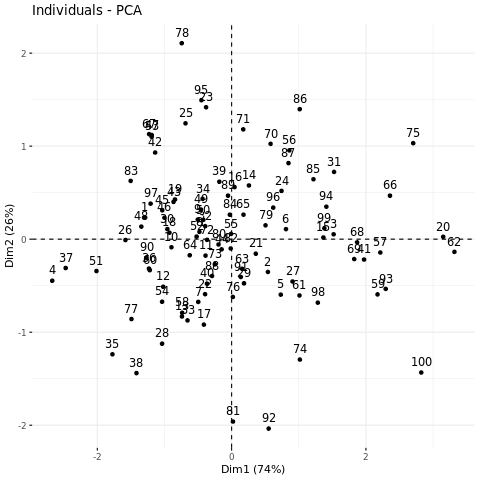

In [34]:
%%R
#Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(X.pca,)

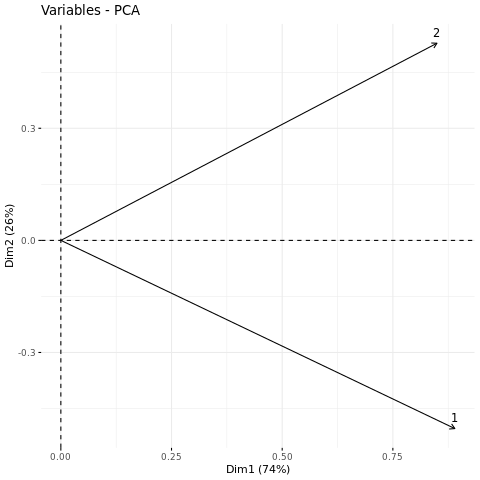

In [37]:
%%R
#Graph of variables.
fviz_pca_var(X.pca)

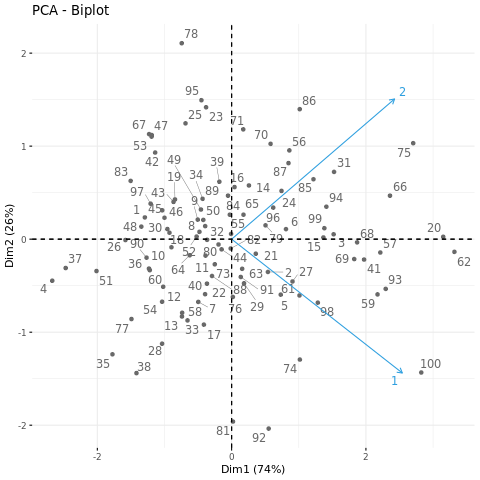

In [40]:
%%R
#Biplot of individuals and variables
fviz_pca_biplot(X.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [44]:
%%R
# Eigenvalues
eig.val <- get_eigenvalue(X.pca)
eig.val
# Results for Variables
res.var <- get_pca_var(X.pca)
res.var$coord          # Coordinates, row orthogonal matrix V^T of X=UDV^T decomposition 

        Dim.1      Dim.2
[1,] 0.889962 -0.5037187
[2,] 0.849554  0.5276774


In [46]:
%%R
# Results for individuals
res.ind <- get_pca_ind(X.pca)
head(res.ind$coord)        # Coordinates matrix XV

       Dim.1       Dim.2
1 -1.2921373  0.23400463
2  0.5401025 -0.35239212
3  1.5193405  0.05279929
4 -2.6712365 -0.44662387
5  0.7316091 -0.59640308
6  0.8094987  0.10774412


In [29]:
%%R
# PCA visualization
library(factoextra)
data(decathlon2)
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6])

R[write to console]: Loading required package: ggplot2

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



          X100m Long.jump Shot.put High.jump X400m X110m.hurdle
SEBRLE    11.04      7.58    14.83      2.07 49.81        14.69
CLAY      10.76      7.40    14.26      1.86 49.37        14.05
BERNARD   11.02      7.23    14.25      1.92 48.93        14.99
YURKOV    11.34      7.09    15.19      2.10 50.42        15.31
ZSIVOCZKY 11.13      7.30    13.48      2.01 48.62        14.17
McMULLEN  10.83      7.31    13.76      2.13 49.91        14.38


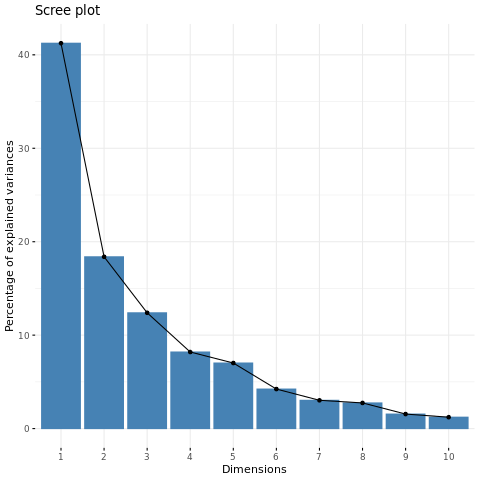

In [30]:
%%R
#Compute PCA
res.pca <- prcomp(decathlon2.active, scale = TRUE)
# Visualize eigenvalues (scree plot). Show the percentage of variances explained by each principal component.
fviz_eig(res.pca)

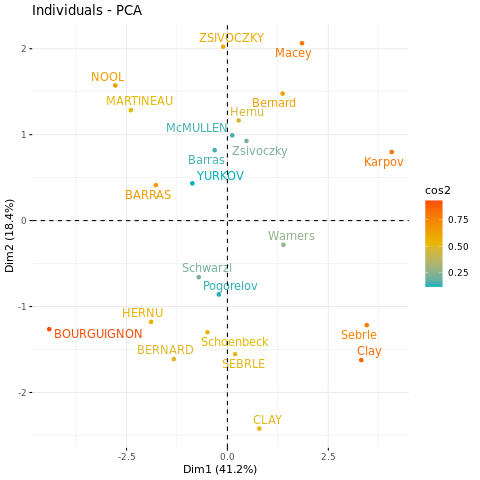

In [31]:
%%R
#Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

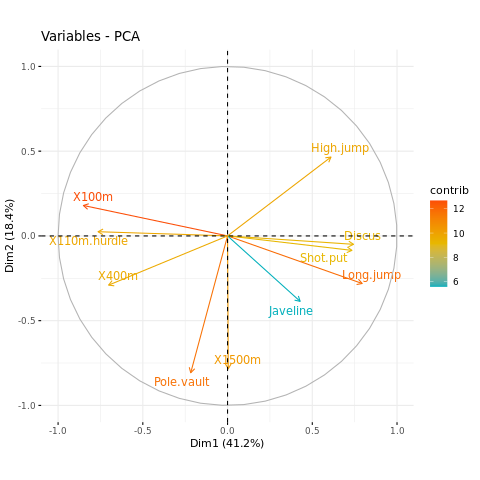

In [35]:
%%R
#Graph of variables. Positive correlated variables point to the same side of the plot. Negative correlated variables point to opposite sides of the graph.
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

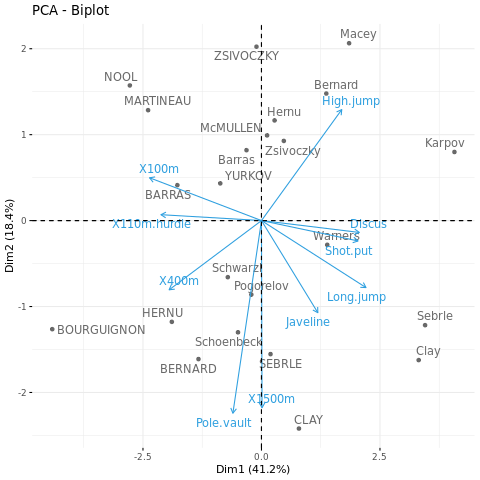

In [39]:
%%R
#Biplot of individuals and variables
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [49]:
%%R
# Eigenvalues
eig.val <- get_eigenvalue(res.pca)
eig.val

       eigenvalue variance.percent cumulative.variance.percent
Dim.1   4.1242133        41.242133                    41.24213
Dim.2   1.8385309        18.385309                    59.62744
Dim.3   1.2391403        12.391403                    72.01885
Dim.4   0.8194402         8.194402                    80.21325
Dim.5   0.7015528         7.015528                    87.22878
Dim.6   0.4228828         4.228828                    91.45760
Dim.7   0.3025817         3.025817                    94.48342
Dim.8   0.2744700         2.744700                    97.22812
Dim.9   0.1552169         1.552169                    98.78029
Dim.10  0.1219710         1.219710                   100.00000


# $\S$ Exercises  

## $\S$ Ex. 3.1  (the F-statistic is equivalent to the square of the Z-score)
Show that the F statistic (3.13) for dropping a single coefficient from a model is equal to the square of the corresponding z-score (3.12).


The F statistic,
$$
F_{p_1−p_0,N−p_1−1}=\frac{\left(\text{RSS}_0-\text{RSS}_1\right)/\left(p_1-p_0\right)}{\text{RSS}_1/\left(N-p_1-1\right)}
$$
where $\text{RSS}_1$ is the residual sum-of-squares for the least squares fit of the bigger model with $p_1+1$ parameters, and $\text{RSS}_0$ the same for the nested smaller model with $p_0+1$ parameters, having $p_1−p_0$ parameters constrained to be zero. The $F$ statistic measures the change in residual sum-of-squares per additional parameter in the bigger model, and it is normalized by an estimate of $\sigma^2$. Under the Gaussian assumptions, and the null hypothesis that the smaller model is correct, the $F$ statistic will have a $F_{p_1−p_0,N−p_1−1}$ distribution.


The $Z-score$
$$z_j=\frac{\hat{\beta}_j}{\hat{\sigma}\sqrt{v_j}}$$ where $v_j$ is the $j$th diagonal element of $(\mathbf X^T\mathbf X)^{−1}$. Under the null hypothesis
that $\beta_j = 0$, $z_j$ is distributed as $t_{N−p−1}$ (a $t$ distribution with $N − p − 1$ degrees of freedom), and hence a large (absolute) value of $zj$ will lead to rejection of this null hypothesis.

Since once $\beta$ is estimated we can compute $\sigma^2$:
$$\hat{\sigma}^2=\frac{1}{N-p-1}\sum_{i=1}^{N}(y_i-\hat{y}_i)^2=\frac{1}{N-p-1}\sum_{i=1}^{N}(y_i-x_i^T\beta)^2=\frac{\text{RSS}_1}{N-p-1}$$
In addition, by just deleting one variable from our regression the difference in degrees of freedom between the two models is one i.e. $p_1 − p_0 = 1$. Thus the $F$-statistic when we delete the $j$th term from the base model simplifies to
$$F_{1,N−p_1−1}=\frac{\left(\text{RSS}_j-\text{RSS}_1\right)}{\text{RSS}_1/\left(N-p_1-1\right)}=\frac{\left(\text{RSS}_j-\text{RSS}_1\right)}{\hat{\sigma}^2}$$

Since $$\text{RSS}_j-\text{RSS}_1=\left(\mathbf{y'}-\mathbf{X'}\left(\mathbf{X'}^T\mathbf{X'}\right)^{-1}\mathbf{X'}^T\mathbf{y'}\right)^T\left(\mathbf{y'}-\mathbf{X'}\left(\mathbf{X'}^T\mathbf{X'}\right)^{-1}\mathbf{X'}^T\mathbf{y'}\right)-\left(\mathbf{y}-\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\right)^T\left(\mathbf{y}-\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\right)$$ Where $\mathbf{X'}$ is $\mathbf{X}$ with $j$th column deleted and $\mathbf{y'}$ is $\mathbf{y}$ with $j$th element deleted.

## $\S$ Ex. 3.2  (confidence intervals on a cubic equation)
Given data on two variables $X$ and $Y$ , consider fitting a cubic
polynomial regression model $f(X) =\sum_{j=0}^{3}\beta_jX^j$. In addition to plotting the fitted curve, you would like a $95%$ confidence band about the curve. Consider the following two approaches:
1. At each point $x_0$, form a 95% confidence interval for the linear function
$a^T \beta =\sum_{j=0}^{3}\beta_jx_0^j$.
2. Form a 95% confidence set for $\beta$ as in (3.15), which in turn generates
confidence intervals for $f(x_0)$.

How do these approaches differ? Which band is likely to be wider? Conduct
a small simulation experiment to compare the two methods.


\begin{equation}
C_\beta = \left\{ \beta \big| (\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta) \le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}\right\},\quad 3.15
\end{equation} 

We fix value for the column vector $$\beta=\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_3\\
\end{bmatrix}$$ and and examine random deviations from the curve $$y=\begin{bmatrix}
1&x&x^2&x^3
\end{bmatrix}\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\beta_3\\
\end{bmatrix}$$



For a given value of $x$, the value of $y$ is randomized by adding a normally distributed variable with mean $0$ and variance $1$. For each $x$, we have a row vector $x = (1, x, x^2, x^3)$. We fix $N$ values of $x$. We arrange the corresponding values of $x$ in an $N \times 4$-matrix, which we call $X$, as
in the text. Also we denote by $y$ the corresponding $N \times 1$ column vector, with independent entries. The standard least squares estimate of $\beta$ is given by $\hat{\beta} =\left(X^TX\right)^{-1}X^Ty$. We now compute a 95% confidence region around this cubic in two different ways.

* In the first method, we find, for each $x$, a 95% confidence interval for the one-dimensional random variable $\hat{y} = x\hat{\beta}$. Now $y$ is a normally distributed random variable, and therefore so is $\hat{\beta} = (X^TX)^{−1}X^Ty$. Therefore$$\text{Var}(\hat{y})=E\left(x\hat{\beta}\hat{\beta}^Tx^T\right)-E\left(x\hat{\beta}\right) E\left(\hat{\beta}^Tx^T\right)\\
=x\text{Var}(\hat{\beta})x^T=x\left(X^TX\right)^{-1}x^T\sigma^2$$This is the variance of a normally distributed one-dimensional variable, centered at $E(\hat{y})=E(x\hat{\beta})=x\beta$, and the 95% confidence interval can be calculated as usual as 1.96 times the square root of the variance, which are shown as the red lines in the figure below.

* In the second method, since 
\begin{equation}
C_\beta = \left\{ \beta \big| (\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta) \le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}\right\},
\end{equation} and $X=UDV^T$ then
$$
\begin{align}
(\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta)&=(\hat\beta-\beta)^T\left(\mathbf{V}\mathbf{D}\mathbf{U}^T\mathbf{U}\mathbf{D}\mathbf{V}^T\right)(\hat\beta-\beta)\\
&=(\hat\beta-\beta)^T\left(\mathbf{V}\mathbf{D}^2\mathbf{V}^T\right)(\hat\beta-\beta)\\
&=\left((\hat\beta-\beta)^T\mathbf{V}\right)\mathbf{D}^2\left((\hat\beta-\beta)^T\mathbf{V}\right)^T\\
\end{align}
$$


$$
\begin{equation}
\left((\hat\beta-\beta)^T\mathbf{V}\right)\mathbf{D}^2\left((\hat\beta-\beta)^T\mathbf{V}\right)^T\le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}
\end{equation}
$$


$$
\begin{equation}
\left((\hat\beta-\beta)^T\mathbf{V}\right)\left((\hat\beta-\beta)^T\mathbf{V}\right)^T\le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}/\mathbf{D}^2
\end{equation}
$$


$$
\begin{equation}
-\sqrt{\hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}}/\mathbf{D}\le \left((\hat\beta-\beta)^T\mathbf{V}\right)\le \sqrt{\hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}}/\mathbf{D}
\end{equation}
$$
 which are shown as the blue lines in the figure below.

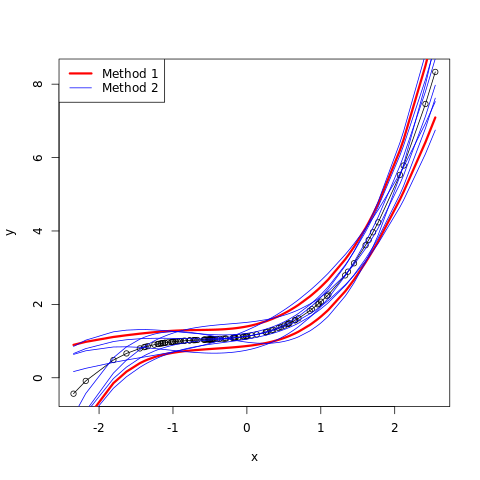

In [50]:
%%R
set.seed(1234)
N = 100
p = 3
X = rnorm(N)
beta = c(1, 0.4, 0.5, 0.2)
Y = beta[4] * X^3 + beta[3] * X^2 + beta[2] * X + beta[1] + rnorm(N)
model = lm(Y ~ X + I(X^2) + I(X^3))
sigma2 = sum(model$residuals^2) / (N - p - 1)

Xfull = cbind(1, X, X^2, X^3)
# method 1
XX = t(Xfull) %*% Xfull
invXX = solve(XX) # calculate (X^TX)^{-1}
s2 = apply(Xfull, 1, function(x) t(x) %*% invXX %*% x) * sigma2 # calculate x(X^TX)^{-1}x^T\sigma^2
yhat = model$fitted.values
idx = order(X)
plot(X[idx], yhat[idx], type = "o", xlab = "x", ylab = "y")
lines(X[idx], yhat[idx] + qnorm(.975) * sqrt(s2[idx]), col = "red", lwd = 3)
lines(X[idx], yhat[idx] - qnorm(.975) * sqrt(s2[idx]), col = "red", lwd = 3)

# method 2
# svd decomposition
s = svd(Xfull)
delta = solve(t(s$v), diag(sqrt(sigma2 * qchisq(.95, p+1))/s$d))
#delta==(t(s$v))^{-1}%*%diag(sqrt(sigma2 * qchisq(.95, p+1))/s$d)

lines(X[idx], Xfull[idx,] %*% (model$coefficients + delta[,1]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients + delta[,2]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients + delta[,3]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients + delta[,4]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients - delta[,1]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients - delta[,2]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients - delta[,3]), col = "blue")
lines(X[idx], Xfull[idx,] %*% (model$coefficients - delta[,4]), col = "blue")

legend("topleft", c("Method 1", "Method 2"), col= c("red", "blue"), lwd = c(3, 1))

The middle black curve is the curve $$y=1+0.4x+0.5x^2+0.2x^3$$
The two red curves come from the upper and lower limits of the 95% confidence interval, taken separately at each value of $x$. The blue curves are the result of sampling values from the boundary of the 4-dimensional 95% confidence region for values of $\hat{\beta}$, as determined by the $\chi_4^2$ distribution, and then drawing the corresponding curve. Note that the blue curves do not lie entirely between the red curves.

## $\S$ Ex. 3.3  (the Gauss-Markov theorem)
(a) Prove the Gauss–Markov theorem: the least squares estimate of a parameter $a^T \beta$ has variance no bigger than that of any other linear unbiased estimate of $a^T \beta$ (Section 3.2.2).
(b) The matrix inequality $B \preceq A$ holds if $A − B$ is positive semidefinite. Show that if $\hat{V}$ is the variance-covariance matrix of the least squares estimate of $\beta$ and $\tilde{V}$ is the variance-covariance matrix of any other linear unbiased estimate, then $\hat{V}\preceq\tilde{V}$.

Suppose we have in matrix notation,
$$y=\mathbf{X}\beta+\epsilon$$ where$ \mathbf{X}$ is a $N\times p$ matrix

The Gauss–Markov assumptions concern the set of error random variables,$\epsilon$ 

* They have mean zero:$E(\epsilon_i)=0$
* They are homoscedastic, that is all have the same finite variance: $\text{Var}(\epsilon_i)=\sigma^2<\infty$ for all $i$
* Distinct error terms are uncorrelated: $\text{Cov}(\epsilon_i,\epsilon_j)=0,\forall i\ne j$

The estimator is said to be unbiased if and only if $\text{E}(\hat{\beta})=\beta$ regardless of the values of $\mathbf{X}$. The ols estimator of $\beta$ is $\hat{\beta}^{ols}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty$ If there is another estimator of $\beta$ is $\hat{\beta}^{'}=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)y$, where $\mathbf{D}$ is a $p\times N$  non-zero matrix. As we're restricting to unbiased estimators, minimum mean squared error implies minimum variance. The goal is therefore to show that such an estimator has a variance no smaller than that of $\hat{\beta}^{ols}$

$$\begin{align}
\text{E}(\hat{\beta}^{'})&=\text{E}\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)y\right]\\
&=\text{E}\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)(\mathbf{X}\beta+\epsilon)\right]\\
&=\text{E}\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\mathbf{X}\beta+\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\epsilon\right]\\
&=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\mathbf{X}\beta+\text{E}\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\epsilon\right]\\
&=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\mathbf{X}\beta+\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\text{E}(\epsilon)\right]\\
&=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\mathbf{X}\beta\\
&=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{X}\beta+\mathbf{D}\mathbf{X}\beta\\
&=\left(\mathbf{I}+\mathbf{D}\mathbf{X}\right)\beta
\end{align}
$$
Therefore, since $\beta$ is unobservable, $\hat{\beta}^{'}$ is unbiased if and only if $=\mathbf{D}\mathbf{X}=0$. Then 
$$\begin{align}
\text{Var}(\hat{\beta}^{'})&=\text{Var}\left[\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)y\right]\\
&=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)^T\sigma^2\\
&=\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T+\mathbf{D}\right)\left(\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-T}+\mathbf{D}^T\right)\sigma^2\\
&=\sigma^2\left[\left(\mathbf{X}^T\mathbf{X}\right)^{-1}+\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{D}^T+\mathbf{D}\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-T}+\mathbf{D}\mathbf{D}^T\right]\\
&=\sigma^2\left[\left(\mathbf{X}^T\mathbf{X}\right)^{-1}+\mathbf{D}\mathbf{D}^T\right]\\
&=\text{Var}(\hat{\beta})+\sigma^2\mathbf{D}\mathbf{D}^T
\end{align}
$$
Since $\mathbf{D}\mathbf{D}^T$ is a positive semidefinite matrix, $\text{Var}(\hat{\beta}^{'})$ exceeds $\text{Var}(\hat{\beta})$ by a positive semidefinite matrix.

## $\S$ Ex. 3.4  (the vector of least squares coefficients from Gram-Schmidt)

Show how the vector of least squares coefficients can be obtained from a single pass of the Gram–Schmidt procedure (Algorithm 3.1). Represent your solution in terms of the $QR$ decomposition of $\mathbf{X}$.

Since 
$$\begin{align}
\hat{\beta}&=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\\
&=\left(\mathbf{R}^T\mathbf{Q}^T\mathbf{Q}\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\left(\mathbf{R}^T\mathbf{R}\right)^{-1}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\mathbf{R}^{-1}\mathbf{R}^{-T}\mathbf{R}^T\mathbf{Q}^T\mathbf{y}\\
&=\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}\\
\end{align}$$ where $\mathbf{Q}$ and $\mathbf{R}$ are computed from the Gram-Schmidt procedure on $\mathbf{X}$. then 
$$\begin{align}
\hat{y}&=\mathbf{X}\beta\\
&=\mathbf{Q}\mathbf{R}\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}\\
&=\mathbf{Q}\mathbf{Q}^T\mathbf{y}\\
\end{align}$$

As we compute the columns of the matrix $\mathbf{Q}$ in the
Gram-Schmidt procedure we can evaluate $q_j^Ty$ for each column $q_j$ of $\mathbf{Q}$, and fill in the $j$-th element of the vector $\mathbf{Q}^Ty$. After the matrices $\mathbf{Q}$ and $\mathbf{R}$ are computed one can then solve
$$\hat{\beta}=\mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y}$$
and
$$\mathbf{R}\hat{\beta}=\mathbf{Q}^T\mathbf{y}$$
This is simple to do since $\mathbf{R}$ is upper triangular
and is performed with back-substitution, first solving for $\hat{\beta}_{p}$, then $\hat{\beta}_{p-1}$, then $\hat{\beta}_{p-2}$, and on
until $\hat{\beta}_{0}$.

## $\S$ Ex. 3.5  (an equivalent problem to ridge regression)

Consider the ridge regression problem (3.41). Show that this problem is equivalent to the problem

$$
\begin{equation}
\hat\beta^c = \underset{\beta^c}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0^c - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c \right)^2 +\lambda\sum_{j=1}^p {\beta_j^c}^2 \right\rbrace
\end{equation}
$$
Give the correspondence between $\beta^c$ and the original $\beta$ in (3.41):
$$\begin{equation}
\hat\beta^{\text{ridge}} = \underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}$$

Characterize the solution to this modified criterion. Show that a similar result holds for the lasso.

Since the ridge expression problem can be written as

$$\begin{align}
\hat\beta^{\text{ridge}} &= \underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p (x_{ij}+\bar{x}_j-\bar{x}_j)\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace\\
&=\underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p \bar{x}_j\beta_j - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace\\
\end{align}$$

We can define $$\beta_0^c=\beta_0+\sum_{j=1}^p \bar{x}_j\beta_j$$
$$\beta_j^c=\beta_i\quad i=1,2,\cdots,p$$
then the above equation can be wrote as 

$$\begin{align}
\hat\beta^{\text{ridge}} &= \underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p (x_{ij}+\bar{x}_j-\bar{x}_j)\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace\\
&=\underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p \bar{x}_j\beta_j - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace\\
&=\underset{\beta}{\arg\min}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0^c - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c \right)^2 +\lambda\sum_{j=1}^p {\beta_j^c}^2 \right\rbrace\\
\end{align}$$

The equivalence of the minimization results from the fact that if $\beta_i$ minimize its respective functional the $\beta_i^c$ will do the same.

By centering the $x_i$’s to have zero mean we have translated all points to the origin. As such only the “intercept” of the data or $\beta_0$ is modified, the “slope” or $\beta_j^c,\quad j=1,2,3,\cdots,p$ are not modified.

We compute the value of $\beta_0^c$ in the above expression by setting the derivative with respect to this variable equal to zero. We obtain

$$\frac{\partial{\hat\beta^{\text{ridge}}}}{\partial{\beta_0^c}}=-2\sum_{i=1}^N\left( y_i - \beta_0^c - \sum_{j=1}^p (x_{ij}-\bar{x}_j)\beta_j^c \right)=0$$

$$\beta_0^c=\bar{y}$$

The same argument above can be used to show that the minimization required for the lasso can be written in the same way (with ${\beta_j^c}^2$ replaced by $|\beta_j^c|$). The intercept in the centered case continues to be $\bar{y}$.

## $\S$ Ex. 3.6 (the ridge regression estimate)   

Show that the ridge regression estimate is the mean (and mode)
of the posterior distribution, under a Gaussian prior $\beta\sim N(0,\tau^2 \mathbf{I})$, and Gaussian sampling model $y\sim N(\mathbf{X\beta,\sigma^2\mathbf{I}})$. Find the relationship between the regularization parameter $\lambda$ in the ridge formula, and the variances $\tau$ and $\sigma^2$.

From Bayes' rule we have $$p(\beta|D)=p(D|\beta)p(\beta)=N(y-\mathbf{X\beta,\sigma^2\mathbf{I}}) N(0,\tau^2 \mathbf{I})$$
Since a $p$-dimensional normal density for the random vector $\mathbf x^T=[x_1,x_2,\cdots,x_p]$ has the form $$
f_X(\mathbf x)=\frac{1}{(2\pi)^{p/2}|\mathbf\Sigma|^{1/2}}e^{-\frac{1}{2}(\mathbf x-\boldsymbol \mu)^T(\mathbf\Sigma)^{-1}(\mathbf x-\boldsymbol \mu)}=N_p(\boldsymbol \mu, \mathbf\Sigma)$$

Now from this expression we calculate
$$\begin{align}
\log(p(\beta|D))&=\log(p(D|\beta))+\log(p(\beta))\\
&=\log\left(N(y-\mathbf{X\beta,\sigma^2\mathbf{I}})\right)+\log\left(N(0,\tau^2 \mathbf{I})\right)\\
&=\log\left(\frac{1}{(2\pi)^{p/2}\sigma}+\frac{1}{(2\pi)^{p/2}\tau}\right)-\frac{1}{2}\frac{(y-\mathbf X \beta)^T(y-\mathbf X \beta)}{\sigma^2}-\frac{1}{2}\frac{\beta^T\beta}{\tau^2}
\end{align}$$

The mode and the mean of this distribution (with respect to $\beta$) is the argument that maximizes this expression and is given by
$$\hat{\beta}=\underset{\beta}{\arg\max}\left[-\frac{1}{2}\frac{(y-\mathbf X\boldsymbol \beta)^T(y-\mathbf X\boldsymbol \beta)}{\sigma^2}-\frac{1}{2}\frac{\beta^T\beta}{\tau^2}\right]$$ or minimizes $$\hat{\beta}=\underset{\beta}{\arg\min}\left[\frac{(y-\mathbf X\beta)^T(y-\mathbf X\beta)}{\sigma^2}+\frac{\beta^T\beta}{\tau^2}\right]\\
=\underset{\beta}{\arg\min}\left[(y-\mathbf X\beta)^T(y-\mathbf X\beta)+\frac{\sigma^2\beta^T\beta}{\tau^2}\right]$$
This is the equivalent to criterion of ridge regression 
$$
\begin{equation}
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
\end{equation}
$$

or in matrix form:
$$
\begin{equation}
\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta
\end{equation}
$$
with the substitution $\lambda = \sigma^2\tau^2$.

## $\S$ Ex. 3.7 

Assume $$y_i \sim N(\beta_0 + x_i^T \beta, \sigma^2), \quad i = 1, 2,\cdots ,N$$ and the parameters $\beta_j , j = 1, \cdots, p$ are each distributed as $N(0, \tau^2)$, independently of one another. Assuming $\sigma^2$ and $\tau^2$ are known, and $\beta_0$ is not governed by a prior (or has a flat improper prior), show that the (minus) log-posterior density of $\beta$ is proportional to 
$$\sum_{i=1}^{N}\left(y_i-\beta_0-\sum_{j}x_{ij}\beta_j\right)^2+\lambda\sum_{j=1}^{p}\beta_j^2$$
where $\lambda = \sigma^2/\tau^2$.

The same as Ex. 3.6

## $\S$ Ex. 3.8 

Consider the $QR$ decomposition of the uncentered $N \times (p + 1)$
matrix $X$ (whose first column is all ones), and the $SVD$ of the $N \times p$ centered matrix $\tilde{X}$. Show that $Q_2$ and $U$ span the same subspace, where $Q_2$ is the sub-matrix of $Q$ with the first column removed. Under what circumstances will they be the same, up to sign flips?

This exercise is true if $X$ has rank $p + 1$, and is false otherwise. Let $X = QR$, where $Q = (q_0, \cdots, q_p)$ is $N \times (p + 1)$ with orthonormal columns, and $R=(r_0, \cdots, r_p)$ is upper triangular $(p+1) \times (p + 1)$ with strictly positive diagonal entries. Let $\mathbf{1}$ be the length $N$ column matrix consisting entirely of ones. Then $\mathbf{1} = q_0^Tr_0$. We deduce that all the entries of $q_0$ are equal. Since $\lVert q_0\rVert = 1$ and $r_{00} > 0$, where $r_{00}$ is the $0$th row $0$-th column of $R$, we see that $q_0 = \mathbf{1}/\sqrt{N}$ and that $r_{00} = \sqrt{N}$. The columns of $Q$ form a basis for the column-space of $X$. Therefore the columns of $Q_2$ form a basis for the orthogonal complement of $\mathbf 1$ in the column-space of $X$. For $1 \le j \le p$, we have
$$\bar{q}_j=\sum_{i=1}^{N}q_{ij}/N=\mathbf{1}^Tq_i/N=q_0^T\sqrt{N}q_i/N=q_0^Tq_i/\sqrt{N}=0$$
Let $X=(\mathbf{1}, x_1,\cdots,x_p)=QR$ then the $j$-th column of $X$ is $x_j=Qr_j$ and so $\bar{x}_j=\mathbf{1}^TQr_j/N$ and so $$x_j-\bar{x}_j\mathbf{1}=x_j-Qr_j/N=Qr_j-Qr_j/N$$
Let $$Q=\begin{bmatrix}
\frac{1}{\sqrt{N}}&\frac{\mathbf{1}^T}{\sqrt{N}}\\
\frac{\mathbf{1}}{\sqrt{N}}&Q_2\\
\end{bmatrix}
$$
and let $R_2$ be the lower right $p \times p$ submatrix of $R$. Then
$$\underset{(N\times (p+1))}{R}=\begin{bmatrix}
\sqrt{N}&\sqrt{N}(\bar{x}_1,\cdots,\bar{x}_p)\\
0&R_2\\
\end{bmatrix}
$$
Then $$Q_2R_2=\tilde{X}=UDV^T$$ Since $X$ is assumed to have rank $(p+1)$, $DV^T$ is a non-singular $(p\times p)$ matrix. It follows that $U, \tilde{X}, Q_2$ have the same column space.  

If $Q_2$ and $U$ are the same up to the sign, then $$R_2=D_1DV^T$$ where $D_1$ is diagonal matrix with entries $\pm 1$. Since $V$ is an orthogonal matrix, then $R_2$ has orthogonal rows. Also $R_2$ has strictly positive diagonal entries. It follows that $R_2$ is a diagonal matrix, and so the columns of $\tilde{X}$ are orthogonal to each other. Therefore $V$ is also diagonal, and the entries must all be $\pm 1$.

## $\S$ Ex. 3.9 (using the QR decomposition for fast forward-stepwise selection)

Forward stepwise regression. Suppose we have the $QR$ decomposition
for the $N\times q$ matrix $X_1$ in a multiple regression problem with response $y$, and we have an additional $p−q$ predictors in the matrix $X_2$. Denote the current residual by $r$. We wish to establish which one of these additional variables will reduce the residual-sum-of squares the most when included with those in $X_1$. Describe an efficient procedure for doing this.